# Amazon product ratings prediction

Mission:    Create a web that'll recommend the top 5 products based on predicted ratings.

# Import libraries and my own functions

In [297]:
import sys
import os

import numpy as np
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the 'src' directory
src_dir = os.path.join(current_dir, 'src')

# Add 'src' directory to the sys.path
sys.path.append(src_dir)

from training import *
from utils import *
from EDA import *

# Show all columns (don't replace some with "...")
pd.set_option('display.max_columns', None)

# Import data

## Download dataset from kaggle

In [298]:
#!pip install kaggle

In [299]:
os.listdir()

['.ipynb_checkpoints',
 'Amazon product ratings prediction.ipynb',
 'amazon_recommendation_app.py',
 'amazon_reviews.csv',
 'test_processed.csv',
 'train_processed.csv',
 'val_processed.csv']

In [300]:
import kaggle
import pandas as pd
import zipfile
import os


data_path = 'amazon_reviews.csv'

if not 'amazon_reviews.csv' in os.listdir():
    # Download dataset
    kaggle.api.dataset_download_files('rogate16/amazon-reviews-2018-full-dataset', path='.', unzip=True)
    
    # Assuming the file is a CSV, find the downloaded CSV file
    for file in os.listdir('.'):
        if file.endswith('.csv'):
            data_path = file
            break

# Load into Pandas DataFrame
df = pd.read_csv(data_path)
df

userName  verified  \
0         Amazon Customer      True   
1                   Carla      True   
2                  Jaclyn      True   
3            Christinne M     False   
4                   Sandy      True   
...                   ...       ...   
551154               Greg      True   
551155        Gayle LaRue      True   
551156  Alfred D. Wallace      True   
551157   Dave Dunn Wilmer      True   
551158   Stacy A. Johnson      True   

                                                 itemName  \
0       Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...   
1       Prince of Peace Organic Tea, Oolong, 100 Tea Bags   
2       Pet Champion Adjustable No-Pull Harness, Colla...   
3       Koh-I-Noor Progresso Woodless Colored 24-Penci...   
4       Parker Urban Premium Ebony Metal Chiseled, Bal...   
...                                                   ...   
551154  Pandahall 10m(32.80 feet) Platinum Color Iron ...   
551155  Keter Westwood Plastic Deck Storage Container ...   
551156  AcuRite 06052M Remote Battery Pack for 5-in-1 ...   
551157  Keter Unity XL Indoor Outdoor Entertainment BB...   
551158  Pop-Tarts Breakfast Toaster Pastries, Flavored...   

                                              description  \
0       ["Made from deliciously decadent ingredients, ...   
1       ['Prince of Peace Enterprises, Inc., founded i...   
2       ["The Pet Champion Large/ Extra Large 22-36 in...   
3       ['Koh-I-Noor Progresso Woodless Colored 24-Pen...   
4       ["Stunning craftsmanship based on a classic st...   
...                                                   ...   
551154  ['Iron Twist Chains, Platinum Color<P>Size: Ri...   
551155  ['Plenty of storage and comfortable seating, a...   
551156  ["The AcuRite remote battery pack plugs into t...   
551157  ['The extra-large outdoor entertainment statio...   
551158  ['Pop-Tarts Frosted Strawberry, Frosted Bluebe...   

                                                    image            brand  \
0       ['https://images-na.ssl-images-amazon.com/imag...        Toblerone   
1       ['https://images-na.ssl-images-amazon.com/imag...  Prince Of Peace   
2       ['https://images-na.ssl-images-amazon.com/imag...     Pet Champion   
3       ['https://images-na.ssl-images-amazon.com/imag...       KOH-I-NOOR   
4       ['https://images-na.ssl-images-amazon.com/imag...           Parker   
...                                                   ...              ...   
551154  ['https://images-na.ssl-images-amazon.com/imag...     PH PandaHall   
551155  ['https://images-na.ssl-images-amazon.com/imag...            Keter   
551156  ['https://images-na.ssl-images-amazon.com/imag...          AcuRite   
551157  ['https://images-na.ssl-images-amazon.com/imag...            Keter   
551158  ['https://images-na.ssl-images-amazon.com/imag...        Pop-Tarts   

                                                  feature  \
0                                                      []   
1                                                      []   
2       ['Features Bright Pink Lemonade pattern', 'Dua...   
3       ['Rich, pigmented, solid color encased in lacq...   
4       ['Ebony black with metallic highlights and a g...   
...                                                   ...   
551154  ['Iron Twist Chains, Platinum Color, Ring: abo...   
551155  ['Outside Dimensions: 61 in. L x 28.5 in. W x ...   
551156  ['Makes battery replacement easy for AcuRite 5...   
551157  ['Dimensions: 53.1 in. L x 20.4 in. W x 35.4 i...   
551158                                                 []   

                        category    price  rating  reviewTime  \
0                   Prime_Pantry    $1.63     5.0  2018-01-01   
1       Grocery_and_Gourmet_Food    $6.40     5.0  2018-01-01   
2                   Pet_Supplies    $7.99     5.0  2018-01-01   
3         Arts_Crafts_and_Sewing   $14.18     5.0  2018-01-01   
4                Office_Products      NaN     5.0  2018-01-01   
...                   

In [301]:
df.head(10)

userName  verified  \
0       Amazon Customer      True   
1                 Carla      True   
2                Jaclyn      True   
3          Christinne M     False   
4                 Sandy      True   
5              Karli S.      True   
6               patrick      True   
7              Craig S.      True   
8           Super Sanne      True   
9  Matthew Daviskavitch      True   

                                            itemName  \
0  Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...   
1  Prince of Peace Organic Tea, Oolong, 100 Tea Bags   
2  Pet Champion Adjustable No-Pull Harness, Colla...   
3  Koh-I-Noor Progresso Woodless Colored 24-Penci...   
4  Parker Urban Premium Ebony Metal Chiseled, Bal...   
5  Merrick Whole Earth Farms Adult Recipe Dry Dog...   
6  Blue Buffalo Life Protection Formula Natural P...   
7  Squishy Face Studio Flirt Pole V2 with Braided...   
8                 Penn Plax Net Breeder for Aquarium   
9  PetSafe Freedom Aluminum Patio Panel Sliding G...   

                                         description  \
0  ["Made from deliciously decadent ingredients, ...   
1  ['Prince of Peace Enterprises, Inc., founded i...   
2  ["The Pet Champion Large/ Extra Large 22-36 in...   
3  ['Koh-I-Noor Progresso Woodless Colored 24-Pen...   
4  ["Stunning craftsmanship based on a classic st...   
5  ['Merrick Whole Earth Farms is a nutritious do...   
6  ['Because puppyhood is such an important stage...   
7  ["Want An Easy Way To Keep Your Dog Happy And ...   
8  ['The Net Breeder by Penn Plax is the safe way...   
9  ["The Pet Safe Freedom Patio Panel Pet Door al...   

                                               image                brand  \
0  ['https://images-na.ssl-images-amazon.com/imag...            Toblerone   
1  ['https://images-na.ssl-images-amazon.com/imag...      Prince Of Peace   
2  ['https://images-na.ssl-images-amazon.com/imag...         Pet Champion   
3  ['https://images-na.ssl-images-amazon.com/imag...           KOH-I-NOOR   
4  ['https://images-na.ssl-images-amazon.com/imag...               Parker   
5  ['https://images-na.ssl-images-amazon.com/imag...              Merrick   
6  ['https://images-na.ssl-images-amazon.com/imag...         Blue Buffalo   
7  ['https://images-na.ssl-images-amazon.com/imag...  Squishy Face Studio   
8  ['https://images-na.ssl-images-amazon.com/imag...            Penn Plax   
9  ['https://images-na.ssl-images-amazon.com/imag...              PetSafe   

                                             feature  \
0                                                 []   
1                                                 []   
2  ['Features Bright Pink Lemonade pattern', 'Dua...   
3  ['Rich, pigmented, solid color encased in lacq...   
4  ['Ebony black with metallic highlights and a g...   
5  ['Natural ingredients with added vitamins and ...   
6  ['HIGH QUALITY PUPPY FOOD: Blue Buffalo always...   
7  ['New and improved V2 developed using customer...   
8  ['ISOLATE THE FRY: the Net Breeder Deluxe is t...   
9  ['PERFECT FOR RENTALS: Great for apartments or...   

                   category    price  rating  reviewTime  \
0              Prime_Pantry    $1.63     5.0  2018-01-01   
1  Grocery_and_Gourmet_Food    $6.40     5.0  2018-01-01   
2              Pet_Supplies    $7.99     5.0  2018-01-01   
3    Arts_Crafts_and_Sewing   $14.18     5.0  2018-01-01   
4           Office_Products      NaN     5.0  2018-01-01   
5              Pet_Supplies      NaN     2.0  2018-01-01   
6              Pet_Supplies   $28.99     5.0  2018-01-01   
7              Pet_Supplies   $31.38     3.0  2018-01-01   
8              Pet_Supplies    $5.49     2.0  2018-01-01   
9              Pet_Supplies  $164.76     1.0  2018-01-01   

                                             summary  \
0                                         Five Stars   
1                                         Five Stars   
2  she has an odd shape chest and her pull over h...   
3                      

In [302]:
df_small = df.sample(10000)
orig_cols = df.columns

# Some domain information and prior research 

## on the dataset

About Dataset
This dataset was collected from an open-source Amazon reviews made available by Jianmo Ni

Preprocess
The data was originally in JSON, and divided into metadata and reviews. I converted the data into data frame and then join both the metadata and the reviews, before converting it to CSV file. No further process was done afterwards.

Content
This dataset contains full reviews from Amazon in 2018, consists of 500000+ reviews from 100000+ users. The columns are pretty much self-explanatory, such as userName, itemName, rating, reviewText, etc

Task
This dataset can be used to build a recommender system, since it has the user-item-rating information. This can also be used for NLP tasks, using the reviewText column.

The "Amazon Reviews 2018 Full Dataset" on Kaggle is a comprehensive collection of Amazon product reviews from the year 2018. This dataset is extensive and is likely to include various features such as the text of the reviews, ratings, product information, user details, and timestamps. It is typically used for analysis in natural language processing, sentiment analysis, and building recommendation systems.

## ## Should we check if there's any time trend in here?

Research on predicting the helpfulness of Amazon product reviews indicates that the most effective features often include content-based aspects of the reviews. These features span categories like lexical, structural, semantic, syntactic, and metadata elements. Key features identified as impactful include review length, unigrams (single words), product ratings, and the degree of detail, which is a function of review length and n-grams. Additionally, features like sentiment analysis, readability, and text surface elements (like the number of words, sentences, and use of punctuation) also play significant roles. The selection of these features, however, can be domain- and platform-dependent, and the effectiveness of individual features or combinations can vary​​.

## ## A medium article: Amazon Review Rating Prediction with NLP
https://medium.com/data-science-lab-spring-2021/amazon-review-rating-prediction-with-nlp-28a4acdd4352


## #  decided to consider reviews written by verified purchasers to decrease the risk of fraudulent reviews with dubious ratings

## # Only star_rating, review_headline, and review_body columns were considered to reduce feature complexity.

## # review_headline and review_body were concatenated and delimited by a space to further reduce feature complexity

## # Normalize the dataset by converting all the characters to lowercase. 

## # convert all whitespace and punctuation into a single space to get rid of any inconsistencies

## #  regex to write a de-contract method that essentially finds and replaces the apostrophe-letter format into a full word. We made an observation that replacing “n’t” to “not” is not viable in all cases. It works for “isn’t” ⇒ “is not” but will break “can’t” ⇒ “ca not”. We created special cases for these situations.

## # remove stopwords to further denoise the input. We used NLTK’s stopwords package to provide us with the list of stopwords. Here, we made an adjustment to avoid the removal of certain negation stop words, namely“not” and “no”, since they do indeed influence sentence meaning. A product that is “not good” is certainly different from a “good” product.

## # Lemmatization: pre-computed embeddings seem to be calculated without stemming so we decided against stemming in preprocessing as well.  

## ## Treating Numbers: considered converting alphanumeric numbers into English words for the sake of consistency. decided we would just keep the original format instead.

### # Stemming: could provide some inaccurate results. 

## ## Embeddings: little significant difference in model performance for the simpler encoding schemes like Bag of Words and TF-IDF. However, the pre-computed word-based embeddings performed the best, specifically BERT, which is a pre-computed NLP model from Google that had to be optimized via stochastic gradient descent.

## ## Modeling: 

## ### tried a few classification models, although these were quickly proven to be vastly inferior to regression models, based on the nature of the project. Our unsupervised deep learning models employed a variety of the aforementioned embeddings.m

## ### used Root-Mean-Square Error (RMSE) as our loss metric, which would tell us on average how many stars away our label was from the actual value

## ### normalized the labels to be from 0 to 1 instead of 1 to 5 by dividing all ratings by five. This means a label of 0.2 equals 1 star, 0.4 equals 2 stars, etc. An RMSE value of 0.1 suggests our labels are predicting a half star away from their actual value, on average. As we will talk about in the shortcomings section, it is virtually impossible to get a test RMSE value close to 0 based on the nature of the problem.

## ### LightGBM: Baseline for regression RMSE, we encoded the review text with TF-IDF and fit an untuned Light GBM Regression model. . The RMSE value on the test set was 0.178, aka an average of 0.89 stars away from the actual review value

## ### Catboost: We decided to implement a Bag of Words model as we were curious about how well such a model would predict the rating of a review...  a CatBoost regression model on our augmented training dataset for 100 iterations, which gave us an RMSE of about 0.17 on the test dataset, which was comparable to the RMSE we received from one of our better-performing models.

## ### ReLU: we achieved an RMSE of 0.173 on the test set. We could add l1 and l2 regularization or dropout layers to discourage overfitting, but we decided against this as this model will act as a baseline for comparison of other models.

## ### 1D Convolution Layer: achieved an RMSE of 0.160 on the test set.

## ### LSTM/GRU: We achieved 0.142 testing loss

## ### BERT: Once applied to the test set, the RMSE loss was 0.136

## ## Shortcomings: 
## ### different people associate star ratings with different sentiment polarities, especially for the 2-, 3-, and 4-star ratings
## ###  we divided all ratings by five in order to standardize true labels between zero and one. However, we realized afterward that this approach improperly restricts predicted ratings that exceed five stars
## ### For the less advanced models, double negation and mixed sentiment was sometimes not factored into the predicted label as much as it should have been. Models that accounted for bi-directional representation did the best with this topic.
## ### Capitalization: The sentence “I did NOT like the product” should likely be labeled with a lower rating than the sentence “I did not like the product.” 

## ### Conclustion: Future work could build on these models by increasing the training set, improving pre-processing, and accounting for the shortcomings listed above as best as possible. One could also download a more sizable version of BERT, although computing time would rapidly increase.

## ## Potential features: 
## # Sentiment of review
https://towardsdatascience.com/predicting-sentiment-of-amazon-product-reviews-6370f466fa73
https://www.kaggle.com/code/imdevskp/amazon-reviews-sentiment-analysis-and-prediction

## # Mean ratings that connected users gave to this item - but can we rely on having other ratings?
https://www.kaggle.com/code/tsefongwon/graph-analysis-of-amazon-customer-buying-habits/notebook

## # Visual features of the item
## # Cosine Similarity of this item to other items - but can we rely on having other ratings?
https://www.kaggle.com/code/tsefongwon/graph-analysis-of-amazon-customer-buying-habits/notebook

## # prior multi-classification of negative (1-2), neutral (3) and positive (4-5) reviews:
https://medium.com/@jenny6449/predict-the-ratings-of-amazon-products-based-on-customer-reviews-using-machine-learning-b035bcb1c17e

# Define target

In [303]:
df

userName  verified  \
0         Amazon Customer      True   
1                   Carla      True   
2                  Jaclyn      True   
3            Christinne M     False   
4                   Sandy      True   
...                   ...       ...   
551154               Greg      True   
551155        Gayle LaRue      True   
551156  Alfred D. Wallace      True   
551157   Dave Dunn Wilmer      True   
551158   Stacy A. Johnson      True   

                                                 itemName  \
0       Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...   
1       Prince of Peace Organic Tea, Oolong, 100 Tea Bags   
2       Pet Champion Adjustable No-Pull Harness, Colla...   
3       Koh-I-Noor Progresso Woodless Colored 24-Penci...   
4       Parker Urban Premium Ebony Metal Chiseled, Bal...   
...                                                   ...   
551154  Pandahall 10m(32.80 feet) Platinum Color Iron ...   
551155  Keter Westwood Plastic Deck Storage Container ...   
551156  AcuRite 06052M Remote Battery Pack for 5-in-1 ...   
551157  Keter Unity XL Indoor Outdoor Entertainment BB...   
551158  Pop-Tarts Breakfast Toaster Pastries, Flavored...   

                                              description  \
0       ["Made from deliciously decadent ingredients, ...   
1       ['Prince of Peace Enterprises, Inc., founded i...   
2       ["The Pet Champion Large/ Extra Large 22-36 in...   
3       ['Koh-I-Noor Progresso Woodless Colored 24-Pen...   
4       ["Stunning craftsmanship based on a classic st...   
...                                                   ...   
551154  ['Iron Twist Chains, Platinum Color<P>Size: Ri...   
551155  ['Plenty of storage and comfortable seating, a...   
551156  ["The AcuRite remote battery pack plugs into t...   
551157  ['The extra-large outdoor entertainment statio...   
551158  ['Pop-Tarts Frosted Strawberry, Frosted Bluebe...   

                                                    image            brand  \
0       ['https://images-na.ssl-images-amazon.com/imag...        Toblerone   
1       ['https://images-na.ssl-images-amazon.com/imag...  Prince Of Peace   
2       ['https://images-na.ssl-images-amazon.com/imag...     Pet Champion   
3       ['https://images-na.ssl-images-amazon.com/imag...       KOH-I-NOOR   
4       ['https://images-na.ssl-images-amazon.com/imag...           Parker   
...                                                   ...              ...   
551154  ['https://images-na.ssl-images-amazon.com/imag...     PH PandaHall   
551155  ['https://images-na.ssl-images-amazon.com/imag...            Keter   
551156  ['https://images-na.ssl-images-amazon.com/imag...          AcuRite   
551157  ['https://images-na.ssl-images-amazon.com/imag...            Keter   
551158  ['https://images-na.ssl-images-amazon.com/imag...        Pop-Tarts   

                                                  feature  \
0                                                      []   
1                                                      []   
2       ['Features Bright Pink Lemonade pattern', 'Dua...   
3       ['Rich, pigmented, solid color encased in lacq...   
4       ['Ebony black with metallic highlights and a g...   
...                                                   ...   
551154  ['Iron Twist Chains, Platinum Color, Ring: abo...   
551155  ['Outside Dimensions: 61 in. L x 28.5 in. W x ...   
551156  ['Makes battery replacement easy for AcuRite 5...   
551157  ['Dimensions: 53.1 in. L x 20.4 in. W x 35.4 i...   
551158                                                 []   

                        category    price  rating  reviewTime  \
0                   Prime_Pantry    $1.63     5.0  2018-01-01   
1       Grocery_and_Gourmet_Food    $6.40     5.0  2018-01-01   
2                   Pet_Supplies    $7.99     5.0  2018-01-01   
3         Arts_Crafts_and_Sewing   $14.18     5.0  2018-01-01   
4                Office_Products      NaN     5.0  2018-01-01   
...                   

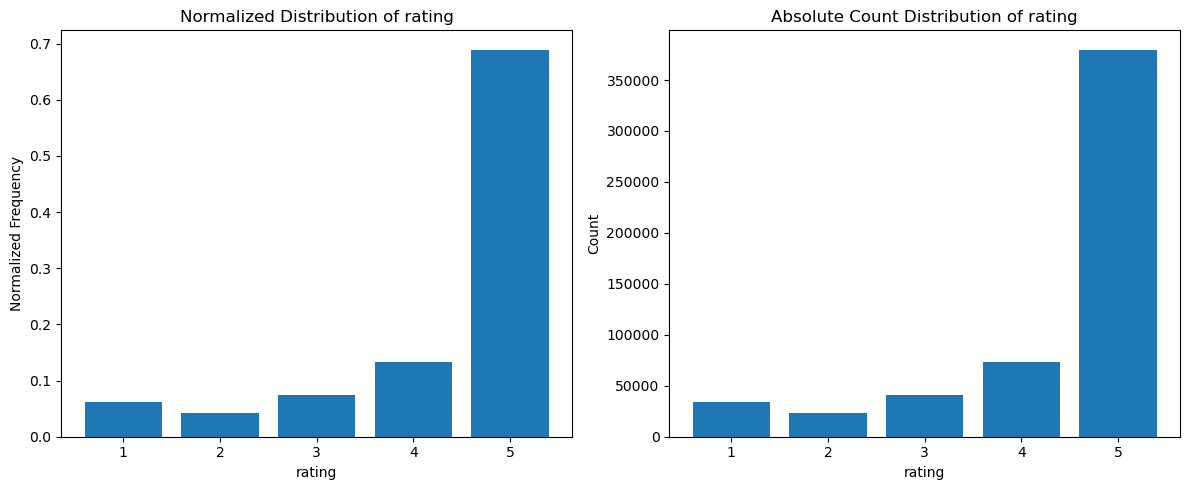

In [304]:
target = 'rating'
plot_target_bar(df, target)

## # Target is unblanaced towrads 5 ratings - more than 70%

# Define the problem

In [305]:
n = 5
one_user = df.iloc[n].userName
df.iloc[n]

userName                                                Karli S.
verified                                                    True
itemName       Merrick Whole Earth Farms Adult Recipe Dry Dog...
description    ['Merrick Whole Earth Farms is a nutritious do...
image          ['https://images-na.ssl-images-amazon.com/imag...
brand                                                    Merrick
feature        ['Natural ingredients with added vitamins and ...
category                                            Pet_Supplies
price                                                        NaN
rating                                                       2.0
reviewTime                                            2018-01-01
summary                                                No Bueno.
reviewText     We accidentally purchased this instead of our ...
vote                                                           0
Name: 5, dtype: object

In [306]:
df[df['userName'] == one_user].T

5       \
userName                                              Karli S.   
verified                                                  True   
itemName     Merrick Whole Earth Farms Adult Recipe Dry Dog...   
description  ['Merrick Whole Earth Farms is a nutritious do...   
image        ['https://images-na.ssl-images-amazon.com/imag...   
brand                                                  Merrick   
feature      ['Natural ingredients with added vitamins and ...   
category                                          Pet_Supplies   
price                                                      NaN   
rating                                                     2.0   
reviewTime                                          2018-01-01   
summary                                              No Bueno.   
reviewText   We accidentally purchased this instead of our ...   
vote                                                         0   

                                                        381430  \
userName                                              Karli S.   
verified                                                  True   
itemName     My AlphaPet Dog Poop Bags Refill Rolls - Large...   
description  ['These poop bags by My Alphapet are convenien...   
image        ['https://images-na.ssl-images-amazon.com/imag...   
brand                                              My AlphaPet   
feature      ['Large enough for big dog waste the bags are ...   
category                                          Pet_Supplies   
price                                                   $28.99   
rating                                                     5.0   
reviewTime                                          2018-05-02   
summary      They're great! The fit in the dispenser pouch ...   
reviewText   This is our second time ordering these poop ba...   
vote                                                         0   

                                                        528434  
userName                                              Karli S.  
verified                                                  True  
itemName                      KONG Cat Tennis Balls with Bells  
description               ['KONG Cat Tennis Balls with Bells']  
image        ['https://images-na.ssl-images-amazon.com/imag...  
brand                                                     KONG  
feature      ['Interior bell creates enticing sound', "Nona...  
category                                          Pet_Supplies  
price                                                    $6.25  
rating                                                     5.0  
reviewTime                                          2018-07-29  
summary                                                  Cute!  
reviewText   Sent as part of a care package to a coworker w...  
vote                                                         0

## When given userName, recommend 5 highest predicted ratings. 
## The predicted ratings are based on the user's history of ratings, which includes features on the items the user has rated before. 
## Assumption 1: verified userNames uniquely identify users (otherwise the user would have to manually fill in his ratings history when asking for recommendation).
## Assumption 2: The user doesn't need to us recommend on items she has already rated as good, so we'll not recommend on them.
## Assumption 3: We cannot trust unverified ratings since an amazon seller can give low rating to his rivals items, and do so many times  
## ** If userName doesn't exist (doesn't have rating's history), recommend on top 5 rated items for all users (add rating votes as a rating weight, 0 votes is 1, 1 votes is 2, 2 votes is 3, etc.)
## ** The userNames "Amazon Customer" and "Kindel Customers" contain 7% of all ratings. While they are verified, they do not sound like legitimate users (not by name or number of review). Even though, we will respond to their recommendation request if they do so.  

#### # Since we are basing are model on historical recommendations, we'll drop items with less than 5 ratings


In [307]:
itemName_n_ratings = df.groupby('itemName').size()
itemName_n_ratings.value_counts(normalize=True).sort_index()

1       0.386665
2       0.206506
3       0.103725
4       0.071223
5       0.041409
          ...   
667     0.000009
922     0.000009
965     0.000009
1140    0.000009
1642    0.000009
Length: 248, dtype: float64

In [308]:
item_n_ratings_threshold = 5
itemName_n_ratings.value_counts(normalize=True)[itemName_n_ratings.value_counts(normalize=True).sort_index().index<item_n_ratings_threshold].sum()

0.768120063480997

In [309]:
items_with_history = itemName_n_ratings[itemName_n_ratings>=item_n_ratings_threshold].index.tolist()
df = df[df.itemName.isin(items_with_history)]

In [310]:
userNames_n_ratings = df.groupby('userName').size()
userNames_n_ratings.value_counts(normalize=True).sort_index()

1        0.430667
2        0.198364
3        0.110677
4        0.072859
5        0.053436
           ...   
336      0.000009
386      0.000009
455      0.000009
1849     0.000009
25635    0.000009
Length: 180, dtype: float64

#### # Same for users - we have too much items, we'll drop items with less than 6 ratings 


In [311]:
users_n_ratings_threshold = 6
userNames_n_ratings.value_counts(normalize=True)[userNames_n_ratings.value_counts(normalize=True).sort_index().index<users_n_ratings_threshold].sum()

0.866004059379807

In [312]:
users_with_history = userNames_n_ratings[userNames_n_ratings>=users_n_ratings_threshold].index.tolist()
df = df[df.userName.isin(users_with_history)]

In [313]:
df.shape, df[['userName', 'itemName']].nunique()

((210203, 14),
 userName    14722
 itemName    24718
 dtype: int64)

# Split to Train, Validation, Test

#### # Split the dataset with 80% for train, 10% for val and 10% for test

In [314]:
target

'rating'

In [315]:
test_size=0.1
equal_val_test_size=True
X_train, X_test, X_val, y_train, y_test, y_val = split_dataset(df, target_col=target, the_test_size=test_size, equal_val_test_size=equal_val_test_size)

train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

split_dataset()
X_train shape:  (168162, 13) 79.9998097077587 % y_train mean: rating    4.385087
dtype: float64
X_val shape:  (21020, 13) 9.999857280819018 % y_val mean: rating    4.385062
dtype: float64
X_test shape:  (21021, 13) 10.000333011422292 % y_test mean: rating    4.385044
dtype: float64


In [316]:
train['userName'].nunique(), val['userName'].nunique(), test['userName'].nunique(), 

(14722, 9116, 9091)

#### # Data is not stratified on userName - which is not good since we want to predict ratings for each user using his past ratings 

In [317]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the split sizes for validation and test
val_size = 0.1
test_size = 0.1

# Group the data by user
grouped = df.groupby('userName')

# Split each group and store in a list
train_list, val_list, test_list = [], [], []
for name, group in grouped:
        user_train_val, user_test = train_test_split(group, test_size=test_size, random_state=42, shuffle=True)
        user_train, user_val = train_test_split(user_train_val, test_size=val_size/(1-test_size), random_state=42, shuffle=True)
    
        train_list.append(user_train)
        val_list.append(user_val)
        test_list.append(user_test)
        
# Concatenate all splits
train = pd.concat(train_list)
val = pd.concat(val_list)
test = pd.concat(test_list)

In [318]:
train['userName'].nunique(), val['userName'].nunique(), test['userName'].nunique(), 

(14722, 14722, 14722)

In [319]:
train.shape[0]/len(df), val.shape[0]/len(df), test.shape[0]/len(df)

(0.7534811586894573, 0.1211447981237185, 0.12537404318682416)

In [320]:
userNames_n_ratings = train.groupby('userName').size()
userNames_n_ratings.value_counts(normalize=True).sort_index()

4        0.260562
5        0.169950
6        0.118190
7        0.083888
8        0.151270
           ...   
268      0.000068
308      0.000068
363      0.000068
1479     0.000068
20507    0.000068
Length: 146, dtype: float64

In [321]:
train.groupby(['itemName']).size().value_counts(normalize=True)

2      0.189945
3      0.164558
1      0.142010
4      0.122928
5      0.082300
         ...   
73     0.000042
168    0.000042
223    0.000042
323    0.000042
85     0.000042
Length: 158, dtype: float64

<Axes: >

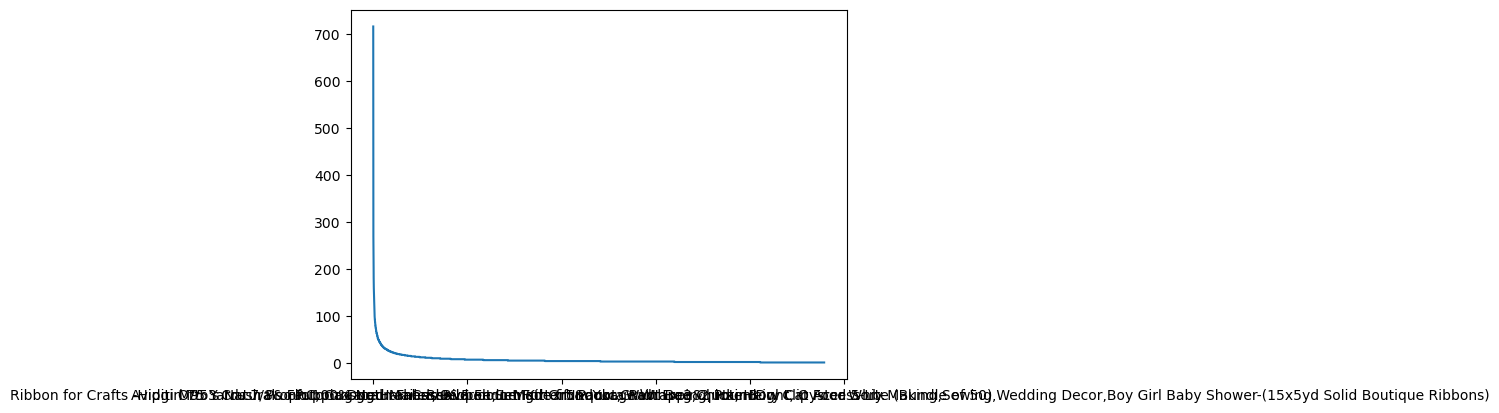

In [322]:
train['itemName'].value_counts().plot()

#### # We still have a long tail of item reviews, over 50% items with only one review. But that's OK -  if a user recommended has a similair user that rated a unique infrequent item, we'll still try to recommend on that item.    

# Exploratory  Data Analysis, pre-processing (and some feature engineering)

In [323]:
train

userName  verified  \
299905              Boo      True   
304686              Boo      True   
297588              Boo      True   
299805              Boo      True   
299854              Boo      True   
...                 ...       ...   
111073  ~Susan Atherton      True   
111740  ~Susan Atherton      True   
157666  ~Susan Atherton      True   
373135  ~Susan Atherton      True   
332690  ~Susan Atherton      True   

                                                 itemName  \
299905  Pedigree Complete Nutrition Adult Dry Dog Food...   
304686  Milk-Bone Marosnacks Dog Snacks - Small, 10-Ou...   
297588  Pedigree Adult Dry Dog Food - Grilled Steak &a...   
299805  Purina ALPO Prime Cuts in Gravy Adult Wet Dog ...   
299854  Pedigree Complete Nutrition Adult Dry Dog Food...   
...                                                   ...   
111073  Arm &amp; Hammer Super Scoop Clumping Litter, ...   
111740  Arm &amp; Hammer Super Scoop Clumping Litter, ...   
157666  Grafix 4-1/2-Ounce Incredible White Mask Liqui...   
373135  FurHaven Pet Cat Furniture | Tiger Tough Cat T...   
332690                          PAW Cozy Kitty Tent Igloo   

                                              description  \
299905  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
304686  ["Great for training. Fewer crumbs, cleaner sh...   
297588  ["Give your dog the taste of succulent steak a...   
299805  ['', "Dazzle your dog's taste buds with Purina...   
299854  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
...                                                   ...   
111073  ['Super Scoop is formulated with ARM & HAMMER ...   
111740  ['An odor free home starts with ARM &amp; HAMM...   
157666  ['A high quality latex that assures an easily ...   
373135  ['Product DETAILS - 28" L x 16" W x 55" H, Col...   
332690  ['The PETMAKER Cozy Cave Cube allows for relax...   

                                                    image  \
299905  ['https://images-na.ssl-images-amazon.com/imag...   
304686  ['https://images-na.ssl-images-amazon.com/imag...   
297588  ['https://images-na.ssl-images-amazon.com/imag...   
299805  ['https://images-na.ssl-images-amazon.com/imag...   
299854  ['https://images-na.ssl-images-amazon.com/imag...   
...                                                   ...   
111073  ['https://images-na.ssl-images-amazon.com/imag...   
111740  ['https://images-na.ssl-images-amazon.com/imag...   
157666                                                 []   
373135  ['https://images-na.ssl-images-amazon.com/imag...   
332690  ['https://images-na.ssl-images-amazon.com/imag...   

                             brand  \
299905                    Pedigree   
304686                   Milk-Bone   
297588                    Pedigree   
299805  Purina ALPO Brand Dog Food   
299854                    Pedigree   
...                            ...   
111073                Arm & Hammer   
111740            Arm &amp; Hammer   
157666                      Grafix   
373135                Furhaven Pet   
332690                    PETMAKER   

                                                  feature  \
299905  ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...   
304686  ['Contains 12 - 10 Oz Boxes', 'Great For Train...   
297588  ['Contains One (1) 17 Lb. Bag Of Pedigree Comp...   
299805  ['Twelve (12) 13.2 Oz. Can - Purina Alpo Prime...   
299854  ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...   
...                                                   ...   
111073  ['Great for fragrance sensitive cats and their...   
111740  ['Great for fragrance sensitive cats and their...   
157666  ['An easy to remove high quality latex', 'Incl...   
373135  ['Product DETAILS - 28" L x 16" W x 55" H, Col...   
332690  ['Enclosed cube pet bed', 'Removable reversibl...   

                      category   price  rating  reviewTime  \
299905            Pet_Supplies     NaN     4.0  2018-04-05   
304686            Pet_Supplies     NaN     4.0  2018-04-0

## Delve into the features

In [324]:
train.describe(include='all')

userName verified              itemName description   image  \
count            158384   158384                158384      158384  158384   
unique            14722        2                 23949       20656   21723   
top     Amazon Customer     True  Puppia Dog Harnesses          []      []   
freq              20507   149523                   717       14909   11538   
mean                NaN      NaN                   NaN         NaN     NaN   
std                 NaN      NaN                   NaN         NaN     NaN   
min                 NaN      NaN                   NaN         NaN     NaN   
25%                 NaN      NaN                   NaN         NaN     NaN   
50%                 NaN      NaN                   NaN         NaN     NaN   
75%                 NaN      NaN                   NaN         NaN     NaN   
max                 NaN      NaN                   NaN         NaN     NaN   

         brand feature      category   price         rating  reviewTime  \
count   156817  158384        158384  138995  158384.000000      158384   
unique    7805   18774            16    4080            NaN         275   
top       KONG      []  Pet_Supplies   $9.99            NaN  2018-04-02   
freq      3316   30446         70007    2536            NaN        1335   
mean       NaN     NaN           NaN     NaN       4.383063         NaN   
std        NaN     NaN           NaN     NaN       1.118128         NaN   
min        NaN     NaN           NaN     NaN       1.000000         NaN   
25%        NaN     NaN           NaN     NaN       4.000000         NaN   
50%        NaN     NaN           NaN     NaN       5.000000         NaN   
75%        NaN     NaN           NaN     NaN       5.000000         NaN   
max        NaN     NaN           NaN     NaN       5.000000         NaN   

           summary reviewText           vote  
count       158317     158263  158384.000000  
unique       71155     116419            NaN  
top     Five Stars       good            NaN  
freq         42654        799            NaN  
mean           NaN        NaN       0.114317  
std            NaN        NaN       1.716454  
min            NaN        NaN       0.000000  
25%            NaN        NaN       0.000000  
50%            NaN        NaN       0.000000  
75%            NaN        NaN       0.000000  
max            NaN        NaN     418.000000

### 1. Users

In [325]:
train.groupby(['userName']).size().describe()

count    14722.000000
mean        10.758321
std        169.977073
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max      20507.000000
dtype: float64

#### # There are 55k "unique" users, and a mean of 6.6 ratings per user and a median of 4 (right skewed)

#### # More precisely, the mean number of ratings per user is 4.2, with median of 2 (skewed to the right) - long tail of high amount of ratings, most users don't rate more than 3 items.

In [326]:
users_frequencies = get_col_frequencies(train, col_name='userName', sort_index=False)
users_frequencies

counts       pct  cumsum_pct
Amazon Customer   20507  0.129476    0.129476
Kindle Customer    1479  0.009338    0.138815
Mike                363  0.002292    0.141106
John                308  0.001945    0.143051
Susan               268  0.001692    0.144743
...                 ...       ...         ...
Tantressa Vega        4  0.000025    0.999899
JetterSays...         4  0.000025    0.999924
JetRocket11           4  0.000025    0.999949
Tara Fox Hall         4  0.000025    0.999975
Lu E                  4  0.000025    1.000000

[14722 rows x 3 columns]

In [327]:
train[train.userName.isin(['Amazon Customer', 'Kindle Customer'])]['verified'].mean()

0.9710270171927591

#### # there are 8% ratings Amazon and Kindel, and 97% of them are verified

In [328]:
train['verified'].mean()

0.9440536922921507

#### # Drop the 5% unverified users: we cannot trust these ratings as true ratings 

In [329]:
train = train[train['verified'] == True]
val = val[val['verified'] == True]
test = test[test['verified'] == True]
assert train['verified'].mean() == 1 

#### # Drop verified col, as it contain same information for all

In [330]:
train = train.drop(columns='verified')
val = val.drop(columns='verified')
test = test.drop(columns='verified')
assert not 'verified' in train

In [331]:
users_frequencies = get_col_frequencies(train, col_name='userName', sort_index=False)
users_frequencies

counts       pct  cumsum_pct
Amazon Customer      19928  0.133277    0.133277
Kindle Customer       1421  0.009504    0.142781
Mike                   342  0.002287    0.145068
John                   283  0.001893    0.146961
Susan                  249  0.001665    0.148626
...                    ...       ...         ...
candace wunderlich       1  0.000007    0.999973
pete c                   1  0.000007    0.999980
N. Beitler               1  0.000007    0.999987
Linda Brown              1  0.000007    0.999993
KWJ                      1  0.000007    1.000000

[14459 rows x 3 columns]

In [332]:
users_frequencies[users_frequencies.index.str.lower().str.contains('amazon|kindle')]

counts       pct  cumsum_pct
Amazon Customer        19928  0.133277    0.133277
Kindle Customer         1421  0.009504    0.142781
Amazoncustomer           104  0.000696    0.214261
Amazonian                 47  0.000314    0.298222
AmazonCustomer            46  0.000308    0.301626
...                      ...       ...         ...
Amazonian Drone            3  0.000020    0.992824
NancyAmazon Customer       3  0.000020    0.995894
Amazon_Consumer            2  0.000013    0.998214
SouthernAmazoner           1  0.000007    0.999438
Rebecca of Amazon          1  0.000007    0.999605

[95 rows x 3 columns]

#### # There are still alot (8.5%) of seemingly non-unique users as Amazon Customer and Kindle Customer. Since they're verified we'll not delete those - but we'll disregard the history of the userNames "Amazon Customer" and "Kindel Customers" if they ever try to use our app for recommendations. The rest of the usernames have much lower number of ratings, and therefore are accepted as unique().   

In [333]:
assert train['userName'].isna().sum() == 0
assert val['userName'].isna().sum() == 0
assert test['userName'].isna().sum() == 0

#### # There are no missing values for userName

### 2. Verified - dropped after keeping only verified ratings

### 3. itemName

In [334]:
train.itemName.describe(include='all')

count                   149523
unique                   23626
top       Puppia Dog Harnesses
freq                       699
Name: itemName, dtype: object

In [335]:
train.groupby('itemName').size().describe()

count    23626.000000
mean         6.328748
std         14.032777
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        699.000000
dtype: float64

#### # There are 88k "unique" items, with average of 3.9 ratings per image (median of 2, ratings per items is right skewed) 

#### # Let's drop complete duplicated rows - those are technical problems for sure, we should disregard duplicate reviews given on same item by same user in same date 

In [336]:
train.duplicated().sum()

13587

In [337]:
train = train.drop_duplicates()
val = val.drop_duplicates()
test = test.drop_duplicates()
assert train.duplicated().sum() == 0

In [338]:
probably_duplicate_ratings_col =['userName', 'description', 'image', 'brand', 'feature',
                                 'category', 'price', 'rating', 'reviewTime', 'summary', 'reviewText',
                                 'vote'] 
pd.concat([train, y_train], axis=1).duplicated(subset=probably_duplicate_ratings_col).sum()

59526

#### # drop ratings with same exact rating by same user in same day for same item features

In [339]:
train = train.drop_duplicates(subset=probably_duplicate_ratings_col)
assert train.duplicated(subset=probably_duplicate_ratings_col).sum() == 0

val = val.drop_duplicates(subset=probably_duplicate_ratings_col)
test = test.drop_duplicates(subset=probably_duplicate_ratings_col)

In [340]:
train['itemName'].isna().sum()

0

#### # Drop 5 items without name - we can't recommend on it

In [341]:
train = train.dropna(subset='itemName')
assert train['itemName'].isna().sum() == 0

val = val.dropna(subset='itemName')
test = test.dropna(subset='itemName')

In [342]:
train.itemName.describe(include='all')

count                   135923
unique                   23625
top       Puppia Dog Harnesses
freq                       497
Name: itemName, dtype: object

#### # There are still 88k "unique" items.
#### # Examine more columns that might be identifiers for unique item: brand and price  

In [343]:
col = 'itemName'
groupby_col = 'brand'
get_col_unique_counts_on_groupby_col(train, col, groupby_col, sort_index=True)

itemName_brand_counts  itemName_brand_pct  itemName_brand_cumsum_pct
1                     4573            0.590522                   0.590522
2                     1221            0.157670                   0.748192
3                      570            0.073605                   0.821798
4                      317            0.040935                   0.862732
5                      216            0.027893                   0.890625
..                     ...                 ...                        ...
110                      1            0.000129                   0.999483
126                      1            0.000129                   0.999613
129                      1            0.000129                   0.999742
136                      1            0.000129                   0.999871
151                      1            0.000129                   1.000000

[68 rows x 3 columns]

#### # 55% of all items have only one brand (no competition with other brands) 

In [344]:
train['reviewText'][train['reviewText'].str.lower().str.contains('price').fillna(True)]

320440    My dog likes them.  Great price.  Package is d...
408726    My dog loves these.  A little overpriced for t...
516132    This review is for the 2018 model of this harn...
153005    Tastes good, like coffee, but I didn't notice ...
84196     I am a beginner quilter and bought a small pac...
                                ...                        
412519    The previous orthopedic pet bed we had was nic...
169120    If I didn't stock these in the office candy ja...
261561    So I've been using this for 5 months now and I...
160964    I'm new to quilting, and like most hobbies, ju...
332690    UPDATE:  BE CAREFUL KITTEN GOT THIS TURNED OVE...
Name: reviewText, Length: 9514, dtype: object

In [345]:
21511/len(train)

0.15825872001059424

#### # 7% of reviews talk also about prices - this should be a factor for identifying an item 

#### Create item_id from itemName, brand and price combinations

In [346]:
train['item_id'] = train['brand'].fillna('NA') + "_" + train['itemName'] + "_" + train['price'].fillna('NA')
train = move_cols_to_first(train, ['userName', 'item_id'])

val['item_id'] = val['brand'].fillna('NA') + "_" + val['itemName'] + "_" + val['price'].fillna('NA')
val = move_cols_to_first(val, ['userName', 'item_id'])
test['item_id'] = test['brand'].fillna('NA') + "_" + test['itemName'] + "_" + test['price'].fillna('NA')
test = move_cols_to_first(test, ['userName', 'item_id'])

train

move_cols_to_first()
move_cols_to_first()
move_cols_to_first()


userName                                            item_id  \
299905              Boo  Pedigree_Pedigree Complete Nutrition Adult Dry...   
304686              Boo  Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...   
297588              Boo  Pedigree_Pedigree Adult Dry Dog Food - Grilled...   
299805              Boo  Purina ALPO Brand Dog Food_Purina ALPO Prime C...   
321930        Carol Ann  PETMAKER_PETMAKER Folding Plastic Pet Stairs D...   
...                 ...                                                ...   
157142  ~Susan Atherton  Grafix_Grafix 4-1/2-Ounce Incredible White Mas...   
430671  ~Susan Atherton  Meyenberg_Meyenberg Goat Milk - Powdered, 12-O...   
111073  ~Susan Atherton  Arm & Hammer_Arm &amp; Hammer Super Scoop Clum...   
373135  ~Susan Atherton  Furhaven Pet_FurHaven Pet Cat Furniture | Tige...   
332690  ~Susan Atherton          PETMAKER_PAW Cozy Kitty Tent Igloo_$16.12   

                                                 itemName  \
299905  Pedigree Complete Nutrition Adult Dry Dog Food...   
304686  Milk-Bone Marosnacks Dog Snacks - Small, 10-Ou...   
297588  Pedigree Adult Dry Dog Food - Grilled Steak &a...   
299805  Purina ALPO Prime Cuts in Gravy Adult Wet Dog ...   
321930  PETMAKER Folding Plastic Pet Stairs Durable In...   
...                                                   ...   
157142  Grafix 4-1/2-Ounce Incredible White Mask Liqui...   
430671           Meyenberg Goat Milk - Powdered, 12-Ounce   
111073  Arm &amp; Hammer Super Scoop Clumping Litter, ...   
373135  FurHaven Pet Cat Furniture | Tiger Tough Cat T...   
332690                          PAW Cozy Kitty Tent Igloo   

                                              description  \
299905  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
304686  ["Great for training. Fewer crumbs, cleaner sh...   
297588  ["Give your dog the taste of succulent steak a...   
299805  ['', "Dazzle your dog's taste buds with Purina...   
321930  ['The PETMAKER folding plastic pet stairs help...   
...                                                   ...   
157142  ['A high quality latex that assures an easily ...   
430671  ['Powdered Goat Milk by Meyenberg Goat Milk Pr...   
111073  ['Super Scoop is formulated with ARM & HAMMER ...   
373135  ['Product DETAILS - 28" L x 16" W x 55" H, Col...   
332690  ['The PETMAKER Cozy Cave Cube allows for relax...   

                                                    image  \
299905  ['https://images-na.ssl-images-amazon.com/imag...   
304686  ['https://images-na.ssl-images-amazon.com/imag...   
297588  ['https://images-na.ssl-images-amazon.com/imag...   
299805  ['https://images-na.ssl-images-amazon.com/imag...   
321930  ['https://images-na.ssl-images-amazon.com/imag...   
...                                                   ...   
157142                                                 []   
430671  ['https://images-na.ssl-images-amazon.com/imag...   
111073  ['https://images-na.ssl-images-amazon.com/imag...   
373135  ['https://images-na.ssl-images-amazon.com/imag...   
332690  ['https://images-na.ssl-images-amazon.com/imag...   

                             brand  \
299905                    Pedigree   
304686                   Milk-Bone   
297588                    Pedigree   
299805  Purina ALPO Brand Dog Food   
321930                    PETMAKER   
...                            ...   
157142                      Grafix   
430671                   Meyenberg   
111073                Arm & Hammer   
373135                Furhaven Pet   
332690                    PETMAKER   

                                                  feature  \
299905  ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...   
304686  ['Contains 12 - 10 Oz Boxes', 'Great For Train...   
297588  ['Contains One (1) 17 Lb. Bag Of Pedigree Comp...   
299805  ['Twelve (12) 13.2 Oz. Can - Purina Alpo Prime...   
321930  ['DURABLE AND EASY TO CLEAN -Made of tough and...   
...                                                   ..

In [347]:
train.item_id.describe(include='all')

count                                                135923
unique                                                24174
top       KIND_KIND Bars, Caramel Almond and Sea Salt, G...
freq                                                    359
Name: item_id, dtype: object

In [348]:
assert train.item_id.isna().sum() == 0
assert train.item_id.str.contains('NA_NA').sum() == 0

#### # Now there are almost 89k unique items, and no NA's

### 4. description

In [349]:
train['description'].describe(include='all')

count     135923
unique     20358
top           []
freq       14333
Name: description, dtype: object

#### # Create description_n_sentences - some descriptions are made of list of different descriptions 

In [350]:
import ast

train['description_n_sentences'] = train['description'].fillna('[]').apply(lambda x: len(ast.literal_eval(x)))

val['description_n_sentences'] = val['description'].fillna('[]').apply(lambda x: len(ast.literal_eval(x)))
test['description_n_sentences'] = test['description'].fillna('[]').apply(lambda x: len(ast.literal_eval(x)))

get_col_frequencies(train, 'description_n_sentences')

counts       pct  cumsum_pct
0     14333  0.105449    0.105449
1     75615  0.556308    0.661757
2     12279  0.090338    0.752095
3      9447  0.069503    0.821598
4      5991  0.044076    0.865674
5      4347  0.031981    0.897655
6      4663  0.034306    0.931961
7      2079  0.015295    0.947257
8      1172  0.008623    0.955879
9      1135  0.008350    0.964230
10      869  0.006393    0.970623
11      577  0.004245    0.974868
12      266  0.001957    0.976825
13      685  0.005040    0.981865
14      352  0.002590    0.984454
15      540  0.003973    0.988427
16      324  0.002384    0.990811
17      266  0.001957    0.992768
18      146  0.001074    0.993842
19      116  0.000853    0.994696
20      215  0.001582    0.996277
21       48  0.000353    0.996630
22       59  0.000434    0.997065
23       33  0.000243    0.997307
24       49  0.000360    0.997668
25       14  0.000103    0.997771
26       82  0.000603    0.998374
27       50  0.000368    0.998742
28       17  0.000125    0.998867
29       22  0.000162    0.999029
30       17  0.000125    0.999154
31       37  0.000272    0.999426
33        6  0.000044    0.999470
34       20  0.000147    0.999617
41        1  0.000007    0.999625
43       27  0.000199    0.999823
44        1  0.000007    0.999831
47        2  0.000015    0.999846
49        2  0.000015    0.999860
50        5  0.000037    0.999897
52        5  0.000037    0.999934
66        4  0.000029    0.999963
87        2  0.000015    0.999978
210       3  0.000022    1.000000

In [351]:
train['description'].isna().sum()

0

#### # fill description NA's with NA string

In [352]:
train['description'] = train['description'].fillna("NA")
val['description'] = val['description'].fillna("NA")
test['description'] = test['description'].fillna("NA")
assert train['description'].isna().sum() == 0

#### # Create description_len

In [353]:
train['description_len'] = train['description'].str.len()

val['description_len'] = val['description'].str.len()
test['description_len'] = test['description'].str.len()

get_col_frequencies(train, 'description_len')

counts       pct  cumsum_pct
2       14333  0.105449    0.105449
5          21  0.000154    0.105604
6           5  0.000037    0.105641
7          19  0.000140    0.105780
8           6  0.000044    0.105825
...       ...       ...         ...
11960       2  0.000015    0.999816
12126       7  0.000051    0.999868
16044       5  0.000037    0.999904
21883      12  0.000088    0.999993
34761       1  0.000007    1.000000

[2886 rows x 3 columns]

In [354]:
train[[col for col in train if 'description' in col]].describe(include='all')

description  description_n_sentences  description_len
count       135923             135923.00000    135923.000000
unique       20358                      NaN              NaN
top             []                      NaN              NaN
freq         14333                      NaN              NaN
mean           NaN                  2.28124       785.463365
std            NaN                  3.36810       915.835192
min            NaN                  0.00000         2.000000
25%            NaN                  1.00000       244.000000
50%            NaN                  1.00000       542.000000
75%            NaN                  2.00000      1045.000000
max            NaN                210.00000     34761.000000

#### # The median description review has 1 sentence (mean=2) and 509 characters (mean=749), both are right skewed 

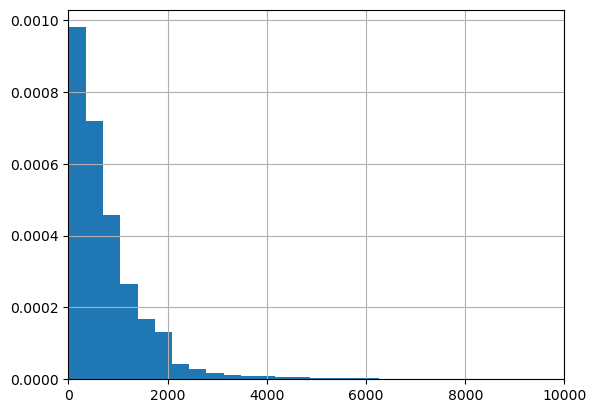

In [355]:
train['description_len'].hist(bins=100, density=True)
plt.xlim(0, 10000)
plt.show()

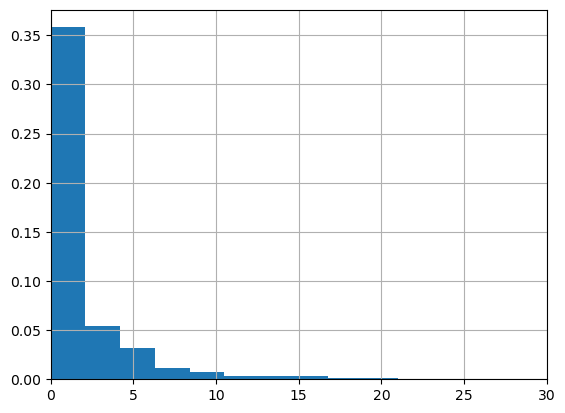

In [356]:
train['description_n_sentences'].hist(bins=100, density=True)
plt.xlim(0, 30)
plt.show()

### 5. image

In [357]:
train['image']

299905    ['https://images-na.ssl-images-amazon.com/imag...
304686    ['https://images-na.ssl-images-amazon.com/imag...
297588    ['https://images-na.ssl-images-amazon.com/imag...
299805    ['https://images-na.ssl-images-amazon.com/imag...
321930    ['https://images-na.ssl-images-amazon.com/imag...
                                ...                        
157142                                                   []
430671    ['https://images-na.ssl-images-amazon.com/imag...
111073    ['https://images-na.ssl-images-amazon.com/imag...
373135    ['https://images-na.ssl-images-amazon.com/imag...
332690    ['https://images-na.ssl-images-amazon.com/imag...
Name: image, Length: 135923, dtype: object

#### # Create n_images - some image are made of list of different images 

In [358]:
train['n_images'] = train['image'].apply(lambda x: len(ast.literal_eval(x)))

val['n_images'] = val['image'].apply(lambda x: len(ast.literal_eval(x)))
test['n_images'] = test['image'].apply(lambda x: len(ast.literal_eval(x)))

get_col_frequencies(train, col_name='n_images')

counts       pct  cumsum_pct
0    10238  0.075322    0.075322
1    10419  0.076654    0.151976
2    10368  0.076278    0.228254
3    11380  0.083724    0.311978
4    13367  0.098342    0.410321
5    26451  0.194603    0.604923
6    33200  0.244256    0.849179
7     4685  0.034468    0.883647
8     2860  0.021041    0.904689
9     2470  0.018172    0.922861
10    1853  0.013633    0.936493
11    1697  0.012485    0.948978
12    1259  0.009263    0.958241
13     843  0.006202    0.964443
14     702  0.005165    0.969608
15     473  0.003480    0.973088
16     534  0.003929    0.977016
17     895  0.006585    0.983601
18     383  0.002818    0.986419
19     353  0.002597    0.989016
20     194  0.001427    0.990443
21      89  0.000655    0.991098
22     191  0.001405    0.992503
23      60  0.000441    0.992945
24     111  0.000817    0.993761
25      64  0.000471    0.994232
26      62  0.000456    0.994688
27      36  0.000265    0.994953
28      81  0.000596    0.995549
29      33  0.000243    0.995792
30      42  0.000309    0.996101
31      30  0.000221    0.996321
32      39  0.000287    0.996608
33      18  0.000132    0.996741
34      17  0.000125    0.996866
35      22  0.000162    0.997028
36      52  0.000383    0.997410
37      76  0.000559    0.997969
38      32  0.000235    0.998205
39      54  0.000397    0.998602
40      15  0.000110    0.998713
41       3  0.000022    0.998735
42       3  0.000022    0.998757
43      20  0.000147    0.998904
44      70  0.000515    0.999419
45       7  0.000051    0.999470
46       8  0.000059    0.999529
48      53  0.000390    0.999919
50      11  0.000081    1.000000

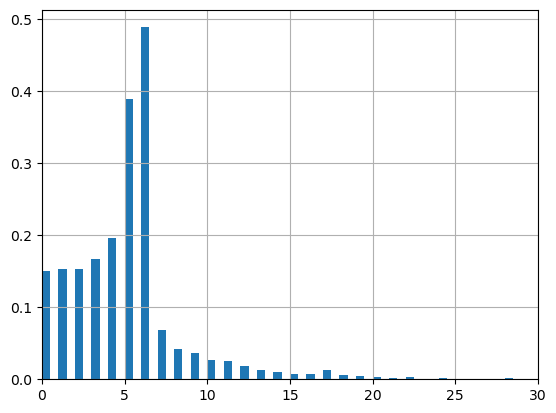

In [359]:
train['n_images'].hist(bins=100, density=True)
plt.xlim(0, 30)
plt.show()

#### # The n_images mode is 6 

In [360]:
assert train['image'].isna().sum() == 0

### 6. brand

In [361]:
train['brand'].describe()

count     135205
unique      7744
top         KONG
freq        2697
Name: brand, dtype: object

#### # There are 21k brands! we'll group them later on by price (luxury, budget, etc.)

In [362]:
get_col_frequencies(train, col_name='brand', sort_index=False)

counts       pct  cumsum_pct
KONG                  2697  0.019842    0.019842
AmazonBasics          1581  0.011632    0.031474
KIND                  1489  0.010955    0.042428
Nylabone              1282  0.009432    0.051860
PetSafe               1268  0.009329    0.061189
...                    ...       ...         ...
Releaf Leaf Scoops       1  0.000007    0.999971
HTKJ                     1  0.000007    0.999978
Organic Muscle           1  0.000007    0.999985
Zuluf                    1  0.000007    0.999993
No Whey                  1  0.000007    1.000000

[7745 rows x 3 columns]

#### # The leading brand, KONG, is only in 1% of all ratings

In [363]:
get_col_unique_counts_on_groupby_col(train, col='item_id', groupby_col='brand')

item_id_brand_counts  item_id_brand_pct  item_id_brand_cumsum_pct
1                    4532           0.585227                  0.585227
2                    1235           0.159478                  0.744706
3                     575           0.074251                  0.818957
4                     314           0.040548                  0.859504
5                     220           0.028409                  0.887913
..                    ...                ...                       ...
110                     1           0.000129                  0.999483
126                     1           0.000129                  0.999613
129                     1           0.000129                  0.999742
150                     1           0.000129                  0.999871
155                     1           0.000129                  1.000000

[71 rows x 3 columns]

In [364]:
train['brand'].isna().sum()

718

In [365]:
1560/len(train)

0.011477086291503277

#### # There are 0.5% missing brands (2180). Let's a column for brand_isna, and fill them with NA string  

In [366]:
train['brand_isna'] = train['brand'].isna()*1

val['brand_isna'] = val['brand'].isna()*1
test['brand_isna'] = test['brand'].isna()*1

In [367]:
train['brand_isna'].describe()

count    135923.000000
mean          0.005282
std           0.072488
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: brand_isna, dtype: float64

In [368]:
train['brand'] = train['brand'].fillna('NA')

val['brand'] = val['brand'].fillna('NA')
test['brand'] = test['brand'].fillna('NA')

assert train['brand'].isna().sum() == 0

### 7. feature

In [369]:
train['feature']

299905    ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...
304686    ['Contains 12 - 10 Oz Boxes', 'Great For Train...
297588    ['Contains One (1) 17 Lb. Bag Of Pedigree Comp...
299805    ['Twelve (12) 13.2 Oz. Can - Purina Alpo Prime...
321930    ['DURABLE AND EASY TO CLEAN -Made of tough and...
                                ...                        
157142    ['An easy to remove high quality latex', 'Incl...
430671    ['<span class="a-size-base a-color-secondary">...
111073    ['Great for fragrance sensitive cats and their...
373135    ['Product DETAILS - 28" L x 16" W x 55" H, Col...
332690    ['Enclosed cube pet bed', 'Removable reversibl...
Name: feature, Length: 135923, dtype: object

In [370]:
assert train['feature'].isna().sum() == 0

#### # Create n_features - some feature are made of list of different features 

In [371]:
train['n_features'] = train['feature'].apply(lambda x: len(ast.literal_eval(x)))

val['n_features'] = val['feature'].apply(lambda x: len(ast.literal_eval(x)))
test['n_features'] = test['feature'].apply(lambda x: len(ast.literal_eval(x)))

get_col_frequencies(train, col_name='n_features')

counts       pct  cumsum_pct
0    25657  0.188761    0.188761
1     1278  0.009402    0.198164
2     1115  0.008203    0.206367
3     8593  0.063220    0.269586
4     9845  0.072431    0.342017
5    47089  0.346439    0.688456
6     7031  0.051728    0.740184
7     4359  0.032070    0.772253
8     4629  0.034056    0.806309
9     4718  0.034711    0.841020
10    6439  0.047372    0.888393
11    3814  0.028060    0.916453
12    2372  0.017451    0.933904
13    1784  0.013125    0.947029
14    1215  0.008939    0.955968
15    1289  0.009483    0.965451
16     877  0.006452    0.971903
17     512  0.003767    0.975670
18     772  0.005680    0.981350
19     319  0.002347    0.983697
20     327  0.002406    0.986102
21     384  0.002825    0.988928
22     338  0.002487    0.991414
23     154  0.001133    0.992547
24     110  0.000809    0.993357
25     199  0.001464    0.994821
26     136  0.001001    0.995821
27      66  0.000486    0.996307
28      86  0.000633    0.996939
29      25  0.000184    0.997123
30       9  0.000066    0.997190
31      10  0.000074    0.997263
32      63  0.000463    0.997727
33      23  0.000169    0.997896
34      25  0.000184    0.998080
35      10  0.000074    0.998153
36      24  0.000177    0.998330
37      23  0.000169    0.998499
38       9  0.000066    0.998565
39      48  0.000353    0.998919
40       7  0.000051    0.998970
41       5  0.000037    0.999007
42      21  0.000154    0.999161
43      22  0.000162    0.999323
44       3  0.000022    0.999345
46      23  0.000169    0.999514
47       1  0.000007    0.999522
48      29  0.000213    0.999735
50       2  0.000015    0.999750
51       8  0.000059    0.999809
52       6  0.000044    0.999853
53       2  0.000015    0.999868
54      12  0.000088    0.999956
56       5  0.000037    0.999993
61       1  0.000007    1.000000

In [372]:
#### # Create feature_len
train['feature_len'] = train['feature'].str.len()

val['feature_len'] = val['feature'].str.len()
test['feature_len'] = test['feature'].str.len()

get_col_frequencies(train, col_name='feature_len')

counts       pct  cumsum_pct
2       25657  0.188761    0.188761
5           3  0.000022    0.188783
6           4  0.000029    0.188813
7          17  0.000125    0.188938
10         10  0.000074    0.189011
...       ...       ...         ...
18605       6  0.000044    0.999816
18625       6  0.000044    0.999860
18661      10  0.000074    0.999934
18795       7  0.000051    0.999985
20524       2  0.000015    1.000000

[2935 rows x 3 columns]

In [373]:
train['n_features'].describe()

count    135923.000000
mean          5.520273
std           4.711021
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          61.000000
Name: n_features, dtype: float64

#### # the Median number of features per rating is 5, and the mean  5.1

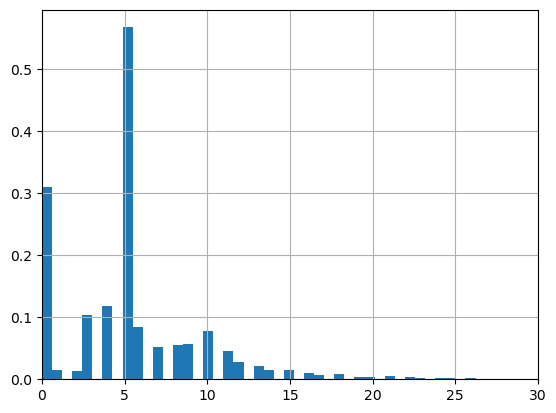

In [374]:
train['n_features'].hist(bins=100, density=True)
plt.xlim(0, 30)
plt.show()

### 8. category

In [375]:
get_col_frequencies(train, col_name='category', sort_index=False)

counts       pct  cumsum_pct
Pet_Supplies                  60005  0.441463    0.441463
Grocery_and_Gourmet_Food      23647  0.173973    0.615437
Office_Products               15052  0.110739    0.726176
Patio_Lawn_and_Garden         12134  0.089271    0.815447
Arts_Crafts_and_Sewing         6660  0.048998    0.864445
Cell_Phones_and_Accessories    6343  0.046666    0.911111
Prime_Pantry                   5846  0.043010    0.954121
Musical_Instruments            3263  0.024006    0.978127
Video_Games                    1448  0.010653    0.988780
Industrial_and_Scientific       869  0.006393    0.995174
AMAZON_FASHION                  371  0.002729    0.997903
All_Beauty                      177  0.001302    0.999205
Luxury_Beauty                    68  0.000500    0.999706
Software                         36  0.000265    0.999971
Digital_Music                     3  0.000022    0.999993
Appliances                        1  0.000007    1.000000

#### # Most reviews (35%) are about Pet_Supplies!

#### # Move categories less than 1% categories to other categories, based on similarity to products coming up in google search of amazon <category name>

In [376]:
small_cats_to_big_cats_mapper = {'Appliances':'Industrial_and_Scientific', 'Industrial_and_Scientific':'Office_Products','AMAZON_FASHION':'Arts_Crafts_and_Sewing', 'Luxury_Beauty':'Arts_Crafts_and_Sewing', 'All_Beauty':'Arts_Crafts_and_Sewing', 'Software':'Video_Games' ,'Digital_Music':'Musical_Instruments'}

train['category'] = train['category'].map(small_cats_to_big_cats_mapper).fillna(train['category'])
train['category'] = train['category'].map(small_cats_to_big_cats_mapper).fillna(train['category'])

val['category'] = val['category'].map(small_cats_to_big_cats_mapper).fillna(val['category'])
test['category'] = test['category'].map(small_cats_to_big_cats_mapper).fillna(test['category'])

In [377]:
get_col_frequencies(train, col_name='category', sort_index=False)

counts       pct  cumsum_pct
Pet_Supplies                  60005  0.441463    0.441463
Grocery_and_Gourmet_Food      23647  0.173973    0.615437
Office_Products               15922  0.117140    0.732577
Patio_Lawn_and_Garden         12134  0.089271    0.821848
Arts_Crafts_and_Sewing         7276  0.053530    0.875378
Cell_Phones_and_Accessories    6343  0.046666    0.922044
Prime_Pantry                   5846  0.043010    0.965054
Musical_Instruments            3266  0.024028    0.989082
Video_Games                    1484  0.010918    1.000000

In [378]:
assert sum(get_col_frequencies(train, col_name='category', sort_index=False)['pct']<0.01) == 0

In [379]:
train['category'].nunique()

9

#### # One-hot encode the categories

In [380]:
train = pd.concat([train, pd.get_dummies(train['category'], prefix='category', drop_first=True)], axis=1)

val = pd.concat([val, pd.get_dummies(val['category'], prefix='category', drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test['category'], prefix='category', drop_first=True)], axis=1)

In [381]:
train.shape

(135923, 28)

### 11. price

In [382]:
train['price']

299905       NaN
304686       NaN
297588    $15.28
299805     $9.36
321930    $34.29
           ...  
157142    $10.57
430671     $9.34
111073       NaN
373135    $62.99
332690    $16.12
Name: price, Length: 135923, dtype: object

In [383]:
train['price'].dtypes

dtype('O')

#### # change price dtype to float

In [384]:
train['price'] = train['price'].str.replace("$", "")
train['price'] = pd.to_numeric(train['price'], errors='coerce').astype(float)

val['price'] = val['price'].str.replace("$", "")
val['price'] = pd.to_numeric(val['price'], errors='coerce').astype(float)
test['price'] = test['price'].str.replace("$", "")
test['price'] = pd.to_numeric(test['price'], errors='coerce').astype(float)

C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\3821992122.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['price'] = train['price'].str.replace("$", "")
C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\3821992122.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  val['price'] = val['price'].str.replace("$", "")
C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\3821992122.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['price'] = test['price'].str.replace("$", "")


In [385]:
train['price'].describe()

count    115999.000000
mean         18.360349
std          25.159338
min           0.740000
25%           7.490000
50%          12.580000
75%          20.000000
max         999.990000
Name: price, dtype: float64

In [386]:
train['price'].isna().sum()/len(train)

0.1465829918409688

#### # 17% of ratings don't contain price data
#### # Let's mark those ratins with an indicator - prica_na, and see if we can impute them somehow (using the train data)

In [387]:
train['price_isna'] = train['price'].isna()*1

val['price_isna'] = val['price'].isna()*1
test['price_isna'] = test['price'].isna()*1

In [388]:
train['brand_itemName'] = train['brand'] + "_" + train['itemName']

val['brand_itemName'] = val['brand'] + "_" + val['itemName']
test['brand_itemName'] = test['brand'] + "_" + test['itemName']

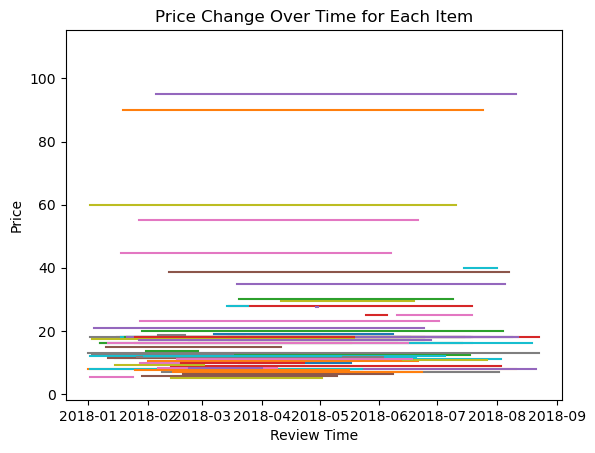

In [389]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train has columns 'item_id', 'price', and 'reviewTime' where 'reviewTime' is a date

# Convert 'reviewTime' to datetime
train['reviewTime'] = pd.to_datetime(train['reviewTime'])

# Filter out rows where 'price' is missing
filtered_train = train.dropna(subset=['price'])

# Group by 'item_id' and 'reviewTime', then calculate the mean price
grouped_train = filtered_train.groupby(['brand_itemName', 'reviewTime'])['price'].mean().reset_index()

# Plotting
for item in grouped_train['brand_itemName'].unique()[:100]:
    item_train = grouped_train[grouped_train['brand_itemName'] == item]
    plt.plot(item_train['reviewTime'], item_train['price'], label=item)

plt.xlabel('Review Time')
plt.ylabel('Price')
plt.title('Price Change Over Time for Each Item')
plt.show()

#### # It seems prices don't change over date, so we can safetly use the train averages of all periods to fill missing prices

In [390]:
import pandas as pd

# Calculate the average price for each item
average_prices_dict = train.dropna(subset='price').groupby('brand_itemName')['price'].mean().to_dict()

# Fill missing prices using map and fillna
train['price'] = train['price'].fillna(train['brand_itemName'].map(average_prices_dict))
val['price'] = val['price'].fillna(val['brand_itemName'].map(average_prices_dict))
test['price'] = test['price'].fillna(test['brand_itemName'].map(average_prices_dict))

In [391]:
train['price'].isna().sum()/len(train)

0.14106516189313067

#### # still alot of NA's. let's see if we can fill those with means of ['category', 'brand'] pricees

In [392]:
train_group_cat_brand_price = train.groupby(['category', 'brand'])['price'].agg(['mean', 'std'])
train_group_cat_brand_price

mean       std
category               brand                                      
Arts_Crafts_and_Sewing 3M                          5.945  1.013287
                       ABEST                       5.990  0.000000
                       ADVANTUS CORPORATION        8.090  0.000000
                       AGPTEK                     24.365  0.517549
                       AIDOX                      10.430  0.000000
...                                                  ...       ...
Video_Games            by\n    \n    Xseed           NaN       NaN
                       by\n    \n    Zettaguard      NaN       NaN
                       by\n    \n    dreamGEAR       NaN       NaN
                       by\n    \n    eBoot           NaN       NaN
                       by\n    \n    eXtremeRate     NaN       NaN

[8257 rows x 2 columns]

In [393]:
train_group_cat_brand_price['mean'].isna().sum()

811

#### # there are still some NA's for the category+brand price means, will fill them with the category means:

In [394]:
category_price_means = train.groupby(['category']).price.mean().to_dict()

# Extract category level from the multi-index of train_group_cat_brand_price
categories = train_group_cat_brand_price.index.get_level_values('category')

# Map the category means to fill missing mean prices
train_group_cat_brand_price['mean'] = train_group_cat_brand_price['mean'].fillna(pd.Series(categories, index=train_group_cat_brand_price.index).map(category_price_means))

In [395]:
assert train_group_cat_brand_price['mean'].isna().sum() == 0

#### # Now examine train_group_cat_brand_price coffiecient of variations to see if they make a good approximation of the prices

In [396]:
train_group_cat_brand_price['CV'] = train_group_cat_brand_price['mean'] / train_group_cat_brand_price['std']
train_group_cat_brand_price

mean       std  \
category               brand                                            
Arts_Crafts_and_Sewing 3M                          5.945000  1.013287   
                       ABEST                       5.990000  0.000000   
                       ADVANTUS CORPORATION        8.090000  0.000000   
                       AGPTEK                     24.365000  0.517549   
                       AIDOX                      10.430000  0.000000   
...                                                     ...       ...   
Video_Games            by\n    \n    Xseed        20.252532       NaN   
                       by\n    \n    Zettaguard   20.252532       NaN   
                       by\n    \n    dreamGEAR    20.252532       NaN   
                       by\n    \n    eBoot        20.252532       NaN   
                       by\n    \n    eXtremeRate  20.252532       NaN   

                                                         CV  
category               brand                                 
Arts_Crafts_and_Sewing 3M                          5.867046  
                       ABEST                            inf  
                       ADVANTUS CORPORATION             inf  
                       AGPTEK                     47.077653  
                       AIDOX                            inf  
...                                                     ...  
Video_Games            by\n    \n    Xseed              NaN  
                       by\n    \n    Zettaguard         NaN  
                       by\n    \n    dreamGEAR          NaN  
                       by\n    \n    eBoot              NaN  
                       by\n    \n    eXtremeRate        NaN  

[8257 rows x 3 columns]

In [397]:
train_group_cat_brand_price['CV'].describe().round(2)

C:\Users\dor.meir\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    6424.00
mean         inf
std          NaN
min         0.26
25%         3.89
50%          NaN
75%          NaN
max          inf
Name: CV, dtype: float64

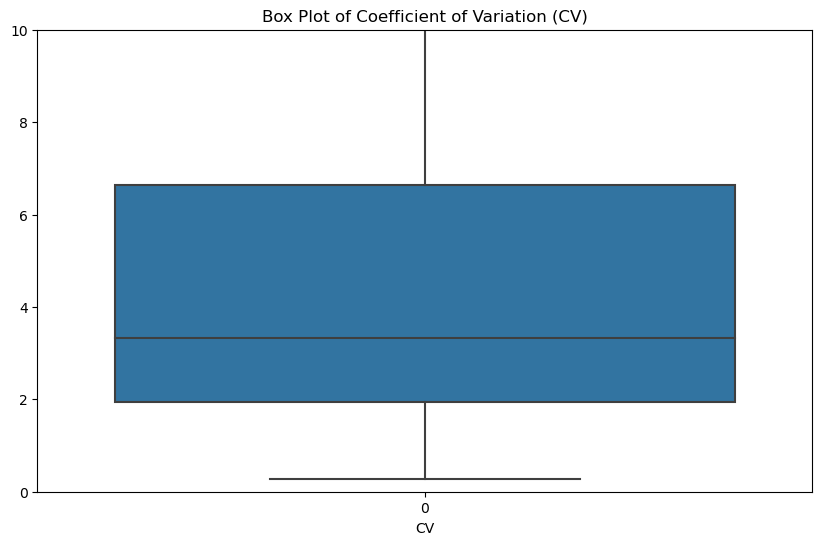

In [398]:
import numpy as np


cv_values = train_group_cat_brand_price['CV']
# Replace inf values with NaN and then drop them
cv_values = np.array(cv_values)  # Ensure cv_values is a NumPy array
cv_values[np.isinf(cv_values)] = np.nan
cv_values_cleaned = cv_values[~np.isnan(cv_values)]

plt.figure(figsize=(10, 6))
sns.boxplot(cv_values)
plt.title('Box Plot of Coefficient of Variation (CV)')
plt.xlabel('CV')
plt.ylim(0, 10)
plt.show()

#### It looks like Coefficients of Variation of the prices of the category brands groups is high enough - most prices in groups are close to the mean price. 
#### # Fill the missing prices with those prices

In [399]:
# Convert the group means to a dictionary with a MultiIndex
mean_price_dict = train_group_cat_brand_price['mean'].to_dict()

# Create a MultiIndex in your original DataFrame for mapping
train['category_brand'] = pd.MultiIndex.from_frame(train[['category', 'brand']])

val['category_brand'] = pd.MultiIndex.from_frame(val[['category', 'brand']])
test['category_brand'] = pd.MultiIndex.from_frame(test[['category', 'brand']])

# Map the means and fill in missing values
train['price'] = train['price'].fillna(train['category_brand'].map(mean_price_dict))

val['price'] = val['price'].fillna(val['category_brand'].map(mean_price_dict))
test['price'] = test['price'].fillna(test['category_brand'].map(mean_price_dict))

# Optionally, you can drop the 'category_brand' column if it's no longer needed
train.drop(['category_brand','brand_itemName'], axis=1, inplace=True, errors='ignore')

val.drop(['category_brand','brand_itemName'], axis=1, inplace=True, errors='ignore')
test.drop(['category_brand','brand_itemName'], axis=1, inplace=True, errors='ignore')

In [400]:
assert train['price'].isna().sum()/len(train) == 0

In [401]:
val['price'].isna().sum()/len(val)

0.0010910159036549034

#### # Fill the reminaing val and test NA's with train's category_price_means

In [402]:
val['price'] = val['price'].fillna(val['category'].map(category_price_means))
test['price'] = test['price'].fillna(test['category'].map(category_price_means))
assert val['price'].isna().sum()/len(val) == 0
assert test['price'].isna().sum()/len(test) == 0

#### # Now, let's Group brands to brand_price_group

In [403]:
brand_price_group_mapper = pd.qcut(train.groupby('brand')['price'].mean(), 10).rename('brand_price_group').to_dict()
train['brand_price_group'] = train['brand'].map(brand_price_group_mapper)

val['brand_price_group'] = val['brand'].map(brand_price_group_mapper)
test['brand_price_group'] = test['brand'].map(brand_price_group_mapper)

train['brand_price_group']

299905    (12.538, 14.98]
304686    (12.538, 14.98]
297588    (12.538, 14.98]
299805      (5.99, 8.154]
321930    (23.99, 34.872]
               ...       
157142     (14.98, 18.19]
430671      (8.154, 9.99]
111073    (12.538, 14.98]
373135    (34.872, 999.0]
332690    (23.99, 34.872]
Name: brand_price_group, Length: 135923, dtype: interval

In [404]:
assert train['brand_price_group'].isna().sum() == 0

In [405]:
val['brand_price_group'].isna().sum(), test['brand_price_group'].isna().sum()

(166, 206)

In [406]:
train_brand_price_mode = train['brand_price_group'].mode()[0]
train_brand_price_mode

Interval(14.98, 18.19, closed='right')

#### # fillna's in val and test (brand that don't exist in train) with train brand_price_group mode 

In [407]:
val['brand_price_group'] = val['brand_price_group'].fillna(train_brand_price_mode)
test['brand_price_group'] = test['brand_price_group'].fillna(train_brand_price_mode)

assert val['brand_price_group'].isna().sum() == 0
assert test['brand_price_group'].isna().sum() == 0

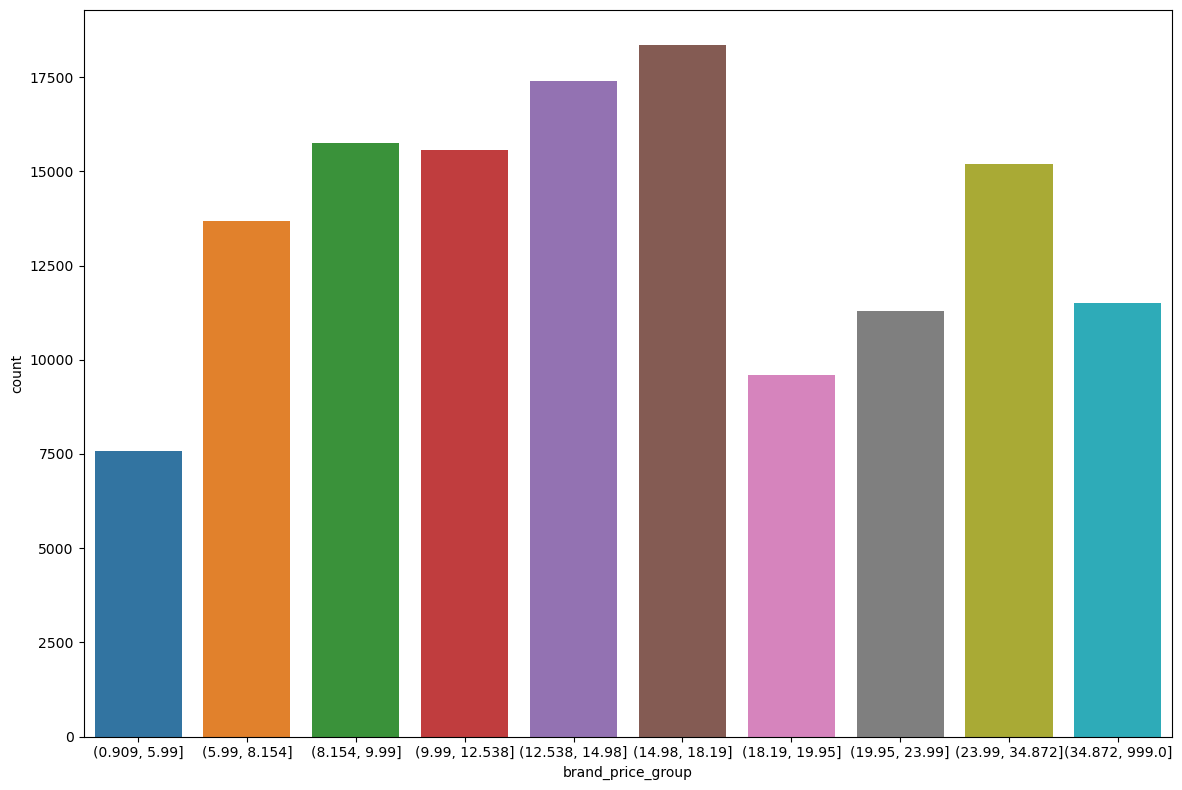

In [408]:
plt.figure(figsize=(12,8))
sns.countplot(x='brand_price_group', data=train.sort_values(by='brand_price_group'))

plt.tight_layout()

#### # One-hot encode the 10 brand_price_group

In [409]:
train = pd.concat([train, pd.get_dummies(train['brand_price_group'], prefix='brand_price', drop_first=True)], axis=1)

val = pd.concat([val, pd.get_dummies(val['brand_price_group'], prefix='brand_price', drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test['brand_price_group'], prefix='brand_price', drop_first=True)], axis=1)

In [410]:
train

userName                                            item_id  \
299905              Boo  Pedigree_Pedigree Complete Nutrition Adult Dry...   
304686              Boo  Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...   
297588              Boo  Pedigree_Pedigree Adult Dry Dog Food - Grilled...   
299805              Boo  Purina ALPO Brand Dog Food_Purina ALPO Prime C...   
321930        Carol Ann  PETMAKER_PETMAKER Folding Plastic Pet Stairs D...   
...                 ...                                                ...   
157142  ~Susan Atherton  Grafix_Grafix 4-1/2-Ounce Incredible White Mas...   
430671  ~Susan Atherton  Meyenberg_Meyenberg Goat Milk - Powdered, 12-O...   
111073  ~Susan Atherton  Arm & Hammer_Arm &amp; Hammer Super Scoop Clum...   
373135  ~Susan Atherton  Furhaven Pet_FurHaven Pet Cat Furniture | Tige...   
332690  ~Susan Atherton          PETMAKER_PAW Cozy Kitty Tent Igloo_$16.12   

                                                 itemName  \
299905  Pedigree Complete Nutrition Adult Dry Dog Food...   
304686  Milk-Bone Marosnacks Dog Snacks - Small, 10-Ou...   
297588  Pedigree Adult Dry Dog Food - Grilled Steak &a...   
299805  Purina ALPO Prime Cuts in Gravy Adult Wet Dog ...   
321930  PETMAKER Folding Plastic Pet Stairs Durable In...   
...                                                   ...   
157142  Grafix 4-1/2-Ounce Incredible White Mask Liqui...   
430671           Meyenberg Goat Milk - Powdered, 12-Ounce   
111073  Arm &amp; Hammer Super Scoop Clumping Litter, ...   
373135  FurHaven Pet Cat Furniture | Tiger Tough Cat T...   
332690                          PAW Cozy Kitty Tent Igloo   

                                              description  \
299905  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
304686  ["Great for training. Fewer crumbs, cleaner sh...   
297588  ["Give your dog the taste of succulent steak a...   
299805  ['', "Dazzle your dog's taste buds with Purina...   
321930  ['The PETMAKER folding plastic pet stairs help...   
...                                                   ...   
157142  ['A high quality latex that assures an easily ...   
430671  ['Powdered Goat Milk by Meyenberg Goat Milk Pr...   
111073  ['Super Scoop is formulated with ARM & HAMMER ...   
373135  ['Product DETAILS - 28" L x 16" W x 55" H, Col...   
332690  ['The PETMAKER Cozy Cave Cube allows for relax...   

                                                    image  \
299905  ['https://images-na.ssl-images-amazon.com/imag...   
304686  ['https://images-na.ssl-images-amazon.com/imag...   
297588  ['https://images-na.ssl-images-amazon.com/imag...   
299805  ['https://images-na.ssl-images-amazon.com/imag...   
321930  ['https://images-na.ssl-images-amazon.com/imag...   
...                                                   ...   
157142                                                 []   
430671  ['https://images-na.ssl-images-amazon.com/imag...   
111073  ['https://images-na.ssl-images-amazon.com/imag...   
373135  ['https://images-na.ssl-images-amazon.com/imag...   
332690  ['https://images-na.ssl-images-amazon.com/imag...   

                             brand  \
299905                    Pedigree   
304686                   Milk-Bone   
297588                    Pedigree   
299805  Purina ALPO Brand Dog Food   
321930                    PETMAKER   
...                            ...   
157142                      Grafix   
430671                   Meyenberg   
111073                Arm & Hammer   
373135                Furhaven Pet   
332690                    PETMAKER   

                                                  feature  \
299905  ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...   
304686  ['Contains 12 - 10 Oz Boxes', 'Great For Train...   
297588  ['Contains One (1) 17 Lb. Bag Of Pedigree Comp...   
299805  ['Twelve (12) 13.2 Oz. Can - Purina Alpo Prime...   
321930  ['DURABLE AND EASY TO CLEAN -Made of tough and...   
...                                                   ..

### 12. reviewTime

In [411]:
train['reviewTime'] = pd.to_datetime(train['reviewTime'])

val['reviewTime'] = pd.to_datetime(val['reviewTime'])
test['reviewTime'] = pd.to_datetime(test['reviewTime'])

In [412]:
train['reviewTime'].describe()

C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\1177590645.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train['reviewTime'].describe()


count                  135923
unique                    275
top       2018-04-02 00:00:00
freq                     1142
first     2018-01-01 00:00:00
last      2018-10-02 00:00:00
Name: reviewTime, dtype: object

In [413]:
print(train['reviewTime'].min(), train['reviewTime'].max(),

val['reviewTime'].min(), val['reviewTime'].max(),
test['reviewTime'].min(), test['reviewTime'].max())

2018-01-01 00:00:00 2018-10-02 00:00:00 2018-01-01 00:00:00 2018-10-02 00:00:00 2018-01-01 00:00:00 2018-09-26 00:00:00


#### # There are  277 days in reviewTime, from Jan 2018 to Cct 10. 
#### # We saw the prices don't change in different dates.
#### # Not sure we'll do something with those dates - we'll recommend based on all historical ratings, regardless of date

### 13. summary

In [414]:
train['summary']

299905                                          Great price
304686                                            She likes
297588                                          Great price
299805                                          Great price
321930                      Sturdy. Good cover on the steps
                                ...                        
157142    Very happy, you need to be throughtful about w...
430671                             Good for abandon kitten!
111073                                  I got a good batch.
373135    I'll let them tear it apart but won't buy anot...
332690                         UPDATE:  COULD BE DANGEROUS.
Name: summary, Length: 135923, dtype: object

In [415]:
train['summary'].isna().sum()

61

#### # add a column for summary_isna and fill NA's with ''

In [416]:
train['summary_isna'] = train['summary'].isna()*1

val['summary_isna'] = val['summary'].isna()*1
test['summary_isna'] = test['summary'].isna()*1

In [417]:
train['summary'] = train['summary'].fillna("")

val['summary'] = val['summary'].fillna("")
test['summary'] = test['summary'].fillna("")
assert train['summary'].isna().sum() == 0

#### # Create numeric features for the summary - summary_len, summary_n_words - even though we might not use this data in the end

In [418]:
train['summary_len'] = train['summary'].str.len()

val['summary_len'] = val['summary'].str.len()
test['summary_len'] = test['summary'].str.len()

In [419]:
train['summary_n_words'] = train['summary'].str.split().str.len()

val['summary_n_words'] = val['summary'].str.split().str.len()
test['summary_n_words'] = test['summary'].str.split().str.len()

In [420]:
train[[col for col in train if 'summary' in col]].describe()

summary_isna    summary_len  summary_n_words
count  135923.000000  135923.000000    135923.000000
mean        0.000449      22.317930         4.261236
std         0.021180      19.205593         3.745800
min         0.000000       0.000000         0.000000
25%         0.000000      10.000000         2.000000
50%         0.000000      12.000000         2.000000
75%         0.000000      29.000000         5.000000
max         1.000000     337.000000        65.000000

#### # 2% of ratings don't have a summary, the median summary has 12 characters and 2 words - most probably that's just "X stars"

### 14. reviewText

In [421]:
train['reviewText']

299905                                        She likes it!
304686                This is one of few snacks she likes..
297588                                        She likes it!
299805                                         She likes it
321930    Sturdy.  Good cover on the steps. Has to be br...
                                ...                        
157142    It takes a little planning to make it work to ...
430671    I used it to bring an abandon barn kitten to h...
111073    I got a good batch.  I agree with other commen...
373135    Bottom to top.  Toy is in the way, I set it ou...
332690    UPDATE:  BE CAREFUL KITTEN GOT THIS TURNED OVE...
Name: reviewText, Length: 135923, dtype: object

In [422]:
train['reviewText'].describe()

count     135821
unique    108885
top         good
freq         716
Name: reviewText, dtype: object

In [423]:
train['reviewText'].isna().sum()

102

#### # add a column for reviewText_isna and fill NA's with ''

In [424]:
train['reviewText_isna'] = train['reviewText'].isna()*1

val['reviewText_isna'] = val['reviewText'].isna()*1
test['reviewText_isna'] = test['reviewText'].isna()*1

In [425]:
train['reviewText'] = train['reviewText'].fillna("")

val['reviewText'] = val['reviewText'].fillna("")
test['reviewText'] = test['reviewText'].fillna("")
assert train['reviewText'].isna().sum() == 0

#### # Create numeric features for the summary - summary_len, summary_n_words - even though we might not use this data in the end

In [426]:
train['reviewText_len'] = train['reviewText'].str.len()

val['reviewText_len'] = val['reviewText'].str.len()
test['reviewText_len'] = test['reviewText'].str.len()

In [427]:
train['reviewText_n_words'] = train['reviewText'].str.split().str.len()

val['reviewText_n_words'] = val['reviewText'].str.split().str.len()
test['reviewText_n_words'] = test['reviewText'].str.split().str.len()

In [428]:
train[[col for col in train if 'reviewText' in col]].describe()

reviewText_isna  reviewText_len  reviewText_n_words
count    135923.000000   135923.000000       135923.000000
mean          0.000750      142.301840           27.021542
std           0.027384      227.843616           42.751998
min           0.000000        0.000000            0.000000
25%           0.000000       27.000000            5.000000
50%           0.000000       70.000000           13.000000
75%           0.000000      169.000000           33.000000
max           1.000000     8297.000000         1556.000000

#### # 3% of reviewText are missing, and the median reviewText have 70 characters in 13 words 

### 15. vote

In [429]:
df['vote'].describe()

count    210203.000000
mean          0.117001
std           1.668396
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         418.000000
Name: vote, dtype: float64

In [430]:
df['vote'].isna().sum()

0

#### # votes is a different feature that the other ones - we might use it as weights in the model

## Handle Outliers

In [431]:
train_statistics = train.drop(columns=target).describe(include='all').T
train_statistics

C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\2306577014.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_statistics = train.drop(columns=target).describe(include='all').T


count  unique  \
userName                                135923   14459   
item_id                                 135923   24174   
itemName                                135923   23625   
description                             135923   20358   
image                                   135923   21421   
brand                                   135923    7745   
feature                                 135923   18567   
category                                135923       9   
price                                 135923.0     NaN   
reviewTime                              135923     275   
summary                                 135923   65120   
reviewText                              135923  108886   
vote                                  135923.0     NaN   
description_n_sentences               135923.0     NaN   
description_len                       135923.0     NaN   
n_images                              135923.0     NaN   
brand_isna                            135923.0     NaN   
n_features                            135923.0     NaN   
feature_len                           135923.0     NaN   
category_Cell_Phones_and_Accessories  135923.0     NaN   
category_Grocery_and_Gourmet_Food     135923.0     NaN   
category_Musical_Instruments          135923.0     NaN   
category_Office_Products              135923.0     NaN   
category_Patio_Lawn_and_Garden        135923.0     NaN   
category_Pet_Supplies                 135923.0     NaN   
category_Prime_Pantry                 135923.0     NaN   
category_Video_Games                  135923.0     NaN   
price_isna                            135923.0     NaN   
brand_price_group                       135923      10   
brand_price_(5.99, 8.154]             135923.0     NaN   
brand_price_(8.154, 9.99]             135923.0     NaN   
brand_price_(9.99, 12.538]            135923.0     NaN   
brand_price_(12.538, 14.98]           135923.0     NaN   
brand_price_(14.98, 18.19]            135923.0     NaN   
brand_price_(18.19, 19.95]            135923.0     NaN   
brand_price_(19.95, 23.99]            135923.0     NaN   
brand_price_(23.99, 34.872]           135923.0     NaN   
brand_price_(34.872, 999.0]           135923.0     NaN   
summary_isna                          135923.0     NaN   
summary_len                           135923.0     NaN   
summary_n_words                       135923.0     NaN   
reviewText_isna                       135923.0     NaN   
reviewText_len                        135923.0     NaN   
reviewText_n_words                    135923.0     NaN   

                                                                                    top  \
userName                                                                Amazon Customer   
item_id                               KIND_KIND Bars, Caramel Almond and Sea Salt, G...   
itemName                                                           Puppia Dog Harnesses   
description                                                                          []   
image                                                                                []   
brand                                                                              KONG   
feature                                                                              []   
category                                                                   Pet_Supplies   
price                                                                               NaN   
reviewTime                                                          2018-04-02 00:00:00   
summary                                                                      Five Stars   
reviewText                                                                         good   
vote                                                                                NaN   
description_n_sentences                                                             NaN   
description_len                                                  

In [432]:
orig_cols

Index(['userName', 'verified', 'itemName', 'description', 'image', 'brand',
       'feature', 'category', 'price', 'rating', 'reviewTime', 'summary',
       'reviewText', 'vote'],
      dtype='object')

In [433]:
numeric_cols_no_target = [col for col in train.describe().columns if target not in col if col in train.columns]
numeric_cols_no_target

['price',
 'vote',
 'description_n_sentences',
 'description_len',
 'n_images',
 'brand_isna',
 'n_features',
 'feature_len',
 'category_Cell_Phones_and_Accessories',
 'category_Grocery_and_Gourmet_Food',
 'category_Musical_Instruments',
 'category_Office_Products',
 'category_Patio_Lawn_and_Garden',
 'category_Pet_Supplies',
 'category_Prime_Pantry',
 'category_Video_Games',
 'price_isna',
 'brand_price_(5.99, 8.154]',
 'brand_price_(8.154, 9.99]',
 'brand_price_(9.99, 12.538]',
 'brand_price_(12.538, 14.98]',
 'brand_price_(14.98, 18.19]',
 'brand_price_(18.19, 19.95]',
 'brand_price_(19.95, 23.99]',
 'brand_price_(23.99, 34.872]',
 'brand_price_(34.872, 999.0]',
 'summary_isna',
 'summary_len',
 'summary_n_words',
 'reviewText_isna',
 'reviewText_len',
 'reviewText_n_words']

In [434]:

# Add outlier column indicator, having 1 for outlier rows
train_numeric_features = numeric_cols_no_target  # When none, assume train dataset and find all relevent columns
train_n_uniques = train[numeric_cols_no_target].nunique()
train_numeric_features = train_n_uniques[train_n_uniques>2].index.tolist()
train, train_outiler_cols = add_outlier_indicators_on_features(train, train_statistics,
                                                               X_train_numeric_features=train_numeric_features,
                                                                 outlier_col_suffix=outlier_col_suffix)

# if outliers exist, update outlier statistics to train_statistics
if len(train_outiler_cols) > 0:
    train_statistics = add_new_features_statistics_to_train_statistics(train, train_statistics, train_outiler_cols)

# Apply outlier indicators on validation and test

# get train outlier columns
train_outiler_cols = get_train_features_with_suffix(train_statistics, the_suffix=outlier_col_suffix)
# if outliers exist in train, add outlier indicators to val and test in those specific features
if len(train_outiler_cols) > 0:
    add_outlier_indicators_on_features_fn = partial(add_outlier_indicators_on_features,
                                                    the_train_statistics=train_statistics,
                                                    X_train_numeric_features=train_outiler_cols,
                                                    outlier_col_suffix=outlier_col_suffix)
    val, _ = add_outlier_indicators_on_features_fn(val)
    test, _ = add_outlier_indicators_on_features_fn(test)

    # Validate outliers detection: Test if train outlier statistics are different from val outlier statistics
    remove_suffix = False
    train_outlier_cols = get_train_features_with_suffix(train_statistics, the_suffix=outlier_col_suffix,
                                                        remove_suffix=remove_suffix)
    remove_suffix = True
    train_orig_outlier_cols = get_train_features_with_suffix(train_statistics, the_suffix=outlier_col_suffix,
                                                             remove_suffix=remove_suffix)
    train_outliers = train.loc[(train[train_outlier_cols] == 1).any(axis=1), train_orig_outlier_cols]
    val_outliers = val.loc[(val[train_outlier_cols] == 1).any(axis=1), train_orig_outlier_cols]
    print(f"\n# The train outliers:\n {train_outliers}")
    trains_dict_to_test = {'val_outliers': val_outliers}
    # train_val_outlier_means_test = test_if_features_statistically_different(train_outliers, trains_dict_to_test,
    #                                                                         alpha=alpha)
    # print('\n# Test if train and validation outliers means are statisically not different:\n',
    #       train_val_outlier_means_test)

# Impute outliers features

train_statistics = add_winsorization_values_to_train_statistics(train.drop(columns=target), train_statistics)
train = pd.concat([winsorize_outliers(train.drop(columns=target), train_statistics), train[target]], axis=1)
val = pd.concat([winsorize_outliers(val.drop(columns=target), train_statistics), val[target]], axis=1)
test = pd.concat([winsorize_outliers(test.drop(columns=target), train_statistics), test[target]], axis=1)

add_outlier_indicators_on_features()
add_new_features_statistics_to_train_statistics()
get_train_features_with_suffix()
add_outlier_indicators_on_features()
add_outlier_indicators_on_features()
get_train_features_with_suffix()
get_train_features_with_suffix()

# The train outliers:
             price  vote  description_n_sentences  description_len  n_images  \
321011  19.500000     0                        0                2         6   
394012  28.950000     0                       14             4937         3   
219730  14.890000     0                       11             5620        10   
159862  26.890000     0                        1              855         3   
470920   2.710000     0                        7             1200         4   
...           ...   ...                      ...              ...       ...   
483323   8.990000     0                        1              611         0   
165532  22.960000    10                        1              697         0   
26156

C:\Users\dor.meir\OneDrive - Qualitest Group\Documents\Courses\Educative\Cracking your first Data Science project\src\training.py:203: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  winsorization_values = the_X_train.describe(include='all', percentiles=[.05, .95]).T


winsorize_outliers()
get_train_features_with_suffix()
get_train_features_with_suffix()
winsorize_outliers()
get_train_features_with_suffix()
get_train_features_with_suffix()
winsorize_outliers()
get_train_features_with_suffix()
get_train_features_with_suffix()


# Add Collaborative filtering features

In [435]:
import gc
gc.collect()

21

#### # The following lines will take a few minutes to run...

In [436]:
# Create a user-item matrix
user_item_matrix = train.pivot_table(index='userName', columns='item_id', values='rating')

## User-Based Collaborative Filtering - how similar users rated an item 

In [437]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

# Convert to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [438]:
user_similarity_df.shape

(14459, 14459)

In [439]:
def create_similar_users_dict(user_similarity_df, top_n=5):
    similar_users_dict = {}
    for user in user_similarity_df.index:
        # Get top N similar users; skip the first one as it will be the user itself
        top_similar = user_similarity_df[user].sort_values(ascending=False)[1:top_n+1]
        similar_users_dict[user] = list(zip(top_similar.index, top_similar.values))
    return similar_users_dict

# Assuming user_similarity_df is your user-user similarity DataFrame
similar_users_dict = create_similar_users_dict(user_similarity_df)

In [440]:
similar_users_dict.keys()

dict_keys([' Boo', ' Carol Ann', ' KT', ' Seas the Day ', '#1 Honest reviewer :)', '#1clarkgirl', '#Blessed', '&#034;Chateau Toro&#034;', '&#039;El-Choya&#039;', '&amp;#34;Legalady&amp;#34;', '()', '-Mimi-', '.', '1 poodle lover', '1000riv', '10vfreeman', '1STARBUCK1', '1VAarcher', '1feistymama', '1nightbird1', '2 Old Texan&#039;s', '2 meatballz', '2 normal people', '2cat mom', '2tall4u', '3Gr8KidsDad', '3rdGen', '40dbOverS9', '454Malibu', '465alm', '4real', '50 something', '50Bubbles', '5everyung', '5kjen', '62moviefan', '73roe', '77', '808', ':) jlp', '@Kilmichael', '@angelaswriter', '@laudpatty', 'A', 'A Abbott', 'A Bias Opinion', 'A Customer', 'A DebLynn Review', 'A H', 'A Lane', 'A Long-time Customer', 'A Loyal Amazonian', 'A M', 'A March', 'A Mom', 'A Nicholas', 'A R', 'A Reader', 'A Reviewer', 'A Seamstress', 'A Shopper', 'A Staniford', 'A Texas Alexandra', 'A Uni', 'A White', 'A boz', 'A customer', 'A girl', 'A hiker', 'A reader', 'A student', 'A&amp;H R. Family', 'A.', 'A. Ald

In [441]:
similar_users_dict[' Boo']

[('J. V. Robinson', 0.6154574548966636),
 ('casis', 0.5773502691896258),
 ('Don B', 0.3380617018914066),
 ('Ty', 0.337099931231621),
 ('kim tindell', 0.31750031750047625)]

In [442]:
train[train['userName'].isin([' Boo','J. V. Robinson'])].sort_values('item_id')

userName                                            item_id  \
304686             Boo  Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...   
297588             Boo  Pedigree_Pedigree Adult Dry Dog Food - Grilled...   
257373  J. V. Robinson  Pedigree_Pedigree Adult Dry Dog Food - Grilled...   
299905             Boo  Pedigree_Pedigree Complete Nutrition Adult Dry...   
256923  J. V. Robinson  Pedigree_Pedigree Complete Nutrition Adult Dry...   
299805             Boo  Purina ALPO Brand Dog Food_Purina ALPO Prime C...   
33150   J. V. Robinson  Zen Clipper_Zen Clipper Pet Nail Clippers - Th...   

                                                 itemName  \
304686  Milk-Bone Marosnacks Dog Snacks - Small, 10-Ou...   
297588  Pedigree Adult Dry Dog Food - Grilled Steak &a...   
257373  Pedigree Adult Dry Dog Food - Grilled Steak &a...   
299905  Pedigree Complete Nutrition Adult Dry Dog Food...   
256923  Pedigree Complete Nutrition Adult Dry Dog Food...   
299805  Purina ALPO Prime Cuts in Gravy Adult Wet Dog ...   
33150   Zen Clipper Pet Nail Clippers - The Worry-Free...   

                                              description  \
304686  ["Great for training. Fewer crumbs, cleaner sh...   
297588  ["Give your dog the taste of succulent steak a...   
257373  ["Give your dog the taste of succulent steak a...   
299905  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
256923  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
299805  ['', "Dazzle your dog's taste buds with Purina...   
33150   ["If you have anxiety about clipping your pets...   

                                                    image  \
304686  ['https://images-na.ssl-images-amazon.com/imag...   
297588  ['https://images-na.ssl-images-amazon.com/imag...   
257373  ['https://images-na.ssl-images-amazon.com/imag...   
299905  ['https://images-na.ssl-images-amazon.com/imag...   
256923  ['https://images-na.ssl-images-amazon.com/imag...   
299805  ['https://images-na.ssl-images-amazon.com/imag...   
33150   ['https://images-na.ssl-images-amazon.com/imag...   

                             brand  \
304686                   Milk-Bone   
297588                    Pedigree   
257373                    Pedigree   
299905                    Pedigree   
256923                    Pedigree   
299805  Purina ALPO Brand Dog Food   
33150                  Zen Clipper   

                                                  feature      category  \
304686  ['Contains 12 - 10 Oz Boxes', 'Great For Train...  Pet_Supplies   
297588  ['Contains One (1) 17 Lb. Bag Of Pedigree Comp...  Pet_Supplies   
257373  ['Contains One (1) 17 Lb. Bag Of Pedigree Comp...  Pet_Supplies   
299905  ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...  Pet_Supplies   
256923  ['Contains One (1) 40 Lb. Bag Of Pedigree Comp...  Pet_Supplies   
299805  ['Twelve (12) 13.2 Oz. Can - Purina Alpo Prime...  Pet_Supplies   
33150   ['The worry-free nail trimmer - choose your Ze...  Pet_Supplies   

            price reviewTime                 summary  \
304686  12.790205 2018-04-07               She likes   
297588  15.280000 2018-04-05             Great price   
257373  15.280000 2018-03-23              Five Stars   
299905  14.753769 2018-04-05             Great price   
256923  14.753769 2018-03-23              Five Stars   
299805   9.360000 2018-04-05             Great price   
33150   24.950000 2018-01-11  You may need two pairs   

                                               reviewText  vote  \
304686              This is one of few snacks she likes..     0   
297588                                      She likes it!     0   
257373                                    My dogs like it     0   
299905                                      She likes it!     0   
256923                                    My dogs like it     0   
299805                                       She likes it     0   
33150   Makes clipping nails less traumatic. But if yo...     2   

        description_n_sentences  descr

#### # Test similarity matrix - they're indeed similair - both in item rated and in their ratings!

In [443]:
train[train['userName'].isin([' Boo','kim tindell'])].sort_values('item_id').sort_values('item_id')

userName                                            item_id  \
41945   kim tindell  Cameron's Coffee_Cameron's Coffee Holiday Roas...   
314368  kim tindell  DreamBone_DreamSticks Rawhide Free Vegetable C...   
77706   kim tindell  Ethical Pets_Ethical Pets Skinneeez Tons of Sq...   
58184   kim tindell       KONG_KONG Dodo Bird Dog Toy, Assorted_$14.99   
313158  kim tindell       KONG_KONG Dynos Pterodactyl Coral Dog Toy_NA   
304686          Boo  Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...   
39920   kim tindell  Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...   
297588          Boo  Pedigree_Pedigree Adult Dry Dog Food - Grilled...   
299905          Boo  Pedigree_Pedigree Complete Nutrition Adult Dry...   
299805          Boo  Purina ALPO Brand Dog Food_Purina ALPO Prime C...   
42223   kim tindell  goDog_goDog Dinos with Chew Guard Technology D...   

                                                 itemName  \
41945   Cameron's Coffee Holiday Roasted Ground Coffee...   
314368  DreamSticks Rawhide Free Vegetable Chew, Chick...   
77706   Ethical Pets Skinneeez Tons of Squeakers, Dog Toy   
58184                    KONG Dodo Bird Dog Toy, Assorted   
313158               KONG Dynos Pterodactyl Coral Dog Toy   
304686  Milk-Bone Marosnacks Dog Snacks - Small, 10-Ou...   
39920   Milk-Bone Marosnacks Dog Snacks - Small, 10-Ou...   
297588  Pedigree Adult Dry Dog Food - Grilled Steak &a...   
299905  Pedigree Complete Nutrition Adult Dry Dog Food...   
299805  Purina ALPO Prime Cuts in Gravy Adult Wet Dog ...   
42223   goDog Dinos with Chew Guard Technology Durable...   

                                              description  \
41945   ['', 'Thoughtfully Sourcing<br />We travel the...   
314368  ['Chewing is an essential activity for dogs  i...   
77706   ["Skinnies tons-o-squeakers are stuffing-free ...   
58184   ["Check out these cute Dodo's. Brightly colore...   
313158           ['KONG Dynos Pterodactyl, Coral, Large']   
304686  ["Great for training. Fewer crumbs, cleaner sh...   
39920   ["Great for training. Fewer crumbs, cleaner sh...   
297588  ["Give your dog the taste of succulent steak a...   
299905  ["PEDIGREE Adult Complete Nutrition Roasted Ch...   
299805  ['', "Dazzle your dog's taste buds with Purina...   
42223   ['goDog Dinos are a blast from the past.Made w...   

                                                    image  \
41945   ['https://images-na.ssl-images-amazon.com/imag...   
314368  ['https://images-na.ssl-images-amazon.com/imag...   
77706   ['https://images-na.ssl-images-amazon.com/imag...   
58184   ['https://images-na.ssl-images-amazon.com/imag...   
313158  ['https://images-na.ssl-images-amazon.com/imag...   
304686  ['https://images-na.ssl-images-amazon.com/imag...   
39920   ['https://images-na.ssl-images-amazon.com/imag...   
297588  ['https://images-na.ssl-images-amazon.com/imag...   
299905  ['https://images-na.ssl-images-amazon.com/imag...   
299805  ['https://images-na.ssl-images-amazon.com/imag...   
42223   ['https://images-na.ssl-images-amazon.com/imag...   

                             brand  \
41945             Cameron's Coffee   
314368                   DreamBone   
77706                 Ethical Pets   
58184                         KONG   
313158                        KONG   
304686                   Milk-Bone   
39920                    Milk-Bone   
297588                    Pedigree   
299905                    Pedigree   
299805  Purina ALPO Brand Dog Food   
42223                        goDog   

                                                  feature  \
41945                                                  []   
314368  ['Now made in Vietnam; Made with Real Beef, Ch...   
77706   ['Stuffing free', 'Flip flopping fun', 'Non-st...   
58184   ['N/A', 'Imported', 'Extra loud squeak ; One p...   
313158  ['Reinforced lining for strength', 'Varied tex...   
304686  ['Contains 12 - 10 Oz Boxes', 'Great For Train...   
39920   ['Contains 12 - 10 Oz Boxes', '

#### # They're less similar

## Create features based on statistics on similar users: this will take about 30 minutes, depending on your hardware...

#### # The following box will take a few minutes to run...

In [444]:
from tqdm import tqdm
import gc

def similar_users_weighted_average_features_for_item(user_id, item_id, similar_users_dict, train_df, n_similar_users=5, features=None, default_val=0):
    if features is None:
        features = ['rating', 'description_len', 'n_images', 'feature_len', 'price', 'summary_len', 'reviewText_len']
    # Check if the user_id exists in the similar_users_dict
    if user_id not in similar_users_dict:
        # Create a Series with default values and correct index names
        default_values = [default_val] * len(features)
        default_series = pd.Series(default_values, index=[f'sim_{n_similar_users}_users_{feature}' for feature in features])
        return default_series
    
    # Filter for the specific item
    train_df_filtered  = train_df[train_df['item_id'] == item_id]

    # Get top N similar users for the given user
    top_similar_users = similar_users_dict[user_id][:n_similar_users]

    # Create a DataFrame from the similar users list
    similar_users_df = pd.DataFrame(top_similar_users, columns=['userName', 'similarity_score'])

    # Merge with the ratings DataFrame
    item_features = pd.merge(similar_users_df, train_df_filtered , on='userName')

    # Calculate weighted averages for all features
    weighted_avgs = {}
    for feature in features:
        if not item_features.empty:
            weighted_avg = (item_features[feature].multiply(item_features['similarity_score'], axis=0)).sum() / item_features['similarity_score'].sum()
        else:
            weighted_avg = 0  # or a default value, depending on your use case
        weighted_avgs[feature] = weighted_avg

    # Convert the result to a DataFrame
    #result_df = pd.DataFrame([weighted_avgs]).add_suffix(f'sim_{n_similar_users}_users_')
    result_series = pd.Series(weighted_avgs.values(), index=[f'sim_{n_similar_users}_users_{feature}' for feature in features])

    return result_series

def process_in_chunks(the_df, similar_users_dict, train_df, features, chunk_size=1000, n_similar_users=5):
    # Create chunks of the DataFrame
    chunks = (the_df.iloc[i:i + chunk_size] for i in range(0, the_df.shape[0], chunk_size))

    # Initialize an empty list to store processed chunks
    processed_chunks = []

    # Iterate through the chunks
    for chunk in tqdm(chunks, total=the_df.shape[0] // chunk_size):
        # Apply the function to calculate weighted averages for the features
        weighted_avg_features = chunk.apply(lambda row: similar_users_weighted_average_features_for_item(
            user_id=row['userName'],
            item_id=row['item_id'],
            similar_users_dict=similar_users_dict,
            train_df=train_df,
            features=features,
            n_similar_users=n_similar_users
        ), axis=1)
        # Concatenate the result to the original chunk
        chunk = pd.concat([chunk, weighted_avg_features], axis=1)
        # Append the processed chunk to the list
        processed_chunks.append(chunk)

        # After processing each chunk
        del chunk
        gc.collect()

    # Combine the processed chunks back into a single DataFrame
    return pd.concat(processed_chunks)

# Define the list of features you want to calculate weighted averages for
features = ['rating', 'description_len', 'n_images', 'feature_len', 'price', 'summary_len', 'reviewText_len']


IMPORT_DFS = True
SAVE_DFS = False
# Process each dataset
chunk_size = 500

train_processed = pd.read_csv("train_processed.csv") if IMPORT_DFS else process_in_chunks(train, similar_users_dict, train, features, chunk_size=chunk_size)
train_processed.to_csv("train_processed.csv", index=False) if SAVE_DFS else ""
val_processed = pd.read_csv("val_processed.csv") if IMPORT_DFS else process_in_chunks(val, similar_users_dict, train, features, chunk_size=chunk_size)
val_processed.to_csv("val_processed.csv", index=False) if SAVE_DFS else ""
test_processed = pd.read_csv("test_processed.csv") if IMPORT_DFS else process_in_chunks(test, similar_users_dict, train, features, chunk_size=chunk_size)
test_processed.to_csv("test_processed.csv", index=False) if SAVE_DFS else ""

''

## Item-Based Collaborative Filtering - Rating user gave for simlair items

In [445]:
train = train_processed
val = val_processed
test = test_processed

# Feature Engineering - from current features

In [450]:
numeric_cols = [col for col in train.describe().columns if not 'sim_' in col]
numeric_cols

['price',
 'vote',
 'description_n_sentences',
 'description_len',
 'n_images',
 'brand_isna',
 'n_features',
 'feature_len',
 'category_Cell_Phones_and_Accessories',
 'category_Grocery_and_Gourmet_Food',
 'category_Musical_Instruments',
 'category_Office_Products',
 'category_Patio_Lawn_and_Garden',
 'category_Pet_Supplies',
 'category_Prime_Pantry',
 'category_Video_Games',
 'price_isna',
 'brand_price_(5.99, 8.154]',
 'brand_price_(8.154, 9.99]',
 'brand_price_(9.99, 12.538]',
 'brand_price_(12.538, 14.98]',
 'brand_price_(14.98, 18.19]',
 'brand_price_(18.19, 19.95]',
 'brand_price_(19.95, 23.99]',
 'brand_price_(23.99, 34.872]',
 'brand_price_(34.872, 999.0]',
 'summary_isna',
 'summary_len',
 'summary_n_words',
 'reviewText_isna',
 'reviewText_len',
 'reviewText_n_words',
 'price_is_outlier',
 'vote_is_outlier',
 'description_n_sentences_is_outlier',
 'description_len_is_outlier',
 'n_images_is_outlier',
 'n_features_is_outlier',
 'feature_len_is_outlier',
 'summary_len_is_outlie

In [451]:
train_user_stats_for_new_features = train.groupby('userName')[numeric_cols].agg(['min','mean','median','max','std']).fillna(0)
train_user_stats_for_new_features.columns = [a + "_" + b for a,b in train_user_stats_for_new_features.columns]
train_user_stats_for_new_features = train_user_stats_for_new_features.add_prefix('user_')
train_user_stats_for_new_features

user_price_min  user_price_mean  user_price_median  \
userName                                                                    
 Boo                             9.36        13.045994          13.771987   
 Carol Ann                      19.50        24.850000          22.805000   
 KT                              1.19        11.255056           3.680000   
 Seas the Day                    2.58         2.580000           2.580000   
#1 Honest reviewer :)            7.95        30.572727          16.930000   
...                               ...              ...                ...   
zdamaw                           1.99        16.363333           9.240000   
zensm                            8.65        19.050886          16.778545   
zephyr 2                         4.26        15.053333          15.410000   
zman                            10.99        22.654912          22.179823   
~Susan Atherton                  9.34        19.914750          14.248500   

                       user_price_max  user_price_std  user_vote_min  \
userName                                                               
 Boo                            15.28        2.680750              0   
 Carol Ann                      34.29        6.518216              0   
 KT                             47.88       12.753975              0   
 Seas the Day                    2.58        0.000000              0   
#1 Honest reviewer :)           87.99       27.305859              0   
...                               ...             ...            ...   
zdamaw                          37.00       15.974021              0   
zensm                           37.97        9.804212              0   
zephyr 2                        25.49       10.619493              0   
zman                            35.27       11.002702              0   
~Susan Atherton                 62.99       15.336385              0   

                       user_vote_mean  user_vote_median  user_vote_max  \
userName                                                                 
 Boo                         0.000000               0.0              0   
 Carol Ann                   0.000000               0.0              0   
 KT                          0.000000               0.0              0   
 Seas the Day                0.000000               0.0              0   
#1 Honest reviewer :)        0.181818               0.0              2   
...                               ...               ...            ...   
zdamaw                       0.000000               0.0              0   
zensm                        0.250000               0.0              2   
zephyr 2                     0.000000               0.0              0   
zman                         0.000000               0.0              0   
~Susan Atherton              0.000000               0.0              0   

                       user_vote_std  user_description_n_sentences_min  \
userName                                                                 
 Boo                        0.000000                                 1   
 Carol Ann                  0.000000                                 0   
 KT                         0.000000                                 0   
 Seas the Day               0.000000                                 1   
#1 Honest reviewer :)       0.603023                                 0   
...                              ...                               ...   
zdamaw                      0.000000                                 1   
zensm                       0.707107                                 0   
zephyr 2                    0.000000                                 0   
zman                        0.000000                                 1   
~Susan Atherton             0.000000                                 1   

                       user_description_n_sentences_mean  \
userName                                                   
 Boo                                  

In [452]:
train_item_stats_for_new_features = train.groupby('item_id')[numeric_cols].agg(['min','mean','median','max','std']).fillna(0)
train_item_stats_for_new_features.columns = [a + "_" + b for a,b in train_item_stats_for_new_features.columns]
train_item_stats_for_new_features = train_item_stats_for_new_features.add_prefix('item_')
train_item_stats_for_new_features

item_price_min  \
item_id                                                              
"SLAP YA MAMA"_Slap Ya Mama All Natural Cajun S...           9.940   
"SLAP YA MAMA"_Slap Ya Mama Louisiana Style Caj...          10.440   
.Pilot_Pilot Frixion Colors Erasable Marker - 1...          12.400   
123 Cheap Checks_Red Basic Leather Checkbook Co...          14.990   
123 Treats_123 Treats - Dog Bone Knee Caps &nda...          47.880   
...                                                            ...   
zitriom_Packing Tape with Dispenser Included Ul...          11.584   
zitriom_Packing Tape with Retractable Razor Kni...          11.584   
zitriom_Tape Gun Standard Handheld Dispenser wi...          11.980   
zitriom_zitriom Premium Office Chair Caster Whe...          10.990   
zziggysgal_Organic Culinary Herb Seeds (12 pack...          12.990   

                                                    item_price_mean  \
item_id                                                               
"SLAP YA MAMA"_Slap Ya Mama All Natural Cajun S...            9.940   
"SLAP YA MAMA"_Slap Ya Mama Louisiana Style Caj...           10.440   
.Pilot_Pilot Frixion Colors Erasable Marker - 1...           12.400   
123 Cheap Checks_Red Basic Leather Checkbook Co...           14.990   
123 Treats_123 Treats - Dog Bone Knee Caps &nda...           47.880   
...                                                             ...   
zitriom_Packing Tape with Dispenser Included Ul...           11.584   
zitriom_Packing Tape with Retractable Razor Kni...           11.584   
zitriom_Tape Gun Standard Handheld Dispenser wi...           11.980   
zitriom_zitriom Premium Office Chair Caster Whe...           10.990   
zziggysgal_Organic Culinary Herb Seeds (12 pack...           12.990   

                                                    item_price_median  \
item_id                                                                 
"SLAP YA MAMA"_Slap Ya Mama All Natural Cajun S...              9.940   
"SLAP YA MAMA"_Slap Ya Mama Louisiana Style Caj...             10.440   
.Pilot_Pilot Frixion Colors Erasable Marker - 1...             12.400   
123 Cheap Checks_Red Basic Leather Checkbook Co...             14.990   
123 Treats_123 Treats - Dog Bone Knee Caps &nda...             47.880   
...                                                               ...   
zitriom_Packing Tape with Dispenser Included Ul...             11.584   
zitriom_Packing Tape with Retractable Razor Kni...             11.584   
zitriom_Tape Gun Standard Handheld Dispenser wi...             11.980   
zitriom_zitriom Premium Office Chair Caster Whe...             10.990   
zziggysgal_Organic Culinary Herb Seeds (12 pack...             12.990   

                                                    item_price_max  \
item_id                                                              
"SLAP YA MAMA"_Slap Ya Mama All Natural Cajun S...           9.940   
"SLAP YA MAMA"_Slap Ya Mama Louisiana Style Caj...          10.440   
.Pilot_Pilot Frixion Colors Erasable Marker - 1...          12.400   
123 Cheap Checks_Red Basic Leather Checkbook Co...          14.990   
123 Treats_123 Treats - Dog Bone Knee Caps &nda...          47.880   
...                                                            ...   
zitriom_Packing Tape with Dispenser Included Ul...          11.584   
zitriom_Packing Tape with Retractable Razor Kni...          11.584   
zitriom_Tape Gun Standard Handheld Dispenser wi...          11.980   
zitriom_zitriom Premium Office Chair Caster Whe...          10.990   
zziggysgal_Organic Culinary Herb Seeds (12 pack...          12.990   

                                                    item_price_std  \
item_id                                                              
"SLAP YA MAMA"_Slap Ya Mama All Natural Cajun S...             0.0   
"SLAP YA MAMA"_Slap Ya Mama Louisiana Style Caj...             0.0   
.Pilot_Pilot Frixion Colors Erasable Marker - 1...             0.0   
123 Ch

In [453]:
train.shape, val.shape, test.shape

((135923, 63), (23831, 64), (24582, 64))

In [454]:
train = train.merge(train_user_stats_for_new_features, on='userName', how='left')
train = train.merge(train_item_stats_for_new_features, on='item_id', how='left')

val = val.merge(train_user_stats_for_new_features, on='userName', how='left').fillna(0)
val = val.merge(train_item_stats_for_new_features, on='item_id', how='left').fillna(0)
test = test.merge(train_user_stats_for_new_features, on='userName', how='left').fillna(0)
test = test.merge(train_item_stats_for_new_features, on='item_id', how='left').fillna(0)

train.shape, val.shape, test.shape

((135923, 503), (23831, 504), (24582, 504))

# Drop features that are specific to review (and not to users or items)

In [455]:
train.shape, val.shape, test.shape

((135923, 503), (23831, 504), (24582, 504))

In [456]:
users_items_features_and_target = train.columns[train.columns.str.contains('user|item|brand|category')].tolist() + [target]
users_items_features_and_target = [col for col in users_items_features_and_target if col in val.columns if col in test.columns]
train = train[users_items_features_and_target]
val = val[users_items_features_and_target]
test = test[users_items_features_and_target]

In [457]:
train.shape, val.shape, test.shape

((135923, 472), (23831, 472), (24582, 472))

In [458]:
users_items_features_and_target

['userName',
 'item_id',
 'itemName',
 'brand',
 'category',
 'brand_isna',
 'category_Cell_Phones_and_Accessories',
 'category_Grocery_and_Gourmet_Food',
 'category_Musical_Instruments',
 'category_Office_Products',
 'category_Patio_Lawn_and_Garden',
 'category_Pet_Supplies',
 'category_Prime_Pantry',
 'category_Video_Games',
 'brand_price_group',
 'brand_price_(5.99, 8.154]',
 'brand_price_(8.154, 9.99]',
 'brand_price_(9.99, 12.538]',
 'brand_price_(12.538, 14.98]',
 'brand_price_(14.98, 18.19]',
 'brand_price_(18.19, 19.95]',
 'brand_price_(19.95, 23.99]',
 'brand_price_(23.99, 34.872]',
 'brand_price_(34.872, 999.0]',
 'sim_5_users_rating',
 'sim_5_users_description_len',
 'sim_5_users_n_images',
 'sim_5_users_feature_len',
 'sim_5_users_price',
 'sim_5_users_summary_len',
 'sim_5_users_reviewText_len',
 'user_price_min',
 'user_price_mean',
 'user_price_median',
 'user_price_max',
 'user_price_std',
 'user_vote_min',
 'user_vote_mean',
 'user_vote_median',
 'user_vote_max',
 'use

In [459]:
import gc
gc.collect()

8

# Some more EDA of final features

## NA's and dtypes

In [468]:
# Those we already marked NA and probably didn't survised the export and import from csv after the collaborative filtering features
train.loc[train.brand.isna(), 'brand'] = 'NA'

In [469]:
assert train.isna().sum().sum() == 0
assert val.isna().sum().sum() == 0
assert test.isna().sum().sum() == 0

In [470]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135923 entries, 0 to 135922
Columns: 472 entries, userName to rating
dtypes: float64(280), int64(186), object(6)
memory usage: 490.5+ MB


## statistics

In [471]:
train.describe(include='all')

userName                                            item_id  \
count            135923                                             135923   
unique            14459                                              24174   
top     Amazon Customer  KIND_KIND Bars, Caramel Almond and Sea Salt, G...   
freq              18229                                                359   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

                    itemName   brand      category     brand_isna  \
count                 135923  135923        135923  135923.000000   
unique                 23625    7745             9            NaN   
top     Puppia Dog Harnesses    KONG  Pet_Supplies            NaN   
freq                     497    2697         60005            NaN   
mean                     NaN     NaN           NaN       0.005282   
std                      NaN     NaN           NaN       0.072488   
min                      NaN     NaN           NaN       0.000000   
25%                      NaN     NaN           NaN       0.000000   
50%                      NaN     NaN           NaN       0.000000   
75%                      NaN     NaN           NaN       0.000000   
max                      NaN     NaN           NaN       1.000000   

        category_Cell_Phones_and_Accessories  \
count                          135923.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                                0.046666   
std                                 0.210924   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

        category_Grocery_and_Gourmet_Food  category_Musical_Instruments  \
count                       135923.000000                 135923.000000   
unique                                NaN                           NaN   
top                                   NaN                           NaN   
freq                                  NaN                           NaN   
mean                             0.173973                      0.024028   
std                              0.379088                      0.153138   
min                              0.000000                      0.000000   
25%                              0.000000                      0.000000   
50%                              0.000000                      0.000000   
75%                              0.000000                      0.000000   
max                              1.000000                      1.000000   

        category_Office_Products  category_Patio_Lawn_and_Garden  \
count              135923.000000                   135923.000000   
unique                       NaN                             NaN   
top                          NaN                             NaN   
freq                         NaN                             NaN   
mean                    0.117140                        0.089271   
std                     0.321588                        0.285136   
min                     0.000000                        0.000000   
25%                     0.000000                        0.000000   
50%                     0.000000                        0.000000   
75%                     0.000000                        0.000000   
max                    

## nunique values

In [472]:
print(train.nunique())

userName              14459
item_id               24174
itemName              23625
brand                  7745
category                  9
                      ...  
item_rating_mean        664
item_rating_median        9
item_rating_max           5
item_rating_std        2291
rating                    5
Length: 472, dtype: int64


## modes frequencies

In [473]:
get_mode_and_freq(train)

top value  \
item_price_is_outlier_std                                                          0.0   
item_brand_price_(18.19, 19.95]_std                                                0.0   
item_price_isna_std                                                                0.0   
item_brand_price_(5.99, 8.154]_std                                                 0.0   
item_brand_price_(8.154, 9.99]_std                                                 0.0   
...                                                                                ...   
item_reviewText_len_median                                                        51.0   
item_reviewText_n_words_mean                                                       8.0   
itemName                                                          Puppia Dog Harnesses   
item_id                              KIND_KIND Bars, Caramel Almond and Sea Salt, G...   
item_reviewText_len_mean                                                     82.278552   

                                    frequency  
item_price_is_outlier_std                 1.0  
item_brand_price_(18.19, 19.95]_std       1.0  
item_price_isna_std                       1.0  
item_brand_price_(5.99, 8.154]_std        1.0  
item_brand_price_(8.154, 9.99]_std        1.0  
...                                       ...  
item_reviewText_len_median           0.011117  
item_reviewText_n_words_mean         0.006055  
itemName                             0.003656  
item_id                              0.002641  
item_reviewText_len_mean             0.002641  

[472 rows x 2 columns]

## plots

In [474]:
#train = pd.concat([train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
train_small = train.sample(frac=0.01)

### features relationship with features - not exectued, takes too long to run

In [475]:
#numeric_cols = train_small.describe().columns
#numeric_cols

In [476]:
#train_small[numeric_cols][:10]

In [477]:
# sns.pairplot()
# plt.show()
# #plt.tight_layout()

### features relationship with target  - not exectued, takes too long to run

In [478]:
# sns.pairplot(train_small[:100], hue=target)
# plt.show()
# #plt.tight_layout()

In [479]:
train.shape

(135923, 472)

## Correlations

## Pearson - linear correlation between two continuous variables

# pearson correlations:


brand_isna  \
brand_isna                              1.000000   
category_Cell_Phones_and_Accessories   -0.016123   
category_Grocery_and_Gourmet_Food      -0.001583   
category_Musical_Instruments           -0.011434   
category_Office_Products               -0.018339   
...                                          ...   
item_rating_mean                       -0.000253   
item_rating_median                      0.007348   
item_rating_max                        -0.002330   
item_rating_std                         0.012401   
rating                                 -0.000125   

                                      category_Cell_Phones_and_Accessories  \
brand_isna                                                       -0.016123   
category_Cell_Phones_and_Accessories                              1.000000   
category_Grocery_and_Gourmet_Food                                -0.101537   
category_Musical_Instruments                                     -0.034715   
category_Office_Products                                         -0.080591   
...                                                                    ...   
item_rating_mean                                                 -0.030839   
item_rating_median                                               -0.048448   
item_rating_max                                                  -0.044321   
item_rating_std                                                  -0.000886   
rating                                                           -0.015163   

                                      category_Grocery_and_Gourmet_Food  \
brand_isna                                                    -0.001583   
category_Cell_Phones_and_Accessories                          -0.101537   
category_Grocery_and_Gourmet_Food                              1.000000   
category_Musical_Instruments                                  -0.072009   
category_Office_Products                                      -0.167167   
...                                                                 ...   
item_rating_mean                                               0.054743   
item_rating_median                                             0.023327   
item_rating_max                                                0.003171   
item_rating_std                                               -0.057035   
rating                                                         0.026880   

                                      category_Musical_Instruments  \
brand_isna                                               -0.011434   
category_Cell_Phones_and_Accessories                     -0.034715   
category_Grocery_and_Gourmet_Food                        -0.072009   
category_Musical_Instruments                              1.000000   
category_Office_Products                                 -0.057154   
...                                                            ...   
item_rating_mean                                          0.044242   
item_rating_median                                        0.004694   
item_rating_max                                          -0.008112   
item_rating_std                                          -0.063999   
rating                                                    0.021753   

                                      category_Office_Products  \
brand_isna                                           -0.018339   
category_Cell_Phones_and_Accessories                 -0.080591   
category_Grocery_and_Gourmet_Food                    -0.167167   
category_Musical_Instruments                         -0.057154   
category_Office_Products                              1.000000   
...                                                        ...   
item_rating_mean                                      0.104113   
item_rating_median                                    0.054239   
item_rating_max                                       0.009824   
item_rating_std                                      -0.107153   
rating  

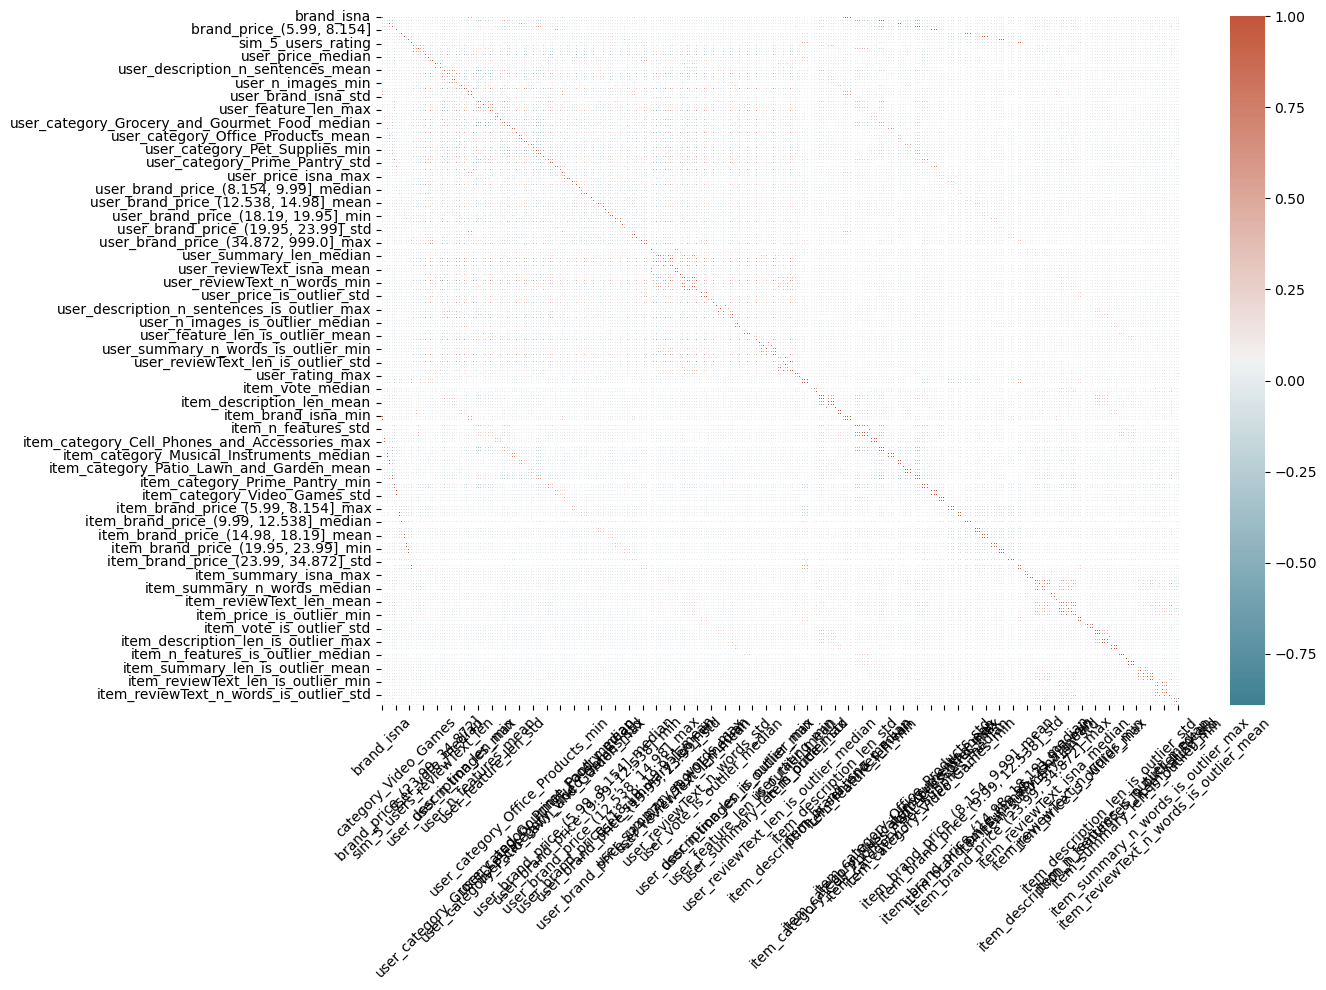

# pearson correlations >= 0.5:


brand_isna  \
brand_isna                                NaN   
category_Grocery_and_Gourmet_Food         NaN   
category_Musical_Instruments              NaN   
category_Office_Products                  NaN   
category_Patio_Lawn_and_Garden            NaN   
...                                       ...   
item_rating_min                           NaN   
item_rating_mean                          NaN   
item_rating_median                        NaN   
item_rating_max                           NaN   
item_rating_std                           NaN   

                                   category_Grocery_and_Gourmet_Food  \
brand_isna                                                       NaN   
category_Grocery_and_Gourmet_Food                                NaN   
category_Musical_Instruments                                     NaN   
category_Office_Products                                         NaN   
category_Patio_Lawn_and_Garden                                   NaN   
...                                                              ...   
item_rating_min                                                  NaN   
item_rating_mean                                                 NaN   
item_rating_median                                               NaN   
item_rating_max                                                  NaN   
item_rating_std                                                  NaN   

                                   category_Musical_Instruments  \
brand_isna                                                  NaN   
category_Grocery_and_Gourmet_Food                           NaN   
category_Musical_Instruments                                NaN   
category_Office_Products                                    NaN   
category_Patio_Lawn_and_Garden                              NaN   
...                                                         ...   
item_rating_min                                             NaN   
item_rating_mean                                            NaN   
item_rating_median                                          NaN   
item_rating_max                                             NaN   
item_rating_std                                             NaN   

                                   category_Office_Products  \
brand_isna                                              NaN   
category_Grocery_and_Gourmet_Food                       NaN   
category_Musical_Instruments                            NaN   
category_Office_Products                                NaN   
category_Patio_Lawn_and_Garden                          NaN   
...                                                     ...   
item_rating_min                                         NaN   
item_rating_mean                                        NaN   
item_rating_median                                      NaN   
item_rating_max                                         NaN   
item_rating_std                                         NaN   

                                   category_Patio_Lawn_and_Garden  \
brand_isna                                                    NaN   
category_Grocery_and_Gourmet_Food                             NaN   
category_Musical_Instruments                                  NaN   
category_Office_Products                                      NaN   
category_Patio_Lawn_and_Garden                                NaN   
...                                                           ...   
item_rating_min                                               NaN   
item_rating_mean                                              NaN   
item_rating_median                                            NaN   
item_rating_max                                               NaN   
item_rating_std                                               NaN   

                                   category_Pet_Supplies  \
brand_isna                                           NaN   
category_Grocery_and_Gourmet_Food                    NaN   
category_M

In [480]:
corr_features = get_correlation_stats(train, method='pearson', strong_corr_val = 0.5, figsize=(14,10), annot=False)
corr_features

#### # Drop features that are almost perfect multicollinear (corr over 0.9)

In [481]:
corr_features_to_drop = corr_features.drop(columns=target, errors='ignore')

In [482]:
# Identify highly correlated features
to_drop = set()
for i in range(len(corr_features_to_drop.columns)):
    for j in range(i+1, len(corr_features.columns)):
        if abs(corr_features.iloc[i, j]) > 0.9: 
            colname = corr_features.columns[i]
            to_drop.add(colname)


# Drop identified features from the original DataFrame
train = train.drop(columns=to_drop)
val = val.drop(columns=to_drop)
test = test.drop(columns=to_drop)
train.shape

(135923, 386)

# pearson correlations:


brand_isna  \
brand_isna                              1.000000   
category_Cell_Phones_and_Accessories   -0.016123   
category_Musical_Instruments           -0.011434   
category_Patio_Lawn_and_Garden         -0.010713   
category_Pet_Supplies                  -0.050684   
...                                          ...   
item_rating_mean                       -0.000253   
item_rating_median                      0.007348   
item_rating_max                        -0.002330   
item_rating_std                         0.012401   
rating                                 -0.000125   

                                      category_Cell_Phones_and_Accessories  \
brand_isna                                                       -0.016123   
category_Cell_Phones_and_Accessories                              1.000000   
category_Musical_Instruments                                     -0.034715   
category_Patio_Lawn_and_Garden                                   -0.069269   
category_Pet_Supplies                                            -0.196698   
...                                                                    ...   
item_rating_mean                                                 -0.030839   
item_rating_median                                               -0.048448   
item_rating_max                                                  -0.044321   
item_rating_std                                                  -0.000886   
rating                                                           -0.015163   

                                      category_Musical_Instruments  \
brand_isna                                               -0.011434   
category_Cell_Phones_and_Accessories                     -0.034715   
category_Musical_Instruments                              1.000000   
category_Patio_Lawn_and_Garden                           -0.049125   
category_Pet_Supplies                                    -0.139497   
...                                                            ...   
item_rating_mean                                          0.044242   
item_rating_median                                        0.004694   
item_rating_max                                          -0.008112   
item_rating_std                                          -0.063999   
rating                                                    0.021753   

                                      category_Patio_Lawn_and_Garden  \
brand_isna                                                 -0.010713   
category_Cell_Phones_and_Accessories                       -0.069269   
category_Musical_Instruments                               -0.049125   
category_Patio_Lawn_and_Garden                              1.000000   
category_Pet_Supplies                                      -0.278344   
...                                                              ...   
item_rating_mean                                           -0.012971   
item_rating_median                                         -0.068349   
item_rating_max                                            -0.046084   
item_rating_std                                            -0.052326   
rating                                                     -0.006377   

                                      category_Pet_Supplies  \
brand_isna                                        -0.050684   
category_Cell_Phones_and_Accessories              -0.196698   
category_Musical_Instruments                      -0.139497   
category_Patio_Lawn_and_Garden                    -0.278344   
category_Pet_Supplies                              1.000000   
...                                                     ...   
item_rating_mean                                  -0.153322   
item_rating_median                                -0.002376   
item_rating_max                                    0.034253   
item_rating_std                                    0.230088   
rating                                            -0.075386   

             

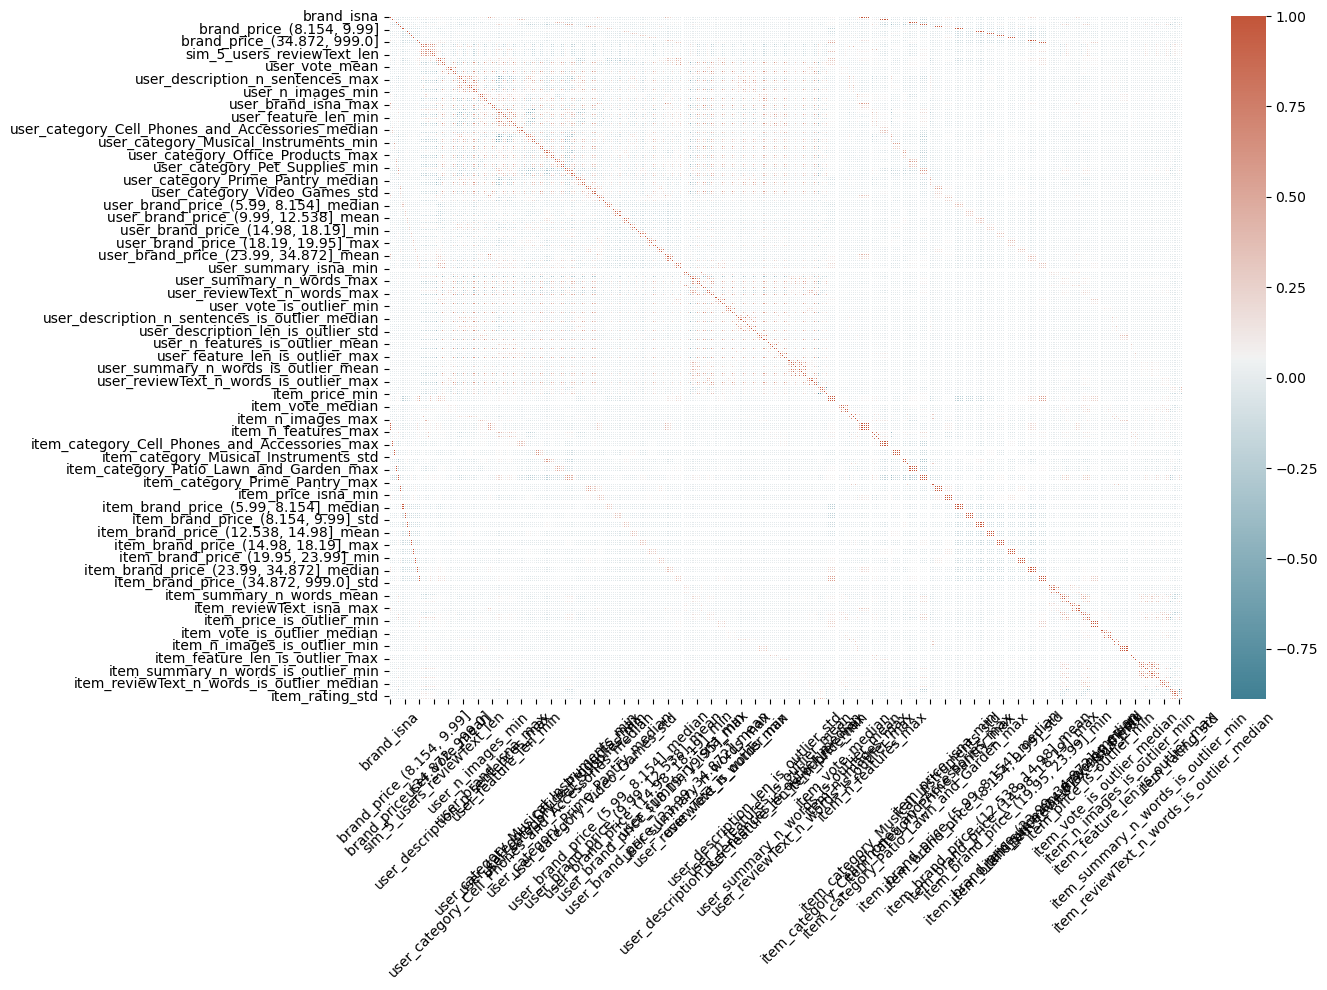

# pearson correlations >= 0.5:


brand_isna  category_Musical_Instruments  \
brand_isna                             NaN                           NaN   
category_Musical_Instruments           NaN                           NaN   
category_Patio_Lawn_and_Garden         NaN                           NaN   
category_Pet_Supplies                  NaN                           NaN   
category_Video_Games                   NaN                           NaN   
...                                    ...                           ...   
item_rating_min                        NaN                           NaN   
item_rating_mean                       NaN                           NaN   
item_rating_median                     NaN                           NaN   
item_rating_max                        NaN                           NaN   
item_rating_std                        NaN                           NaN   

                                category_Patio_Lawn_and_Garden  \
brand_isna                                                 NaN   
category_Musical_Instruments                               NaN   
category_Patio_Lawn_and_Garden                             NaN   
category_Pet_Supplies                                      NaN   
category_Video_Games                                       NaN   
...                                                        ...   
item_rating_min                                            NaN   
item_rating_mean                                           NaN   
item_rating_median                                         NaN   
item_rating_max                                            NaN   
item_rating_std                                            NaN   

                                category_Pet_Supplies  category_Video_Games  \
brand_isna                                        NaN                   NaN   
category_Musical_Instruments                      NaN                   NaN   
category_Patio_Lawn_and_Garden                    NaN                   NaN   
category_Pet_Supplies                             NaN                   NaN   
category_Video_Games                              NaN                   NaN   
...                                               ...                   ...   
item_rating_min                                   NaN                   NaN   
item_rating_mean                                  NaN                   NaN   
item_rating_median                                NaN                   NaN   
item_rating_max                                   NaN                   NaN   
item_rating_std                                   NaN                   NaN   

                                brand_price_(34.872, 999.0]  \
brand_isna                                              NaN   
category_Musical_Instruments                            NaN   
category_Patio_Lawn_and_Garden                          NaN   
category_Pet_Supplies                                   NaN   
category_Video_Games                                    NaN   
...                                                     ...   
item_rating_min                                         NaN   
item_rating_mean                                        NaN   
item_rating_median                                      NaN   
item_rating_max                                         NaN   
item_rating_std                                         NaN   

                                sim_5_users_rating  \
brand_isna                                     NaN   
category_Musical_Instruments                   NaN   
category_Patio_Lawn_and_Garden                 NaN   
category_Pet_Supplies                          NaN   
category_Video_Games                           NaN   
...                                            ...   
item_rating_min                                NaN   
item_rating_mean                               NaN   
item_rating_median                             NaN   
item_rating_max                                NaN   
item_rating_std           

In [483]:
corr_features = get_correlation_stats(train, method='pearson', strong_corr_val = 0.5, figsize=(14,10), annot=False)
corr_features

In [484]:
corr_features[target] if target in corr_features else ""

''

In [485]:
train.shape, val.shape, test.shape

((135923, 386), (23831, 386), (24582, 386))

## Spearman - "rank pearson" - non-linear correlation between two continuous or ordinal variables

In [486]:
#corr_features = get_correlation_stats(X_train, method='spearman', strong_corr_val=0.5, figsize=(14,10), annot=False)
#corr_features

In [487]:
#corr_features[target] if target in corr_features else ""

## Kendall - concordant pairs - non-linear correlation between two ordinal variables

In [488]:
#corr_features = get_correlation_stats(X_train, method='kendall', strong_corr_val=0.4, figsize=(14,10), annot=False)
#corr_features

In [489]:
#corr_features[target] if target in corr_features else ""

## # Only statistics on user and item from rating have strong correlation to target. perhaps we need feature combinations, new features (user startistics, item statistics, sentiment) or a different approach - a collaborative filtering recommender system

In [490]:
# ## Test if train statistics are different then val and test statistics
# trains_dict_to_test = {'val': val, 'test': test}
# train_val_outlier_means_test = test_if_features_statistically_different(train, trains_dict_to_test, alpha=alpha)
# print('\n# Test if train, validation and test sets means are statisically not different:\n',
#       train_val_outlier_means_test)

In [491]:
#sum(train_val_outlier_means_test['val mean is the same with 99% significance']==True)

In [492]:
#sum(train_val_outlier_means_test['val mean is the same with 99% significance']==False)

In [493]:
#sum(train_val_outlier_means_test['test mean is the same with 99% significance']==True)

In [494]:
#sum(train_val_outlier_means_test['test mean is the same with 99% significance']==False)

## # about half the features have different distribution for train and test. this might cause bias in predictions, consider removing those

# Normalize dataset

In [495]:
features = train.drop(columns=target).describe().columns.tolist()
len(features), features 

(379,
 ['brand_isna',
  'category_Cell_Phones_and_Accessories',
  'category_Musical_Instruments',
  'category_Patio_Lawn_and_Garden',
  'category_Pet_Supplies',
  'category_Video_Games',
  'brand_price_(5.99, 8.154]',
  'brand_price_(8.154, 9.99]',
  'brand_price_(9.99, 12.538]',
  'brand_price_(12.538, 14.98]',
  'brand_price_(14.98, 18.19]',
  'brand_price_(18.19, 19.95]',
  'brand_price_(19.95, 23.99]',
  'brand_price_(23.99, 34.872]',
  'brand_price_(34.872, 999.0]',
  'sim_5_users_rating',
  'sim_5_users_description_len',
  'sim_5_users_n_images',
  'sim_5_users_feature_len',
  'sim_5_users_price',
  'sim_5_users_summary_len',
  'sim_5_users_reviewText_len',
  'user_price_min',
  'user_price_mean',
  'user_price_median',
  'user_price_max',
  'user_price_std',
  'user_vote_min',
  'user_vote_mean',
  'user_vote_median',
  'user_vote_max',
  'user_vote_std',
  'user_description_n_sentences_min',
  'user_description_n_sentences_mean',
  'user_description_n_sentences_median',
  'user

In [496]:
[col for col in features if 'sim' in col]

['sim_5_users_rating',
 'sim_5_users_description_len',
 'sim_5_users_n_images',
 'sim_5_users_feature_len',
 'sim_5_users_price',
 'sim_5_users_summary_len',
 'sim_5_users_reviewText_len']

In [497]:
X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

In [498]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[features])

# Transform the datasets
X_train_scaled = scaler.transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])
X_test_scaled = scaler.transform(X_test[features])

In [499]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = features

X_val_scaled = pd.DataFrame(X_val_scaled)
X_val_scaled.columns = features

X_test_scaled = pd.DataFrame(X_test_scaled)

X_test_scaled.columns = features

X_train_scaled

brand_isna  category_Cell_Phones_and_Accessories  \
0        -0.072873                             -0.221247   
1        -0.072873                             -0.221247   
2        -0.072873                             -0.221247   
3        -0.072873                             -0.221247   
4        -0.072873                             -0.221247   
...            ...                                   ...   
135918   -0.072873                             -0.221247   
135919   -0.072873                             -0.221247   
135920   -0.072873                             -0.221247   
135921   -0.072873                             -0.221247   
135922   -0.072873                             -0.221247   

        category_Musical_Instruments  category_Patio_Lawn_and_Garden  \
0                          -0.156907                       -0.313084   
1                          -0.156907                       -0.313084   
2                          -0.156907                       -0.313084   
3                          -0.156907                       -0.313084   
4                          -0.156907                       -0.313084   
...                              ...                             ...   
135918                     -0.156907                       -0.313084   
135919                     -0.156907                       -0.313084   
135920                     -0.156907                       -0.313084   
135921                     -0.156907                       -0.313084   
135922                     -0.156907                       -0.313084   

        category_Pet_Supplies  category_Video_Games  \
0                    1.124809             -0.105064   
1                    1.124809             -0.105064   
2                    1.124809             -0.105064   
3                    1.124809             -0.105064   
4                    1.124809             -0.105064   
...                       ...                   ...   
135918              -0.889040             -0.105064   
135919              -0.889040             -0.105064   
135920               1.124809             -0.105064   
135921               1.124809             -0.105064   
135922               1.124809             -0.105064   

        brand_price_(5.99, 8.154]  brand_price_(8.154, 9.99]  \
0                       -0.334622                  -0.361985   
1                       -0.334622                  -0.361985   
2                       -0.334622                  -0.361985   
3                        2.988446                  -0.361985   
4                       -0.334622                  -0.361985   
...                           ...                        ...   
135918                  -0.334622                  -0.361985   
135919                  -0.334622                   2.762549   
135920                  -0.334622                  -0.361985   
135921                  -0.334622                  -0.361985   
135922                  -0.334622                  -0.361985   

        brand_price_(9.99, 12.538]  brand_price_(12.538, 14.98]  \
0                        -0.359562                     2.609315   
1                        -0.359562                     2.609315   
2                        -0.359562                     2.609315   
3                        -0.359562                    -0.383242   
4                        -0.359562                    -0.383242   
...                            ...                          ...   
135918                   -0.359562                    -0.383242   
135919                   -0.359562                    -0.383242   
135920                   -0.359562                     2.609315   
135921                   -0.359562                    -0.383242   
135922                   -0.359562                    -0.383242   

        brand_price_(14.98, 18.19]  brand_price_(18.19, 19.95]  \
0                        -0.395210                   -0.275488   
1                        -0.395210                   -0

In [500]:
X_train_scaled.agg(['mean','std']).round(2)

brand_isna  category_Cell_Phones_and_Accessories  \
mean        -0.0                                  -0.0   
std          1.0                                   1.0   

      category_Musical_Instruments  category_Patio_Lawn_and_Garden  \
mean                           0.0                             0.0   
std                            1.0                             1.0   

      category_Pet_Supplies  category_Video_Games  brand_price_(5.99, 8.154]  \
mean                   -0.0                  -0.0                        0.0   
std                     1.0                   1.0                        1.0   

      brand_price_(8.154, 9.99]  brand_price_(9.99, 12.538]  \
mean                        0.0                        -0.0   
std                         1.0                         1.0   

      brand_price_(12.538, 14.98]  brand_price_(14.98, 18.19]  \
mean                         -0.0                         0.0   
std                           1.0                         1.0   

      brand_price_(18.19, 19.95]  brand_price_(19.95, 23.99]  \
mean                        -0.0                        -0.0   
std                          1.0                         1.0   

      brand_price_(23.99, 34.872]  brand_price_(34.872, 999.0]  \
mean                          0.0                         -0.0   
std                           1.0                          1.0   

      sim_5_users_rating  sim_5_users_description_len  sim_5_users_n_images  \
mean                 0.0                         -0.0                   0.0   
std                  1.0                          1.0                   1.0   

      sim_5_users_feature_len  sim_5_users_price  sim_5_users_summary_len  \
mean                      0.0                0.0                      0.0   
std                       1.0                1.0                      1.0   

      sim_5_users_reviewText_len  user_price_min  user_price_mean  \
mean                        -0.0            -0.0              0.0   
std                          1.0             1.0              1.0   

      user_price_median  user_price_max  user_price_std  user_vote_min  \
mean               -0.0             0.0            -0.0            0.0   
std                 1.0             1.0             1.0            1.0   

      user_vote_mean  user_vote_median  user_vote_max  user_vote_std  \
mean            -0.0              -0.0            0.0           -0.0   
std              1.0               1.0            1.0            1.0   

      user_description_n_sentences_min  user_description_n_sentences_mean  \
mean                              -0.0                               -0.0   
std                                1.0                                1.0   

      user_description_n_sentences_median  user_description_n_sentences_max  \
mean                                 -0.0                               0.0   
std                                   1.0                               1.0   

      user_description_n_sentences_std  user_description_len_min  \
mean                              -0.0                       0.0   
std                                1.0                       1.0   

      user_description_len_mean  user_description_len_median  \
mean                        0.0                         -0.0   
std                         1.0                          1.0   

      user_description_len_max  user_description_len_std  user_n_images_min  \
mean                      -0.0                       0.0               -0.0   
std                        1.0                       1.0                1.0   

      user_n_images_mean  user_n_images_median  user_n_images_max  \
mean                 0.0                  -0.0               -0.0   
std                  1.0                   1.0                1.0   

      user_n_images_std  user_brand_isna_min  user_brand_isna_median  \
mean               -0.0                 -0.0                     0.0   
std                 1.0  

# final preprocessing

In [501]:
# # fix columns names
# X_train = replace_columns_spaces_with_underscores(X_train)
# X_val = replace_columns_spaces_with_underscores(X_val)
# X_test = replace_columns_spaces_with_underscores(X_test)
# train_statistics = replace_columns_spaces_with_underscores(train_statistics.T).T

# Modeling

## Basline model - mean rating per user

In [502]:
train = pd.concat([X_train_scaled, y_train], axis=1)
train.index = X_train['userName']

val = pd.concat([X_val_scaled, y_val], axis=1)
val.index = X_val['userName']

test = pd.concat([X_test_scaled, y_test], axis=1)
test.index = X_test['userName']

train[train.index == 'Amazossn Customerccocooper17o']

brand_isna  \
userName                                    
Amazossn Customerccocooper17o   -0.072873   
Amazossn Customerccocooper17o   -0.072873   
Amazossn Customerccocooper17o   -0.072873   
Amazossn Customerccocooper17o   -0.072873   
Amazossn Customerccocooper17o   -0.072873   

                               category_Cell_Phones_and_Accessories  \
userName                                                              
Amazossn Customerccocooper17o                             -0.221247   
Amazossn Customerccocooper17o                             -0.221247   
Amazossn Customerccocooper17o                             -0.221247   
Amazossn Customerccocooper17o                             -0.221247   
Amazossn Customerccocooper17o                             -0.221247   

                               category_Musical_Instruments  \
userName                                                      
Amazossn Customerccocooper17o                     -0.156907   
Amazossn Customerccocooper17o                     -0.156907   
Amazossn Customerccocooper17o                     -0.156907   
Amazossn Customerccocooper17o                     -0.156907   
Amazossn Customerccocooper17o                     -0.156907   

                               category_Patio_Lawn_and_Garden  \
userName                                                        
Amazossn Customerccocooper17o                       -0.313084   
Amazossn Customerccocooper17o                       -0.313084   
Amazossn Customerccocooper17o                       -0.313084   
Amazossn Customerccocooper17o                       -0.313084   
Amazossn Customerccocooper17o                       -0.313084   

                               category_Pet_Supplies  category_Video_Games  \
userName                                                                     
Amazossn Customerccocooper17o               -0.88904             -0.105064   
Amazossn Customerccocooper17o               -0.88904             -0.105064   
Amazossn Customerccocooper17o               -0.88904             -0.105064   
Amazossn Customerccocooper17o               -0.88904             -0.105064   
Amazossn Customerccocooper17o               -0.88904             -0.105064   

                               brand_price_(5.99, 8.154]  \
userName                                                   
Amazossn Customerccocooper17o                  -0.334622   
Amazossn Customerccocooper17o                  -0.334622   
Amazossn Customerccocooper17o                  -0.334622   
Amazossn Customerccocooper17o                  -0.334622   
Amazossn Customerccocooper17o                  -0.334622   

                               brand_price_(8.154, 9.99]  \
userName                                                   
Amazossn Customerccocooper17o                  -0.361985   
Amazossn Customerccocooper17o                  -0.361985   
Amazossn Customerccocooper17o                  -0.361985   
Amazossn Customerccocooper17o                  -0.361985   
Amazossn Customerccocooper17o                  -0.361985   

                               brand_price_(9.99, 12.538]  \
userName                                                    
Amazossn Customerccocooper17o                   -0.359562   
Amazossn Customerccocooper17o                    2.781160   
Amazossn Customerccocooper17o                    2.781160   
Amazossn Customerccocooper17o                   -0.359562   
Amazossn Customerccocooper17o                   -0.359562   

                               brand_price_(12.538, 14.98]  \
userName                                                     
Amazossn Customerccocooper17o                    -0.383242   
Amazossn Customerccocooper17o                    -0.383242   
Amazossn Customerccocooper17o                    -0.383242   
Amazossn Customerccocooper17o                    -0.383242   
Amazossn Customerccocooper17o                    -0.383242   

                               brand_price_(14.98, 18.19]  \
userNa

In [503]:
baseline_pred_dict = train.groupby('userName')[target].mean().to_dict()
baseline_pred_dict

{' Boo': 4.0,
 ' Carol Ann': 4.5,
 ' KT': 4.333333333333333,
 ' Seas the Day ': 5.0,
 '#1 Honest reviewer :)': 4.818181818181818,
 '#1clarkgirl': 5.0,
 '#Blessed': 3.3333333333333335,
 '&#034;Chateau Toro&#034;': 5.0,
 '&#039;El-Choya&#039;': 3.6666666666666665,
 '&amp;#34;Legalady&amp;#34;': 3.4,
 '()': 4.0,
 '-Mimi-': 5.0,
 '.': 4.0,
 '1 poodle lover': 3.75,
 '1000riv': 4.714285714285714,
 '10vfreeman': 4.333333333333333,
 '1STARBUCK1': 4.833333333333333,
 '1VAarcher': 4.428571428571429,
 '1feistymama': 5.0,
 '1nightbird1': 4.0,
 '2 Old Texan&#039;s': 2.3333333333333335,
 '2 meatballz': 5.0,
 '2 normal people': 5.0,
 '2cat mom': 4.5,
 '2tall4u': 5.0,
 '3Gr8KidsDad': 4.714285714285714,
 '3rdGen': 4.0,
 '40dbOverS9': 5.0,
 '454Malibu': 4.0,
 '465alm': 5.0,
 '4real': 3.0,
 '50 something': 4.6,
 '50Bubbles': 5.0,
 '5everyung': 5.0,
 '5kjen': 5.0,
 '62moviefan': 3.5,
 '73roe': 3.6666666666666665,
 '77': 5.0,
 '808': 5.0,
 ':) jlp': 4.75,
 '@Kilmichael': 4.875,
 '@angelaswriter': 5.0,
 '@l

In [504]:
val[~val.index.isin(train.index)]

brand_isna  \
userName                                    
Brat                            -0.072873   
C. Hill                         -0.072873   
D. Coral                        -0.072873   
Divascribe                      -0.072873   
Hanna.w.                        -0.072873   
Hedera Femme                    -0.072873   
Jeff  &amp; Jeff&#039;s Wife    -0.072873   
Joseph91                        -0.072873   
Lonnie                          -0.072873   
Mike braxton                    -0.072873   
S. Rivera                       -0.072873   
Sean Moore                      -0.072873   
Troy S.                         -0.072873   
ez138                           -0.072873   
funbear                         -0.072873   
lisa edwards                    -0.072873   
sb-lynn                         13.722529   
sharlena                        -0.072873   

                               category_Cell_Phones_and_Accessories  \
userName                                                              
Brat                                                      -0.221247   
C. Hill                                                   -0.221247   
D. Coral                                                  -0.221247   
Divascribe                                                -0.221247   
Hanna.w.                                                  -0.221247   
Hedera Femme                                              -0.221247   
Jeff  &amp; Jeff&#039;s Wife                              -0.221247   
Joseph91                                                   4.519825   
Lonnie                                                     4.519825   
Mike braxton                                              -0.221247   
S. Rivera                                                 -0.221247   
Sean Moore                                                -0.221247   
Troy S.                                                   -0.221247   
ez138                                                     -0.221247   
funbear                                                   -0.221247   
lisa edwards                                              -0.221247   
sb-lynn                                                   -0.221247   
sharlena                                                  -0.221247   

                               category_Musical_Instruments  \
userName                                                      
Brat                                              -0.156907   
C. Hill                                           -0.156907   
D. Coral                                          -0.156907   
Divascribe                                        -0.156907   
Hanna.w.                                          -0.156907   
Hedera Femme                                      -0.156907   
Jeff  &amp; Jeff&#039;s Wife                      -0.156907   
Joseph91                                          -0.156907   
Lonnie                                            -0.156907   
Mike braxton                                      -0.156907   
S. Rivera                                         -0.156907   
Sean Moore                                        -0.156907   
Troy S.                                           -0.156907   
ez138                                             -0.156907   
funbear                                           -0.156907   
lisa edwards                                      -0.156907   
sb-lynn                                           -0.156907   
sharlena                                          -0.156907   

                               category_Patio_Lawn_and_Garden  \
userName                                                        
Brat                                                -0.313084   
C. Hill                                             -0.313084   
D. Coral                                            -0.313084   
Divascribe                                          -0.313084   
Hanna.w.                                            -0.313

In [505]:
val.index.nunique()

14004

In [506]:
val[~val.index.isin(train.index)].index.nunique()

18

In [507]:
218/23751

0.009178560902698833

### # drop 0.9% val users (218) that are not in train - so that the comparison of baseline to other models will be fair

In [508]:
val = val[val.index.isin(train.index)]
X_val = X_val[X_val['userName'].isin(val.index)]
X_val.index = val.index

In [509]:
# val_n_ratings = val.groupby('userName').size()
# val_n_ratings.value_counts(normalize=True)

In [510]:
# val0 = val.copy(deep=True)

In [511]:
## drop val users without 5 ratings - we need to test if prediction is good for user's top 5 ratings 

In [512]:
# val = val[val.index.isin(val_n_ratings[val_n_ratings>=5].index)]
# X_val = X_val[X_val.index.isin(val_n_ratings[val_n_ratings>=5].index)]

In [513]:
pred_col = f'{target}_pred_baseline' 
val[f'{target}_pred_baseline'] = val.index.map(baseline_pred_dict)
val[[target, pred_col]]

rating  rating_pred_baseline
userName                                     
 Boo                5.0              4.000000
 Carol Ann          4.0              4.500000
 KT                 5.0              4.333333
 KT                 5.0              4.333333
 KT                 5.0              4.333333
...                 ...                   ...
zensm               5.0              4.875000
zephyr 2            5.0              4.333333
zman                5.0              4.000000
~Susan Atherton     3.0              4.000000
~Susan Atherton     5.0              4.000000

[23813 rows x 2 columns]

In [515]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def get_regression_metrics(the_df, target_col, pred_col, the_metrics_df=None, regression_metrics=None, model_name='baseline'):
    if regression_metrics is None:
        regression_metrics = [mean_absolute_error, max_error, mean_absolute_percentage_error, mean_squared_error, r2_score]
    the_metrics_df = pd.DataFrame() if the_metrics_df is None else the_metrics_df
    the_metrics = {}
    the_metrics['userName'] = the_df.index.nunique()
    the_metrics['item_ids'] = the_df['item_id'].nunique()
    the_metrics[f'mean_{target}'] = the_df[target_col].mean()
    for metric in regression_metrics:
        the_metrics[metric.__name__] = metric(the_df[target_col], the_df[pred_col])
    the_df[f'{pred_col}_error_abs'] = (the_df[target] - the_df[pred_col]).abs()
    bins_error_abs = the_df.groupby(target)[f'{pred_col}_error_abs'].mean().add_prefix(f"{target}_").add_suffix("_error").to_dict()
    the_df = the_df.drop(columns=[f'{pred_col}_error_abs'])
    the_metrics.update(bins_error_abs)
    the_metrics = pd.DataFrame.from_dict(the_metrics, columns=[model_name], orient='index').T
    the_metrics_df = pd.concat([the_metrics_df, the_metrics], axis=0)
    
    
    return the_metrics_df

metrics = pd.DataFrame()
metrics = get_regression_metrics(pd.concat([val, X_val['item_id']], axis=1), target, f'{target}_pred_baseline')
metrics

userName  item_ids  mean_rating  mean_absolute_error  max_error  \
baseline   13986.0   11631.0     4.418721             0.710889        4.0   

          mean_absolute_percentage_error  mean_squared_error  r2_score  \
baseline                         0.29093            1.109061   0.06836   

          rating_1.0_error  rating_2.0_error  rating_3.0_error  \
baseline          2.855163          2.099266          1.202381   

          rating_4.0_error  rating_5.0_error  
baseline           0.43715          0.494565

## Linear regression - worse than baseline, very bad, coefficients are crazy big. we have many features with zero importance, we'll do LASSO next for features selection, we have many features

In [516]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs=-1).fit(train.drop(columns=target), train[target])
reg.score(train.drop(columns=target), train[target])

0.39665431646437455

importance  \
brand_price_(9.99, 12.538]                    1330330085408.875   
category_Musical_Instruments                   406587913517.783   
item_brand_price_(9.99, 12.538]_median        -336786601794.146   
item_brand_price_(9.99, 12.538]_mean          -335339139119.204   
item_brand_price_(9.99, 12.538]_max           -330004718984.522   
...                                                         ...   
item_feature_len_is_outlier_std                           0.000   
item_brand_price_(12.538, 14.98]_std                      0.000   
user_category_Office_Products_min                         0.000   
item_category_Office_Products_std                        -0.000   
user_category_Cell_Phones_and_Accessories_min             0.000   

                                                 importance_abs  
brand_price_(9.99, 12.538]                    1330330085408.875  
category_Musical_Instruments                   406587913517.783  
item_brand_price_(9.99, 12.538]_median         336786601794.146  
item_brand_price_(9.99, 12.538]_mean           335339139119.204  
item_brand_price_(9.99, 12.538]_max            330004718984.522  
...                                                         ...  
item_feature_len_is_outlier_std                           0.000  
item_brand_price_(12.538, 14.98]_std                      0.000  
user_category_Office_Products_min                         0.000  
item_category_Office_Products_std                         0.000  
user_category_Cell_Phones_and_Accessories_min             0.000  

[379 rows x 2 columns]

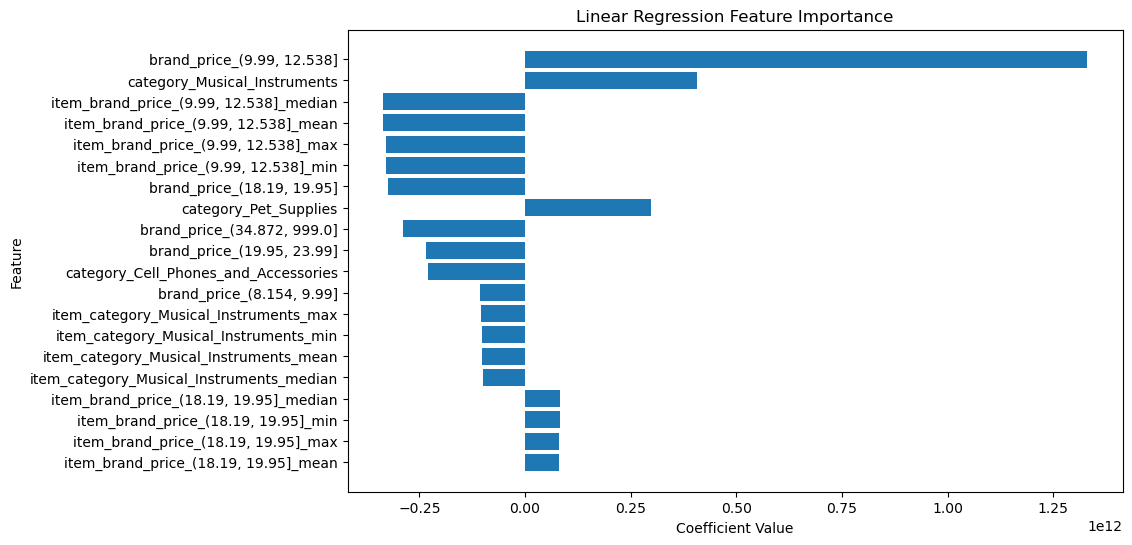

In [517]:
pd.set_option('display.float_format', '{:.3f}'.format)
coefs = reg.coef_
features_importance = pd.DataFrame(coefs, columns=['importance'], index=features).round(3)
features_importance['importance_abs'] = features_importance['importance'].abs()
features_importance = features_importance.sort_values('importance_abs', ascending=False)

import matplotlib.pyplot as plt

# Assuming 'model' is your fitted Linear Regression model and 'feature_names' is a list of feature names
display(features_importance)

# Create a plot
plt.figure(figsize=(10, 6))
plt.barh(features_importance.head(20).index[::-1], features_importance.head(20)[::-1]['importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance')
plt.show()

In [518]:
pred_col = f'{target}_pred_{reg.__str__()}' 
val[pred_col] = reg.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
val[[target]+[col for col in val.columns if 'pred' in col]]

rating  rating_pred_baseline  \
userName                                        
 Boo              5.000                 4.000   
 Carol Ann        4.000                 4.500   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
...                 ...                   ...   
zensm             5.000                 4.875   
zephyr 2          5.000                 4.333   
zman              5.000                 4.000   
~Susan Atherton   3.000                 4.000   
~Susan Atherton   5.000                 4.000   

                 rating_pred_LinearRegression(n_jobs=-1)  
userName                                                  
 Boo                                               3.845  
 Carol Ann                                         4.862  
 KT                                                4.079  
 KT                                                3.978  
 KT                                                4.768  
...                                                  ...  
zensm                                              4.960  
zephyr 2                                           4.057  
zman                                               4.445  
~Susan Atherton                                    4.170  
~Susan Atherton                                    4.017  

[23813 rows x 3 columns]

In [519]:
model_name = reg.__str__()
the_df = pd.concat([val, X_val['item_id']], axis=1) 
target_col = target
the_metrics_df = metrics 
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  mean_rating  \
baseline                    13986.000 11631.000        4.419   
LinearRegression(n_jobs=-1) 13986.000 11631.000        4.419   

                             mean_absolute_error         max_error  \
baseline                                   0.711             4.000   
LinearRegression(n_jobs=-1)      20900643336.316 4777253292447.682   

                             mean_absolute_percentage_error  \
baseline                                              0.291   
LinearRegression(n_jobs=-1)                  6400062533.508   

                                     mean_squared_error  \
baseline                                          1.109   
LinearRegression(n_jobs=-1) 45565258704647285112832.000   

                                                r2_score  rating_1.0_error  \
baseline                                           0.068             2.855   
LinearRegression(n_jobs=-1) -38275999105943248830464.000   40718067012.256   

                             rating_2.0_error  rating_3.0_error  \
baseline                                2.099             1.202   
LinearRegression(n_jobs=-1)   20282049396.576   28292776273.944   

                             rating_4.0_error  rating_5.0_error  
baseline                                0.437             0.495  
LinearRegression(n_jobs=-1)   21361941157.465   18755092900.935

## Linear regression - Lasso - worse than baseline, only one important feature - item_rating_mean. Perhaps need something more comple like RF

In [520]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.5).fit(train.drop(columns=target), train[target])
reg.score(train.drop(columns=target), train[target])

0.03964680134084764

importance  importance_abs
item_rating_mean                              0.047           0.047
brand_isna                                   -0.000           0.000
item_category_Patio_Lawn_and_Garden_min      -0.000           0.000
item_category_Pet_Supplies_std                0.000           0.000
item_category_Pet_Supplies_max               -0.000           0.000
...                                             ...             ...
user_brand_price_(18.19, 19.95]_mean          0.000           0.000
user_brand_price_(18.19, 19.95]_min           0.000           0.000
user_brand_price_(14.98, 18.19]_std          -0.000           0.000
user_brand_price_(14.98, 18.19]_median       -0.000           0.000
item_rating_std                              -0.000           0.000

[379 rows x 2 columns]

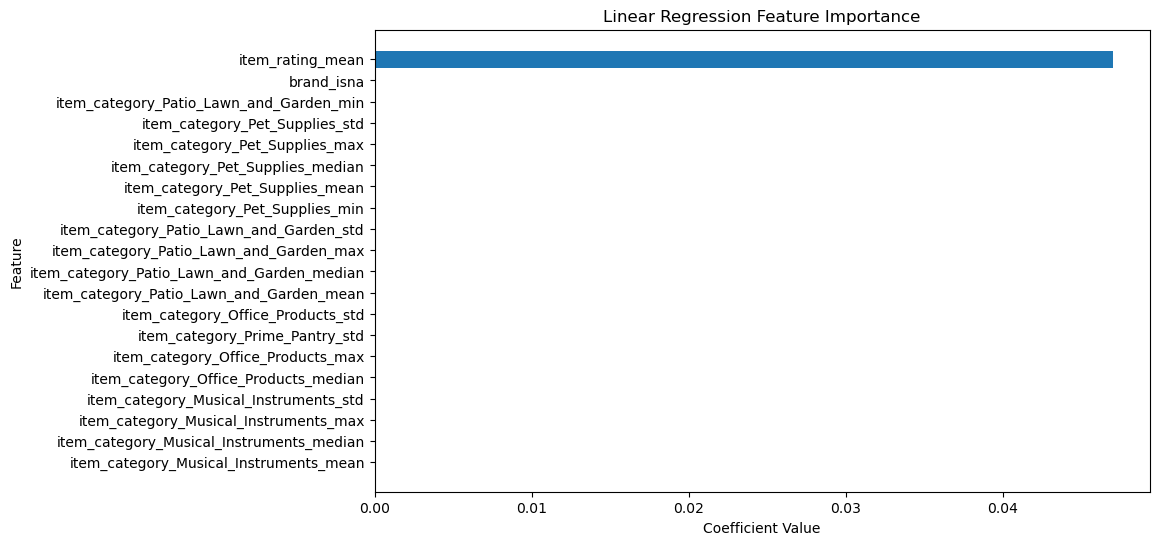

In [521]:
pd.set_option('display.float_format', '{:.3f}'.format)
coefs = reg.coef_
features_importance = pd.DataFrame(coefs, columns=['importance'], index=features).round(3)
features_importance['importance_abs'] = features_importance['importance'].abs()
features_importance = features_importance.sort_values('importance_abs', ascending=False)

import matplotlib.pyplot as plt

# Assuming 'model' is your fitted Linear Regression model and 'feature_names' is a list of feature names
display(features_importance)

# Create a plot
plt.figure(figsize=(10, 6))
plt.barh(features_importance.head(20).index[::-1], features_importance.head(20)[::-1]['importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance')
plt.show()

In [522]:
pred_col = f'{target}_pred_{reg.__str__()}' 
val[pred_col] = reg.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
val[[target]+[col for col in val.columns if 'pred' in col]]

rating  rating_pred_baseline  \
userName                                        
 Boo              5.000                 4.000   
 Carol Ann        4.000                 4.500   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
...                 ...                   ...   
zensm             5.000                 4.875   
zephyr 2          5.000                 4.333   
zman              5.000                 4.000   
~Susan Atherton   3.000                 4.000   
~Susan Atherton   5.000                 4.000   

                 rating_pred_LinearRegression(n_jobs=-1)  \
userName                                                   
 Boo                                               3.845   
 Carol Ann                                         4.862   
 KT                                                4.079   
 KT                                                3.978   
 KT                                                4.768   
...                                                  ...   
zensm                                              4.960   
zephyr 2                                           4.057   
zman                                               4.445   
~Susan Atherton                                    4.170   
~Susan Atherton                                    4.017   

                 rating_pred_Lasso(alpha=0.5)  
userName                                       
 Boo                                    4.388  
 Carol Ann                              4.445  
 KT                                     4.387  
 KT                                     4.382  
 KT                                     4.422  
...                                       ...  
zensm                                   4.412  
zephyr 2                                4.410  
zman                                    4.445  
~Susan Atherton                         4.402  
~Susan Atherton                         4.396  

[23813 rows x 4 columns]

In [523]:
model_name = reg.__str__()
the_df = pd.concat([val, X_val['item_id']], axis=1) 
target_col = target
the_metrics_df = metrics 
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  mean_rating  \
baseline                    13986.000 11631.000        4.419   
LinearRegression(n_jobs=-1) 13986.000 11631.000        4.419   
Lasso(alpha=0.5)            13986.000 11631.000        4.419   

                             mean_absolute_error         max_error  \
baseline                                   0.711             4.000   
LinearRegression(n_jobs=-1)      20900643336.316 4777253292447.682   
Lasso(alpha=0.5)                           0.831             3.445   

                             mean_absolute_percentage_error  \
baseline                                              0.291   
LinearRegression(n_jobs=-1)                  6400062533.508   
Lasso(alpha=0.5)                                      0.338   

                                     mean_squared_error  \
baseline                                          1.109   
LinearRegression(n_jobs=-1) 45565258704647285112832.000   
Lasso(alpha=0.5)                                  1.175   

                                                r2_score  rating_1.0_error  \
baseline                                           0.068             2.855   
LinearRegression(n_jobs=-1) -38275999105943248830464.000   40718067012.256   
Lasso(alpha=0.5)                                   0.013             3.352   

                             rating_2.0_error  rating_3.0_error  \
baseline                                2.099             1.202   
LinearRegression(n_jobs=-1)   20282049396.576   28292776273.944   
Lasso(alpha=0.5)                        2.361             1.370   

                             rating_4.0_error  rating_5.0_error  
baseline                                0.437             0.495  
LinearRegression(n_jobs=-1)   21361941157.465   18755092900.935  
Lasso(alpha=0.5)                        0.382             0.610

## Random Forest Regressor - for max_depth=2 still worse than baseline, but 3 important features. 

In [545]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0, n_jobs=-1)
regr.fit(train.drop(columns=target), train[target])
regr.score(train.drop(columns=target), train[target])

0.26636178609318306

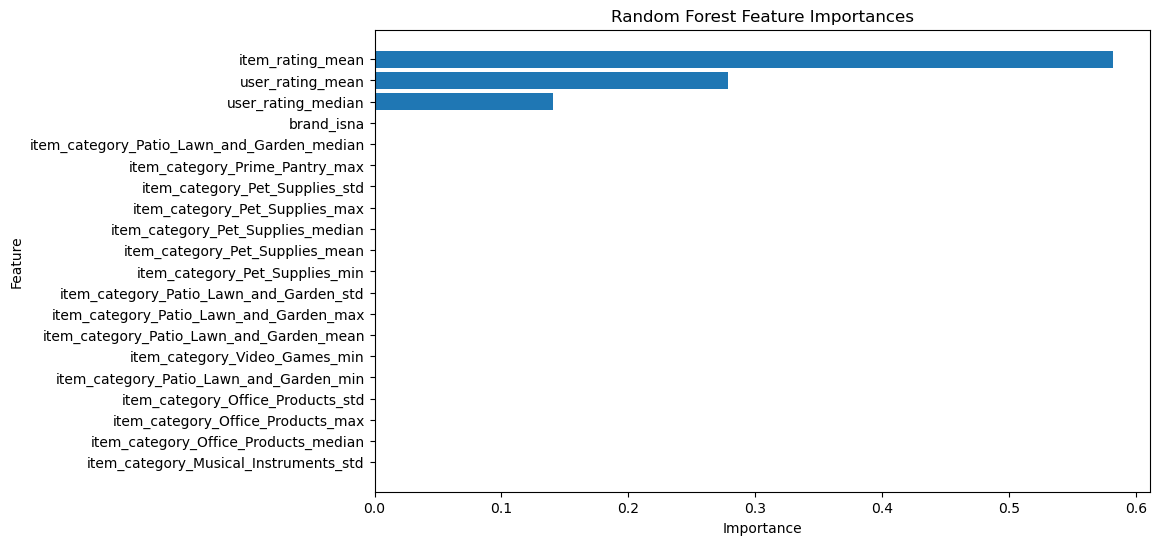

In [525]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# and 'feature_names' is a list of your feature names

# Get feature importances
importances = regr.feature_importances_

# Create a DataFrame for easier handling
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [526]:
pred_col = f'{target}_pred_{regr.__str__()}'
val[pred_col] = regr.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
val[[target]+[col for col in val.columns if 'pred' in col]]

rating  rating_pred_baseline  \
userName                                        
 Boo              5.000                 4.000   
 Carol Ann        4.000                 4.500   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
...                 ...                   ...   
zensm             5.000                 4.875   
zephyr 2          5.000                 4.333   
zman              5.000                 4.000   
~Susan Atherton   3.000                 4.000   
~Susan Atherton   5.000                 4.000   

                 rating_pred_LinearRegression(n_jobs=-1)  \
userName                                                   
 Boo                                               3.845   
 Carol Ann                                         4.862   
 KT                                                4.079   
 KT                                                3.978   
 KT                                                4.768   
...                                                  ...   
zensm                                              4.960   
zephyr 2                                           4.057   
zman                                               4.445   
~Susan Atherton                                    4.170   
~Susan Atherton                                    4.017   

                 rating_pred_Lasso(alpha=0.5)  \
userName                                        
 Boo                                    4.388   
 Carol Ann                              4.445   
 KT                                     4.387   
 KT                                     4.382   
 KT                                     4.422   
...                                       ...   
zensm                                   4.412   
zephyr 2                                4.410   
zman                                    4.445   
~Susan Atherton                         4.402   
~Susan Atherton                         4.396   

                 rating_pred_RandomForestRegressor(max_depth=2, n_jobs=-1, random_state=0)  
userName                                                                                    
 Boo                                                         3.948                          
 Carol Ann                                                   4.737                          
 KT                                                          4.737                          
 KT                                                          4.737                          
 KT                                                          4.737                          
...                                                            ...                          
zensm                                                        4.737                          
zephyr 2                                                     4.737                          
zman                                                         3.948                          
~Susan Atherton                                              3.948                          
~Susan Atherton                                              3.948                          

[23813 rows x 5 columns]

In [527]:
model_name = regr.__str__()
the_df = pd.concat([val, X_val['item_id']], axis=1)
target_col = target
the_metrics_df = metrics
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  \
baseline                                           13986.000 11631.000   
LinearRegression(n_jobs=-1)                        13986.000 11631.000   
Lasso(alpha=0.5)                                   13986.000 11631.000   
RandomForestRegressor(max_depth=2, n_jobs=-1, r... 13986.000 11631.000   

                                                    mean_rating  \
baseline                                                  4.419   
LinearRegression(n_jobs=-1)                               4.419   
Lasso(alpha=0.5)                                          4.419   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...        4.419   

                                                    mean_absolute_error  \
baseline                                                          0.711   
LinearRegression(n_jobs=-1)                             20900643336.316   
Lasso(alpha=0.5)                                                  0.831   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                0.738   

                                                           max_error  \
baseline                                                       4.000   
LinearRegression(n_jobs=-1)                        4777253292447.682   
Lasso(alpha=0.5)                                               3.445   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             3.737   

                                                    mean_absolute_percentage_error  \
baseline                                                                     0.291   
LinearRegression(n_jobs=-1)                                         6400062533.508   
Lasso(alpha=0.5)                                                             0.338   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                           0.303   

                                                            mean_squared_error  \
baseline                                                                 1.109   
LinearRegression(n_jobs=-1)                        45565258704647285112832.000   
Lasso(alpha=0.5)                                                         1.175   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                       1.140   

                                                                       r2_score  \
baseline                                                                  0.068   
LinearRegression(n_jobs=-1)                        -38275999105943248830464.000   
Lasso(alpha=0.5)                                                          0.013   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                        0.042   

                                                    rating_1.0_error  \
baseline                                                       2.855   
LinearRegression(n_jobs=-1)                          40718067012.256   
Lasso(alpha=0.5)                                               3.352   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             3.032   

                                                    rating_2.0_error  \
baseline                                                       2.099   
LinearRegression(n_jobs=-1)                          20282049396.576   
Lasso(alpha=0.5)                                               2.361   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             2.092   

                                                    rating_3.0_error  \
baseline                                                       1.202   
LinearRegression(n_jobs=-1)                          28292776273.944   
Lasso(alpha=0.5)                                               1.370   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             1.160   

                                                    rating_4.0_error  \
baseline                                                       0.437   
LinearRegression(n_jobs=-1)                          21361941157.465   
Lasso(alpha=0.5)                                   

In [ ]:
## For max_depth=None, better than baseline on MAE and lower bins, a lot of important features - but might overfit?

In [544]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_jobs=-1)
regr.fit(train.drop(columns=target), train[target])
regr.score(train.drop(columns=target), train[target])

KeyboardInterrupt: 

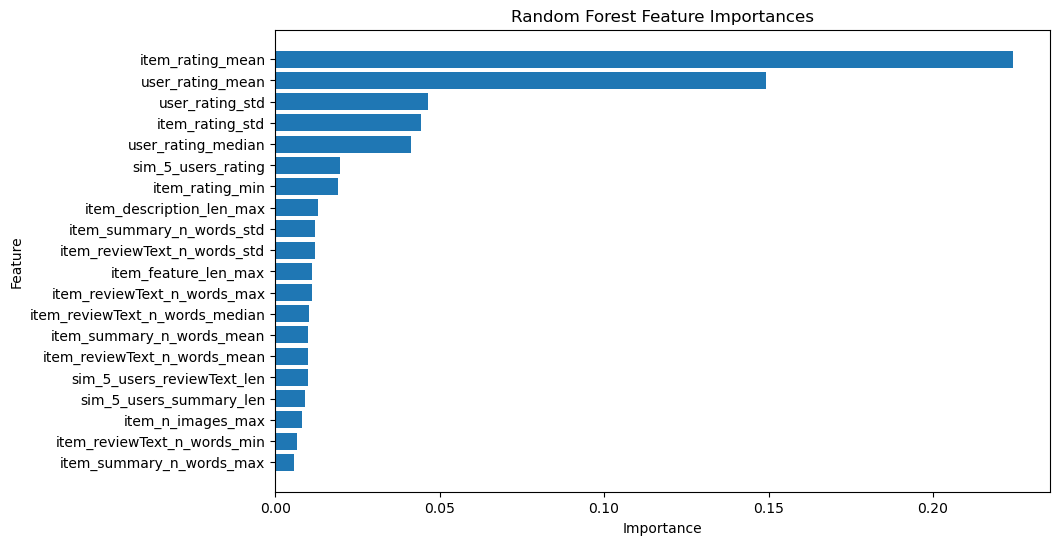

In [529]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# and 'feature_names' is a list of your feature names

# Get feature importances
importances = regr.feature_importances_

# Create a DataFrame for easier handling
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [530]:
pred_col = f'{target}_pred_{regr.__str__()}'
val[pred_col] = regr.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
val[[target]+[col for col in val.columns if 'pred' in col]]

rating  rating_pred_baseline  \
userName                                        
 Boo              5.000                 4.000   
 Carol Ann        4.000                 4.500   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
...                 ...                   ...   
zensm             5.000                 4.875   
zephyr 2          5.000                 4.333   
zman              5.000                 4.000   
~Susan Atherton   3.000                 4.000   
~Susan Atherton   5.000                 4.000   

                 rating_pred_LinearRegression(n_jobs=-1)  \
userName                                                   
 Boo                                               3.845   
 Carol Ann                                         4.862   
 KT                                                4.079   
 KT                                                3.978   
 KT                                                4.768   
...                                                  ...   
zensm                                              4.960   
zephyr 2                                           4.057   
zman                                               4.445   
~Susan Atherton                                    4.170   
~Susan Atherton                                    4.017   

                 rating_pred_Lasso(alpha=0.5)  \
userName                                        
 Boo                                    4.388   
 Carol Ann                              4.445   
 KT                                     4.387   
 KT                                     4.382   
 KT                                     4.422   
...                                       ...   
zensm                                   4.412   
zephyr 2                                4.410   
zman                                    4.445   
~Susan Atherton                         4.402   
~Susan Atherton                         4.396   

                 rating_pred_RandomForestRegressor(max_depth=2, n_jobs=-1, random_state=0)  \
userName                                                                                     
 Boo                                                         3.948                           
 Carol Ann                                                   4.737                           
 KT                                                          4.737                           
 KT                                                          4.737                           
 KT                                                          4.737                           
...                                                            ...                           
zensm                                                        4.737                           
zephyr 2                                                     4.737                           
zman                                                         3.948                           
~Susan Atherton                                              3.948                           
~Susan Atherton                                              3.948                           

                 rating_pred_RandomForestRegressor(n_jobs=-1, random_state=0)  
userName                                                                       
 Boo                                                         3.870             
 Carol Ann                                                   5.000             
 KT                                                          4.120             
 KT                                                          3.420             
 KT                                                          4.890             
...                                                            ...             
zensm                                                        4.970             
zephyr 2         

In [531]:
model_name = regr.__str__()
the_df = pd.concat([val, X_val['item_id']], axis=1)
target_col = target
the_metrics_df = metrics
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  \
baseline                                           13986.000 11631.000   
LinearRegression(n_jobs=-1)                        13986.000 11631.000   
Lasso(alpha=0.5)                                   13986.000 11631.000   
RandomForestRegressor(max_depth=2, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   

                                                    mean_rating  \
baseline                                                  4.419   
LinearRegression(n_jobs=-1)                               4.419   
Lasso(alpha=0.5)                                          4.419   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...        4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   

                                                    mean_absolute_error  \
baseline                                                          0.711   
LinearRegression(n_jobs=-1)                             20900643336.316   
Lasso(alpha=0.5)                                                  0.831   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                0.738   
RandomForestRegressor(n_jobs=-1, random_state=0)                  0.686   

                                                           max_error  \
baseline                                                       4.000   
LinearRegression(n_jobs=-1)                        4777253292447.682   
Lasso(alpha=0.5)                                               3.445   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             3.737   
RandomForestRegressor(n_jobs=-1, random_state=0)               4.000   

                                                    mean_absolute_percentage_error  \
baseline                                                                     0.291   
LinearRegression(n_jobs=-1)                                         6400062533.508   
Lasso(alpha=0.5)                                                             0.338   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                           0.303   
RandomForestRegressor(n_jobs=-1, random_state=0)                             0.258   

                                                            mean_squared_error  \
baseline                                                                 1.109   
LinearRegression(n_jobs=-1)                        45565258704647285112832.000   
Lasso(alpha=0.5)                                                         1.175   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                       1.140   
RandomForestRegressor(n_jobs=-1, random_state=0)                         1.309   

                                                                       r2_score  \
baseline                                                                  0.068   
LinearRegression(n_jobs=-1)                        -38275999105943248830464.000   
Lasso(alpha=0.5)                                                          0.013   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                        0.042   
RandomForestRegressor(n_jobs=-1, random_state=0)                         -0.099   

                                                    rating_1.0_error  \
baseline                                                       2.855   
LinearRegression(n_jobs=-1)                          40718067012.256   
Lasso(alpha=0.5)                                               3.352   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             3.032   
RandomForestRegressor(n_jobs=-1, random_state=0)               2.268   

                                                    rating_2.0_error  \
baseline                                                       2.099   
LinearRegression(n_jobs=-1)                          20282049396.576   
Lasso(alpha=0.5)                                               2.361   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             2.092   
RandomForestRegres

## LightGBM - many important features, bad predictions. default hyperparameters are overfitting. We'll do a grid search

In [532]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()
old_columns = train.columns.copy(deep=True)
# Replace unsupported characters with an underscore or remove them
train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in train.columns]

lgbm.fit(train.drop(columns=target), train[target])
lgbm.score(train.drop(columns=target), train[target])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28540
[LightGBM] [Info] Number of data points in the train set: 135923, number of used features: 343
[LightGBM] [Info] Start training from score 4.393267


0.537433958263043

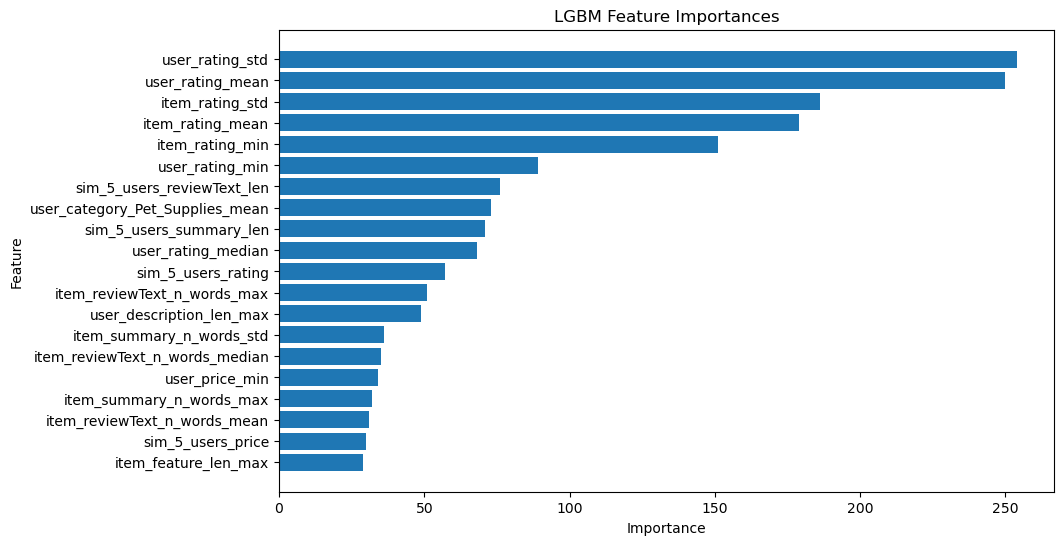

In [533]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# and 'feature_names' is a list of your feature names

# Get feature importances
importances = lgbm.feature_importances_

# Create a DataFrame for easier handling
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'LGBM Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [534]:
pred_col = f'{target}_pred_{lgbm.__str__()}'
old_columns_val = val.columns.copy(deep=True)
# Replace unsupported characters with an underscore or remove them
val.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in val.columns]

val[pred_col] = lgbm.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
val[[target]+[col for col in val.columns if 'pred' in col]]

rating  rating_pred_baseline  \
userName                                        
 Boo              5.000                 4.000   
 Carol Ann        4.000                 4.500   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
...                 ...                   ...   
zensm             5.000                 4.875   
zephyr 2          5.000                 4.333   
zman              5.000                 4.000   
~Susan Atherton   3.000                 4.000   
~Susan Atherton   5.000                 4.000   

                 rating_pred_LinearRegression_n_jobs__1_  \
userName                                                   
 Boo                                               3.845   
 Carol Ann                                         4.862   
 KT                                                4.079   
 KT                                                3.978   
 KT                                                4.768   
...                                                  ...   
zensm                                              4.960   
zephyr 2                                           4.057   
zman                                               4.445   
~Susan Atherton                                    4.170   
~Susan Atherton                                    4.017   

                 rating_pred_Lasso_alpha_0_5_  \
userName                                        
 Boo                                    4.388   
 Carol Ann                              4.445   
 KT                                     4.387   
 KT                                     4.382   
 KT                                     4.422   
...                                       ...   
zensm                                   4.412   
zephyr 2                                4.410   
zman                                    4.445   
~Susan Atherton                         4.402   
~Susan Atherton                         4.396   

                 rating_pred_RandomForestRegressor_max_depth_2__n_jobs__1__random_state_0_  \
userName                                                                                     
 Boo                                                         3.948                           
 Carol Ann                                                   4.737                           
 KT                                                          4.737                           
 KT                                                          4.737                           
 KT                                                          4.737                           
...                                                            ...                           
zensm                                                        4.737                           
zephyr 2                                                     4.737                           
zman                                                         3.948                           
~Susan Atherton                                              3.948                           
~Susan Atherton                                              3.948                           

                 rating_pred_RandomForestRegressor_n_jobs__1__random_state_0_  \
userName                                                                        
 Boo                                                         3.870              
 Carol Ann                                                   5.000              
 KT                                                          4.120              
 KT                                                          3.420              
 KT                                                          4.890              
...                                                            ...              
zensm                                                        4.970              
zephyr 2

In [535]:
model_name = regr.__str__()
the_df = pd.concat([val, X_val['item_id']], axis=1)
target_col = target
the_metrics_df = metrics
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  \
baseline                                           13986.000 11631.000   
LinearRegression(n_jobs=-1)                        13986.000 11631.000   
Lasso(alpha=0.5)                                   13986.000 11631.000   
RandomForestRegressor(max_depth=2, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   

                                                    mean_rating  \
baseline                                                  4.419   
LinearRegression(n_jobs=-1)                               4.419   
Lasso(alpha=0.5)                                          4.419   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...        4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   

                                                    mean_absolute_error  \
baseline                                                          0.711   
LinearRegression(n_jobs=-1)                             20900643336.316   
Lasso(alpha=0.5)                                                  0.831   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                0.738   
RandomForestRegressor(n_jobs=-1, random_state=0)                  0.686   
RandomForestRegressor(n_jobs=-1, random_state=0)                  0.721   

                                                           max_error  \
baseline                                                       4.000   
LinearRegression(n_jobs=-1)                        4777253292447.682   
Lasso(alpha=0.5)                                               3.445   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             3.737   
RandomForestRegressor(n_jobs=-1, random_state=0)               4.000   
RandomForestRegressor(n_jobs=-1, random_state=0)               4.525   

                                                    mean_absolute_percentage_error  \
baseline                                                                     0.291   
LinearRegression(n_jobs=-1)                                         6400062533.508   
Lasso(alpha=0.5)                                                             0.338   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                           0.303   
RandomForestRegressor(n_jobs=-1, random_state=0)                             0.258   
RandomForestRegressor(n_jobs=-1, random_state=0)                             0.274   

                                                            mean_squared_error  \
baseline                                                                 1.109   
LinearRegression(n_jobs=-1)                        45565258704647285112832.000   
Lasso(alpha=0.5)                                                         1.175   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                       1.140   
RandomForestRegressor(n_jobs=-1, random_state=0)                         1.309   
RandomForestRegressor(n_jobs=-1, random_state=0)                         1.331   

                                                                       r2_score  \
baseline                                                                  0.068   
LinearRegression(n_jobs=-1)                        -38275999105943248830464.000   
Lasso(alpha=0.5)                                                          0.013   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                        0.042   
RandomForestRegressor(n_jobs=-1, random_state=0)                         -0.099   
RandomForestRegressor(n_jobs=-1, random_state=0)                         -0.118   

                                                    rating_1.0_error  \
baseline                                                       2.855   
LinearRegression(n_jobs=-1)                          40718067012.256   
Lasso(alpha=0.5)                                        

## LGBM grid search - no better resulsts

In [536]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    # Add other parameters here
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(train.drop(columns=target), train[target])

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27948
[LightGBM] [Info] Number of data points in the train set: 90615, number of used features: 342
[LightGBM] [Info] Start training from score 4.392485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26916
[LightGBM] [Info] Number of data points in the train set: 90615, number of used features: 341
[LightGBM] [Info] Start training from score 4.399481
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [537]:
best_model.score(train.drop(columns=target), train[target])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.5445275819334304

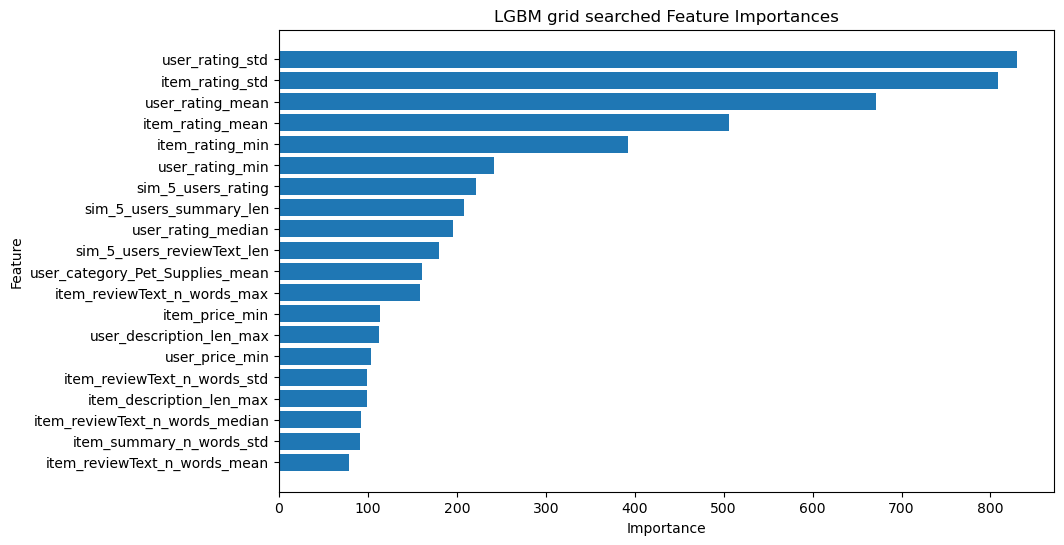

In [538]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# and 'feature_names' is a list of your feature names

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for easier handling
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'LGBM grid searched Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [539]:
pred_col = f'{target}_pred_{best_model.__str__()}'
val[pred_col] = best_model.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
val[[target]+[col for col in val.columns if 'pred' in col]]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


rating  rating_pred_baseline  \
userName                                        
 Boo              5.000                 4.000   
 Carol Ann        4.000                 4.500   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
 KT               5.000                 4.333   
...                 ...                   ...   
zensm             5.000                 4.875   
zephyr 2          5.000                 4.333   
zman              5.000                 4.000   
~Susan Atherton   3.000                 4.000   
~Susan Atherton   5.000                 4.000   

                 rating_pred_LinearRegression_n_jobs__1_  \
userName                                                   
 Boo                                               3.845   
 Carol Ann                                         4.862   
 KT                                                4.079   
 KT                                                3.978   
 KT                                                4.768   
...                                                  ...   
zensm                                              4.960   
zephyr 2                                           4.057   
zman                                               4.445   
~Susan Atherton                                    4.170   
~Susan Atherton                                    4.017   

                 rating_pred_Lasso_alpha_0_5_  \
userName                                        
 Boo                                    4.388   
 Carol Ann                              4.445   
 KT                                     4.387   
 KT                                     4.382   
 KT                                     4.422   
...                                       ...   
zensm                                   4.412   
zephyr 2                                4.410   
zman                                    4.445   
~Susan Atherton                         4.402   
~Susan Atherton                         4.396   

                 rating_pred_RandomForestRegressor_max_depth_2__n_jobs__1__random_state_0_  \
userName                                                                                     
 Boo                                                         3.948                           
 Carol Ann                                                   4.737                           
 KT                                                          4.737                           
 KT                                                          4.737                           
 KT                                                          4.737                           
...                                                            ...                           
zensm                                                        4.737                           
zephyr 2                                                     4.737                           
zman                                                         3.948                           
~Susan Atherton                                              3.948                           
~Susan Atherton                                              3.948                           

                 rating_pred_RandomForestRegressor_n_jobs__1__random_state_0_  \
userName                                                                        
 Boo                                                         3.870              
 Carol Ann                                                   5.000              
 KT                                                          4.120              
 KT                                                          3.420              
 KT                                                          4.890              
...                                                            ...              
zensm                                                        4.970              
zephyr 2

In [540]:
model_name = best_model.__str__()
the_df = pd.concat([val, X_val['item_id']], axis=1)
target_col = target
the_metrics_df = metrics
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  \
baseline                                           13986.000 11631.000   
LinearRegression(n_jobs=-1)                        13986.000 11631.000   
Lasso(alpha=0.5)                                   13986.000 11631.000   
RandomForestRegressor(max_depth=2, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
LGBMRegressor(learning_rate=0.05, max_depth=7, ... 13986.000 11631.000   

                                                    mean_rating  \
baseline                                                  4.419   
LinearRegression(n_jobs=-1)                               4.419   
Lasso(alpha=0.5)                                          4.419   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...        4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...        4.419   

                                                    mean_absolute_error  \
baseline                                                          0.711   
LinearRegression(n_jobs=-1)                             20900643336.316   
Lasso(alpha=0.5)                                                  0.831   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                0.738   
RandomForestRegressor(n_jobs=-1, random_state=0)                  0.686   
RandomForestRegressor(n_jobs=-1, random_state=0)                  0.721   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...                0.725   

                                                           max_error  \
baseline                                                       4.000   
LinearRegression(n_jobs=-1)                        4777253292447.682   
Lasso(alpha=0.5)                                               3.445   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...             3.737   
RandomForestRegressor(n_jobs=-1, random_state=0)               4.000   
RandomForestRegressor(n_jobs=-1, random_state=0)               4.525   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...             4.351   

                                                    mean_absolute_percentage_error  \
baseline                                                                     0.291   
LinearRegression(n_jobs=-1)                                         6400062533.508   
Lasso(alpha=0.5)                                                             0.338   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                           0.303   
RandomForestRegressor(n_jobs=-1, random_state=0)                             0.258   
RandomForestRegressor(n_jobs=-1, random_state=0)                             0.274   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...                           0.275   

                                                            mean_squared_error  \
baseline                                                                 1.109   
LinearRegression(n_jobs=-1)                        45565258704647285112832.000   
Lasso(alpha=0.5)                                                         1.175   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                       1.140   
RandomForestRegressor(n_jobs=-1, random_state=0)                         1.309   
RandomForestRegressor(n_jobs=-1, random_state=0)                         1.331   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...                       1.340   

                                                                       r2_score  \
baseline                                                                  0.068   
LinearRegression(n_jobs=-1)                        -38275999105943248830464.000   
Lasso(alpha=0.5)                                                          0.013   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...                

## Final try - Random Forest grid search max_depth (grid search on all is too slow, LGBM much more efficient)

In [558]:
from sklearn.ensemble import RandomForestRegressor
# Range of max_depth values to explore
max_max_depth = 31
max_depth_range = np.arange(3, max_max_depth, 3)  # 1 to 30

for max_depth in max_depth_range:
    print(f"max_depth: {max_depth}/{max_max_depth}")
    regr = RandomForestRegressor(max_depth=max_depth, random_state=0, n_jobs=-1)
    regr.fit(train.drop(columns=target), train[target])
    print(regr.score(train.drop(columns=target), train[target]))
    pred_col = f'{target}_pred_{regr.__str__()}'
    val[pred_col] = regr.predict(val.drop(columns=[col for col in val if col==target or 'pred' in col]))
    model_name = regr.__str__()
    the_df = pd.concat([val, X_val['item_id']], axis=1)
    target_col = target
    the_metrics_df = metrics
    regression_metrics = None
    metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

max_depth: 3/31
0.33491899165773664
max_depth: 6/31
0.46404388764472804
max_depth: 9/31
0.5202938741816023
max_depth: 12/31
0.5962797632036274
max_depth: 15/31
0.6923850809166624
max_depth: 18/31
0.7704970353823306
max_depth: 21/31
0.819713571743953
max_depth: 24/31
0.8483556635429538
max_depth: 27/31
0.8643139291809536
max_depth: 30/31
0.8733203580645298


userName  item_ids  \
baseline                                           13986.000 11631.000   
LinearRegression(n_jobs=-1)                        13986.000 11631.000   
Lasso(alpha=0.5)                                   13986.000 11631.000   
RandomForestRegressor(max_depth=2, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
LGBMRegressor(learning_rate=0.05, max_depth=7, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=3, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(max_depth=6, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(max_depth=9, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(max_depth=12, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=15, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=18, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=21, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=24, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=27, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=30, n_jobs=-1, ... 13986.000 11631.000   

                                                    mean_rating  \
baseline                                                  4.419   
LinearRegression(n_jobs=-1)                               4.419   
Lasso(alpha=0.5)                                          4.419   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...        4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=3, n_jobs=-1, r...        4.419   
RandomForestRegressor(max_depth=6, n_jobs=-1, r...        4.419   
RandomForestRegressor(max_depth=9, n_jobs=-1, r...        4.419   
RandomForestRegressor(max_depth=12, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=15, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=18, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=21, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=24, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=27, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=30, n_jobs=-1, ...        4.419   

                                                    mean_absolute_error  \
baseline                   

In [568]:
metrics.reset_index().drop_duplicates(subset='index')[['index','mean_absolute_error']].sort_values(by='mean_absolute_error')

index  mean_absolute_error
4    RandomForestRegressor(n_jobs=-1, random_state=0)                0.686
7   RandomForestRegressor(max_depth=31, n_jobs=-1,...                0.687
26  RandomForestRegressor(max_depth=30, n_jobs=-1,...                0.687
25  RandomForestRegressor(max_depth=27, n_jobs=-1,...                0.688
24  RandomForestRegressor(max_depth=24, n_jobs=-1,...                0.690
23  RandomForestRegressor(max_depth=21, n_jobs=-1,...                0.692
22  RandomForestRegressor(max_depth=18, n_jobs=-1,...                0.698
21  RandomForestRegressor(max_depth=15, n_jobs=-1,...                0.706
0                                            baseline                0.711
20  RandomForestRegressor(max_depth=12, n_jobs=-1,...                0.717
19  RandomForestRegressor(max_depth=9, n_jobs=-1, ...                0.725
6   LGBMRegressor(learning_rate=0.05, max_depth=7,...                0.725
18  RandomForestRegressor(max_depth=6, n_jobs=-1, ...                0.731
17  RandomForestRegressor(max_depth=3, n_jobs=-1, ...                0.736
3   RandomForestRegressor(max_depth=2, n_jobs=-1, ...                0.738
2                                    Lasso(alpha=0.5)                0.831
1                         LinearRegression(n_jobs=-1)      20900643336.316

## We'll choose max_depth=None as it has the minimum mean absolute error. 

## The basline model does have a lower MSE (less ratings with larger errors), but higher MAE (generally worse the RF), and there's also no practical way to use it - it essetinailly predicts the same fixed number of rating for all items the user might choose.

# Model Validation on test

In [572]:
train['rating_pred_baseline']

KeyError: 'rating_pred_baseline'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_jobs=-1)
regr.fit(train.drop(columns=target), train[target])
print(regr.score(train.drop(columns=target), train[target]))

## MAE is higher, as suspected, RF max_depth=None is overfitting... might also be a feature selection issue. But not time to explore :( hopefully retraining on entire dataset mitigate a little.

In [584]:

test[pred_col] = regr.predict(test.drop(columns=[col for col in test.columns if col==target or 'pred' in col]))
model_name = f'test_{regr.__str__()}'
X_test.index = test.index
the_df = pd.concat([test, X_test['item_id']], axis=1)
target_col = target
the_metrics_df = metrics
regression_metrics = None
metrics = get_regression_metrics(the_df, target_col, pred_col, the_metrics_df, regression_metrics, model_name)
metrics

userName  item_ids  \
baseline                                           13986.000 11631.000   
LinearRegression(n_jobs=-1)                        13986.000 11631.000   
Lasso(alpha=0.5)                                   13986.000 11631.000   
RandomForestRegressor(max_depth=2, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
RandomForestRegressor(n_jobs=-1, random_state=0)   13986.000 11631.000   
LGBMRegressor(learning_rate=0.05, max_depth=7, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=31, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=3, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(max_depth=6, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(max_depth=9, n_jobs=-1, r... 13986.000 11631.000   
RandomForestRegressor(max_depth=12, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=15, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=18, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=21, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=24, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=27, n_jobs=-1, ... 13986.000 11631.000   
RandomForestRegressor(max_depth=30, n_jobs=-1, ... 13986.000 11631.000   
test_RandomForestRegressor(n_jobs=-1, random_st... 14018.000 12086.000   

                                                    mean_rating  \
baseline                                                  4.419   
LinearRegression(n_jobs=-1)                               4.419   
Lasso(alpha=0.5)                                          4.419   
RandomForestRegressor(max_depth=2, n_jobs=-1, r...        4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
RandomForestRegressor(n_jobs=-1, random_state=0)          4.419   
LGBMRegressor(learning_rate=0.05, max_depth=7, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=31, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=3, n_jobs=-1, r...        4.419   
RandomForestRegressor(max_depth=6, n_jobs=-1, r...        4.419   
RandomForestRegressor(max_depth=9, n_jobs=-1, r...        4.419   
RandomForestRegressor(max_depth=12, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=15, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=18, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=21, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=24, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=27, n_jobs=-1, ...        4.419   
RandomForestRegressor(max_depth=30, n_jobs=-1, ...        4.419   
test_RandomForestRegressor(n_

# Retrain on all data and save to pickle, save metrics to csv

In [586]:
# Create Entire dataset: train + validation + test
df = pd.concat([train, val[train.columns], test[train.columns]], axis=0)
assert df.isna().sum().sum() == 0

In [589]:
df.shape

brand_isna  category_Cell_Phones_and_Accessories  \
userName                                                            
 Boo                 -0.073                                -0.221   
 Boo                 -0.073                                -0.221   
 Boo                 -0.073                                -0.221   
 Boo                 -0.073                                -0.221   
 Carol Ann           -0.073                                -0.221   
...                     ...                                   ...   
yvonne               -0.073                                -0.221   
zdamaw               -0.073                                -0.221   
zensm                -0.073                                 4.520   
zephyr 2             -0.073                                -0.221   
~Susan Atherton      -0.073                                -0.221   

                 category_Musical_Instruments  category_Patio_Lawn_and_Garden  \
userName                                                                        
 Boo                                   -0.157                          -0.313   
 Boo                                   -0.157                          -0.313   
 Boo                                   -0.157                          -0.313   
 Boo                                   -0.157                          -0.313   
 Carol Ann                             -0.157                          -0.313   
...                                       ...                             ...   
yvonne                                 -0.157                          -0.313   
zdamaw                                 -0.157                          -0.313   
zensm                                  -0.157                          -0.313   
zephyr 2                               -0.157                          -0.313   
~Susan Atherton                        -0.157                          -0.313   

                 category_Pet_Supplies  category_Video_Games  \
userName                                                       
 Boo                             1.125                -0.105   
 Boo                             1.125                -0.105   
 Boo                             1.125                -0.105   
 Boo                             1.125                -0.105   
 Carol Ann                       1.125                -0.105   
...                                ...                   ...   
yvonne                           1.125                -0.105   
zdamaw                          -0.889                -0.105   
zensm                           -0.889                -0.105   
zephyr 2                        -0.889                -0.105   
~Susan Atherton                  1.125                -0.105   

                 brand_price_(5.99, 8.154]  brand_price_(8.154, 9.99]  \
userName                                                                
 Boo                                -0.335                     -0.362   
 Boo                                -0.335                     -0.362   
 Boo                                -0.335                     -0.362   
 Boo                                 2.988                     -0.362   
 Carol Ann                          -0.335                     -0.362   
...                                    ...                        ...   
yvonne                              -0.335                     -0.362   
zdamaw                              -0.335                     -0.362   
zensm                               -0.335                     -0.362   
zephyr 2                            -0.335                     -0.362   
~Susan Atherton                     -0.335                     -0.362   

                 brand_price_(9.99, 12.538]  brand_price_(12.538, 14.98]  \
userName                                                                   
 Boo                                 -0.360                        2.609   
 Boo                                 -0.360           

0.869372281499834


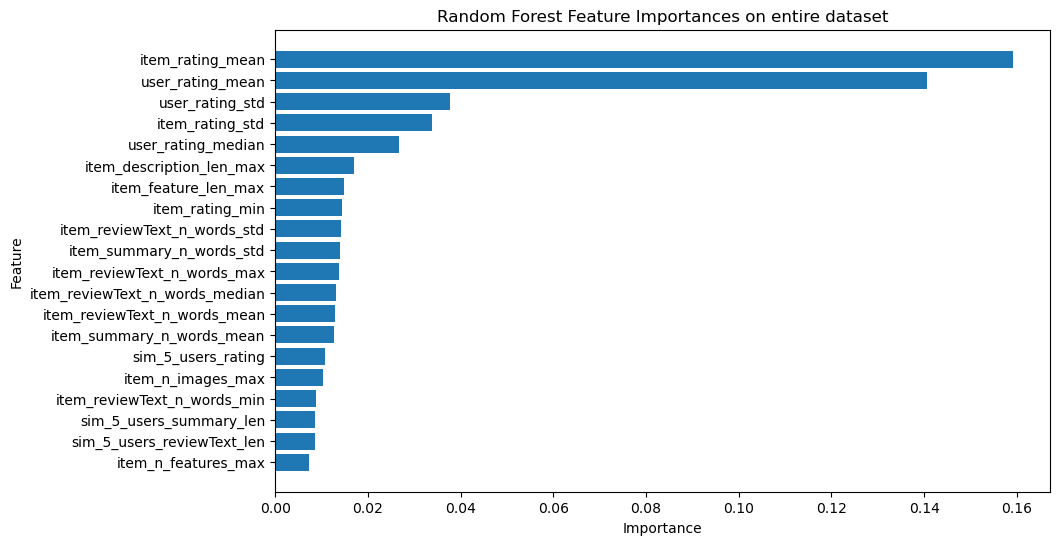

In [590]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_jobs=-1)
regr.fit(df.drop(columns=target), df[target])
print(regr.score(df.drop(columns=target), df[target]))

# Get feature importances
importances = regr.feature_importances_

# Create a DataFrame for easier handling
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances_top = feature_importances.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_top['Feature'], feature_importances_top['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances on entire dataset')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [591]:
print("This is our current trained production model:")
print(regr)

filename='amazon_recommendation_RF_model.pickle'
save_model_to_pickle(regr, filename)

metrics.to_excel("models_metrics.xlsx")
print("Finished training pipeline!")


This is our current trained production model:
RandomForestRegressor(n_jobs=-1, random_state=0)
save_model_to_pickle()
Saved amazon_recommendation_RF_model.pickle succefully!
Finished training pipeline!


# How to make predictions in production

In [626]:
df['item_id'] = pd.concat([X_train['item_id'], X_val['item_id'], X_test['item_id']], axis=0, ignore_index=True).values

## our features are divided by item and user specific features, all can be queried from df,
## and similarity features, which should be calculated on demand using the user similarity matrix, as in "Add collaborative filtering features" above.
## However, we will only consider for prediction items that were their share of ratings out of total rating is at least 0.1% - and so we'll precompute all similarity features using all users and these highly rated set of items  


In [714]:
highly_rated_items = df['item_id'].value_counts(normalize=True)[df['item_id'].value_counts(normalize=True)>0.001].index.to_list()
highly_rated_items

['KIND_KIND Bars, Caramel Almond and Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count_$13.67',
 'KIND_KIND Bars, Dark Chocolate Nuts &amp; Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count_$13.67',
 'KIND_Kind Bars, Madagascar Vanilla Almond, Gluten Free, Low Sugar, 1.4oz_$14.79',
 'KIND_KIND Bars, Dark Chocolate Chili Almond, Gluten Free, 1.4 Ounce Bars, 12 Count_$15.53',
 "NA_NIKE Women's Flex Supreme TR 4 Cross Trainer_$54.95 - $199.95",
 'KONG_KONG Classic Dog Toy with Your Choice of Dog Treat (Combo Bundle)._NA',
 'Puppia_Puppia Dog Harnesses_$13.29',
 'Best Pet Supplies, Inc._Voyager All Weather No Pull Step-in Mesh Dog Harness Padded Vest_$12.99',
 'AmazonBasics_AmazonBasics Single Door &amp; Double Door Folding Metal Dog Crate_$27.99',
 'Puppia_Puppia Dog Harnesses_$15.95',
 'PetSafe_PetSafe Gentle Leader Head Collar with Training DVD_.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)

In [679]:
df = df.reset_index()
df

userName  brand_isna  category_Cell_Phones_and_Accessories  \
0                   Boo      -0.073                                -0.221   
1                   Boo      -0.073                                -0.221   
2                   Boo      -0.073                                -0.221   
3                   Boo      -0.073                                -0.221   
4             Carol Ann      -0.073                                -0.221   
...                 ...         ...                                   ...   
184313           yvonne      -0.073                                -0.221   
184314           zdamaw      -0.073                                -0.221   
184315            zensm      -0.073                                 4.520   
184316         zephyr 2      -0.073                                -0.221   
184317  ~Susan Atherton      -0.073                                -0.221   

        category_Musical_Instruments  category_Patio_Lawn_and_Garden  \
0                             -0.157                          -0.313   
1                             -0.157                          -0.313   
2                             -0.157                          -0.313   
3                             -0.157                          -0.313   
4                             -0.157                          -0.313   
...                              ...                             ...   
184313                        -0.157                          -0.313   
184314                        -0.157                          -0.313   
184315                        -0.157                          -0.313   
184316                        -0.157                          -0.313   
184317                        -0.157                          -0.313   

        category_Pet_Supplies  category_Video_Games  \
0                       1.125                -0.105   
1                       1.125                -0.105   
2                       1.125                -0.105   
3                       1.125                -0.105   
4                       1.125                -0.105   
...                       ...                   ...   
184313                  1.125                -0.105   
184314                 -0.889                -0.105   
184315                 -0.889                -0.105   
184316                 -0.889                -0.105   
184317                  1.125                -0.105   

        brand_price_(5.99, 8.154]  brand_price_(8.154, 9.99]  \
0                          -0.335                     -0.362   
1                          -0.335                     -0.362   
2                          -0.335                     -0.362   
3                           2.988                     -0.362   
4                          -0.335                     -0.362   
...                           ...                        ...   
184313                     -0.335                     -0.362   
184314                     -0.335                     -0.362   
184315                     -0.335                     -0.362   
184316                     -0.335                     -0.362   
184317                     -0.335                     -0.362   

        brand_price_(9.99, 12.538]  brand_price_(12.538, 14.98]  \
0                           -0.360                        2.609   
1                           -0.360                        2.609   
2                           -0.360                        2.609   
3                           -0.360                       -0.383   
4                           -0.360                       -0.383   
...                            ...                          ...   
184313                      -0.360                       -0.383   
184314                      -0.360                       -0.383   
184315                      -0.360                       -0.383   
184316                       2.781                       -0.383   
184317                      -0.360                       -

In [699]:
import pandas as pd

# Get unique users
unique_users = df['userName'].unique()

# Create a DataFrame from highly_rated_items
highly_rated_df = pd.DataFrame(highly_rated_items, columns=['item_id'])

# Create a DataFrame for all unique users
users_df = pd.DataFrame(unique_users, columns=['userName'])

# Perform Cartesian product
cartesian_product_df = users_df.assign(key=1).merge(highly_rated_df.assign(key=1), on='key').drop('key', axis=1)

# Drop pairs that already exist in df
new_pairs_df = cartesian_product_df[~cartesian_product_df.set_index(['userName', 'item_id']).index.isin(df.set_index(['userName', 'item_id']).index)]

# Now, new_pairs_df contains all new combinations of userName and highly rated item_ids

In [700]:
new_pairs_df

userName                                            item_id
0             Boo  KIND_KIND Bars, Caramel Almond and Sea Salt, G...
1             Boo  KIND_KIND Bars, Dark Chocolate Nuts &amp; Sea ...
2             Boo  KIND_Kind Bars, Madagascar Vanilla Almond, Glu...
3             Boo  KIND_KIND Bars, Dark Chocolate Chili Almond, G...
4             Boo  NA_NIKE Women's Flex Supreme TR 4 Cross Traine...
...           ...                                                ...
304012  imsocrazy  KONG_KONG Wild Knots Bear Dog Toy, Colors Vary...
304013  imsocrazy  MidWest Homes for Pets_MidWest Homes for Pets ...
304014  imsocrazy  Taste of the Wild_Taste Of The Wild Grain Free...
304015  imsocrazy  Outward Hound_Outward Hound Hide-A-Squirrel Pu...
304016  imsocrazy                 Puppia_Puppia Dog Harnesses_$15.79

[300143 rows x 2 columns]

## we created all possible pair of users and items. Now let's add their user and item specific features, and calculate their similarity features.

In [701]:
user_cols = [col for col in df.columns if 'user' in col if 'sim' not in col]
user_cols

['userName',
 'user_price_min',
 'user_price_mean',
 'user_price_median',
 'user_price_max',
 'user_price_std',
 'user_vote_min',
 'user_vote_mean',
 'user_vote_median',
 'user_vote_max',
 'user_vote_std',
 'user_description_n_sentences_min',
 'user_description_n_sentences_mean',
 'user_description_n_sentences_median',
 'user_description_n_sentences_max',
 'user_description_n_sentences_std',
 'user_description_len_min',
 'user_description_len_mean',
 'user_description_len_median',
 'user_description_len_max',
 'user_description_len_std',
 'user_n_images_min',
 'user_n_images_mean',
 'user_n_images_median',
 'user_n_images_max',
 'user_n_images_std',
 'user_brand_isna_min',
 'user_brand_isna_median',
 'user_brand_isna_max',
 'user_brand_isna_std',
 'user_n_features_min',
 'user_n_features_mean',
 'user_n_features_median',
 'user_n_features_max',
 'user_n_features_std',
 'user_feature_len_min',
 'user_feature_len_mean',
 'user_feature_len_median',
 'user_feature_len_max',
 'user_feature_

In [702]:
user_specific_features = df.drop_duplicates('userName')[user_cols]
user_specific_features

userName  user_price_min  user_price_mean  \
0                         Boo           1.212           -0.726   
4                   Carol Ann           3.722            1.485   
8                          KT          -0.811           -1.061   
29              Seas the Day           -0.467           -2.686   
30      #1 Honest reviewer :)           0.862            2.557   
...                       ...             ...              ...   
179005                  Silea          -1.106           -3.169   
180454                TosaTat          -1.106           -3.169   
180753               Victor E          -1.106           -3.169   
181812                  clair          -1.106           -3.169   
182390              imsocrazy          -1.106           -3.169   

        user_price_median  user_price_max  user_price_std  user_vote_min  \
0                  -0.024          -1.389          -1.664         -0.018   
4                   1.707          -0.652          -0.972         -0.018   
8                  -1.959          -0.125           0.154         -0.018   
29                 -2.170          -1.882          -2.148         -0.018   
30                  0.581           1.430           2.779         -0.018   
...                   ...             ...             ...            ...   
179005             -2.664          -1.982          -2.148         -0.018   
180454             -2.664          -1.982          -2.148         -0.018   
180753             -2.664          -1.982          -2.148         -0.018   
181812             -2.664          -1.982          -2.148         -0.018   
182390             -2.664          -1.982          -2.148         -0.018   

        user_vote_mean  user_vote_median  user_vote_max  user_vote_std  \
0               -0.368            -0.042         -0.763         -0.648   
4               -0.368            -0.042         -0.763         -0.648   
8               -0.368            -0.042         -0.763         -0.648   
29              -0.368            -0.042         -0.763         -0.648   
30               0.766            -0.042          0.229          1.134   
...                ...               ...            ...            ...   
179005          -0.368            -0.042         -0.763         -0.648   
180454          -0.368            -0.042         -0.763         -0.648   
180753          -0.368            -0.042         -0.763         -0.648   
181812          -0.368            -0.042         -0.763         -0.648   
182390          -0.368            -0.042         -0.763         -0.648   

        user_description_n_sentences_min  user_description_n_sentences_mean  \
0                                  0.957                              0.466   
4                                 -0.577                              0.993   
8                                 -0.577                              1.947   
29                                 0.957                             -1.116   
30                                -0.577                             -1.212   
...                                  ...                                ...   
179005                            -0.577                             -2.170   
180454                            -0.577                             -2.170   
180753                            -0.577                             -2.170   
181812                            -0.577                             -2.170   
182390                            -0.577                             -2.170   

        user_description_n_sentences_median  user_description_n_sentences_max  \
0                                     0.610                            -0.588   
4                                    -0.368                             0.768   
8                                     1.589                             1.039   
29                                   -0.368                            -1.673   
30                                   -0.368                            -

In [703]:
new_pairs_df = new_pairs_df.merge(user_specific_features, on=['userName'], how='left')
new_pairs_df

userName                                            item_id  \
0             Boo  KIND_KIND Bars, Caramel Almond and Sea Salt, G...   
1             Boo  KIND_KIND Bars, Dark Chocolate Nuts &amp; Sea ...   
2             Boo  KIND_Kind Bars, Madagascar Vanilla Almond, Glu...   
3             Boo  KIND_KIND Bars, Dark Chocolate Chili Almond, G...   
4             Boo  NA_NIKE Women's Flex Supreme TR 4 Cross Traine...   
...           ...                                                ...   
300138  imsocrazy  KONG_KONG Wild Knots Bear Dog Toy, Colors Vary...   
300139  imsocrazy  MidWest Homes for Pets_MidWest Homes for Pets ...   
300140  imsocrazy  Taste of the Wild_Taste Of The Wild Grain Free...   
300141  imsocrazy  Outward Hound_Outward Hound Hide-A-Squirrel Pu...   
300142  imsocrazy                 Puppia_Puppia Dog Harnesses_$15.79   

        user_price_min  user_price_mean  user_price_median  user_price_max  \
0                1.212           -0.726             -0.024          -1.389   
1                1.212           -0.726             -0.024          -1.389   
2                1.212           -0.726             -0.024          -1.389   
3                1.212           -0.726             -0.024          -1.389   
4                1.212           -0.726             -0.024          -1.389   
...                ...              ...                ...             ...   
300138          -1.106           -3.169             -2.664          -1.982   
300139          -1.106           -3.169             -2.664          -1.982   
300140          -1.106           -3.169             -2.664          -1.982   
300141          -1.106           -3.169             -2.664          -1.982   
300142          -1.106           -3.169             -2.664          -1.982   

        user_price_std  user_vote_min  user_vote_mean  user_vote_median  \
0               -1.664         -0.018          -0.368            -0.042   
1               -1.664         -0.018          -0.368            -0.042   
2               -1.664         -0.018          -0.368            -0.042   
3               -1.664         -0.018          -0.368            -0.042   
4               -1.664         -0.018          -0.368            -0.042   
...                ...            ...             ...               ...   
300138          -2.148         -0.018          -0.368            -0.042   
300139          -2.148         -0.018          -0.368            -0.042   
300140          -2.148         -0.018          -0.368            -0.042   
300141          -2.148         -0.018          -0.368            -0.042   
300142          -2.148         -0.018          -0.368            -0.042   

        user_vote_max  user_vote_std  user_description_n_sentences_min  \
0              -0.763         -0.648                             0.957   
1              -0.763         -0.648                             0.957   
2              -0.763         -0.648                             0.957   
3              -0.763         -0.648                             0.957   
4              -0.763         -0.648                             0.957   
...               ...            ...                               ...   
300138         -0.763         -0.648                            -0.577   
300139         -0.763         -0.648                            -0.577   
300140         -0.763         -0.648                            -0.577   
300141         -0.763         -0.648                            -0.577   
300142         -0.763         -0.648                            -0.577   

        user_description_n_sentences_mean  \
0                                   0.466   
1                                   0.466   
2                                   0.466   
3                                   0.466   
4                                   0.466   
...                                   ...   
300138                             -2.170   
300139                             -2.170   
300140      

In [708]:
item_cols = [col for col in df.columns if col.startswith('item') or col.startswith('brand') or col.startswith('category') if 'sim' not in col]
item_cols

['brand_isna',
 'category_Cell_Phones_and_Accessories',
 'category_Musical_Instruments',
 'category_Patio_Lawn_and_Garden',
 'category_Pet_Supplies',
 'category_Video_Games',
 'brand_price_(5.99, 8.154]',
 'brand_price_(8.154, 9.99]',
 'brand_price_(9.99, 12.538]',
 'brand_price_(12.538, 14.98]',
 'brand_price_(14.98, 18.19]',
 'brand_price_(18.19, 19.95]',
 'brand_price_(19.95, 23.99]',
 'brand_price_(23.99, 34.872]',
 'brand_price_(34.872, 999.0]',
 'item_price_min',
 'item_price_mean',
 'item_price_median',
 'item_price_max',
 'item_price_std',
 'item_vote_min',
 'item_vote_mean',
 'item_vote_median',
 'item_vote_max',
 'item_vote_std',
 'item_description_n_sentences_max',
 'item_description_n_sentences_std',
 'item_description_len_max',
 'item_description_len_std',
 'item_n_images_max',
 'item_n_images_std',
 'item_brand_isna_min',
 'item_brand_isna_mean',
 'item_brand_isna_median',
 'item_brand_isna_max',
 'item_brand_isna_std',
 'item_n_features_max',
 'item_n_features_std',
 'it

In [709]:
item_specific_features = move_cols_to_first(df.drop_duplicates('item_id')[item_cols], ['item_id'])
item_specific_features

move_cols_to_first()


item_id  brand_isna  \
0       Pedigree_Pedigree Complete Nutrition Adult Dry...      -0.073   
1       Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...      -0.073   
2       Pedigree_Pedigree Adult Dry Dog Food - Grilled...      -0.073   
3       Purina ALPO Brand Dog Food_Purina ALPO Prime C...      -0.073   
4       PETMAKER_PETMAKER Folding Plastic Pet Stairs D...      -0.073   
...                                                   ...         ...   
183671  Leash Boss_Leashboss Original - Heavy Duty Dog...      -0.073   
183733  Parker_Parker Jotter 3 Colours - 1 Black + 1 B...      -0.073   
183813  MagicSky_LG Stylo 2 Case, LG G Stylo 2 Case, M...      -0.073   
183964  Bernat_Bernat Baby Sport Big Ball Ombre Yarn -...      -0.073   
184231  ECO-WORTHY_ECO-WORTHY 12 Volts 5 Watts Portabl...      -0.073   

        category_Cell_Phones_and_Accessories  category_Musical_Instruments  \
0                                     -0.221                        -0.157   
1                                     -0.221                        -0.157   
2                                     -0.221                        -0.157   
3                                     -0.221                        -0.157   
4                                     -0.221                        -0.157   
...                                      ...                           ...   
183671                                -0.221                        -0.157   
183733                                -0.221                        -0.157   
183813                                 4.520                        -0.157   
183964                                -0.221                        -0.157   
184231                                -0.221                        -0.157   

        category_Patio_Lawn_and_Garden  category_Pet_Supplies  \
0                               -0.313                  1.125   
1                               -0.313                  1.125   
2                               -0.313                  1.125   
3                               -0.313                  1.125   
4                               -0.313                  1.125   
...                                ...                    ...   
183671                          -0.313                  1.125   
183733                          -0.313                 -0.889   
183813                          -0.313                 -0.889   
183964                          -0.313                 -0.889   
184231                           3.194                 -0.889   

        category_Video_Games  brand_price_(5.99, 8.154]  \
0                     -0.105                     -0.335   
1                     -0.105                     -0.335   
2                     -0.105                     -0.335   
3                     -0.105                      2.988   
4                     -0.105                     -0.335   
...                      ...                        ...   
183671                -0.105                     -0.335   
183733                -0.105                     -0.335   
183813                -0.105                      2.988   
183964                -0.105                     -0.335   
184231                -0.105                     -0.335   

        brand_price_(8.154, 9.99]  brand_price_(9.99, 12.538]  \
0                          -0.362                      -0.360   
1                          -0.362                      -0.360   
2                          -0.362                      -0.360   
3                          -0.362                      -0.360   
4                          -0.362                      -0.360   
...                           ...                         ...   
183671                     -0.362                      -0.360   
183733                     -0.362                       2.781   
183813                     -0.362                      -0.360   
183964                      2.763                      -0.360   
184231                     -0.3

In [710]:
new_pairs_df = new_pairs_df.merge(item_specific_features, on=['item_id'], how='left')
new_pairs_df

userName                                            item_id  \
0             Boo  KIND_KIND Bars, Caramel Almond and Sea Salt, G...   
1             Boo  KIND_KIND Bars, Dark Chocolate Nuts &amp; Sea ...   
2             Boo  KIND_Kind Bars, Madagascar Vanilla Almond, Glu...   
3             Boo  KIND_KIND Bars, Dark Chocolate Chili Almond, G...   
4             Boo  NA_NIKE Women's Flex Supreme TR 4 Cross Traine...   
...           ...                                                ...   
300138  imsocrazy  KONG_KONG Wild Knots Bear Dog Toy, Colors Vary...   
300139  imsocrazy  MidWest Homes for Pets_MidWest Homes for Pets ...   
300140  imsocrazy  Taste of the Wild_Taste Of The Wild Grain Free...   
300141  imsocrazy  Outward Hound_Outward Hound Hide-A-Squirrel Pu...   
300142  imsocrazy                 Puppia_Puppia Dog Harnesses_$15.79   

        user_price_min  user_price_mean  user_price_median  user_price_max  \
0                1.212           -0.726             -0.024          -1.389   
1                1.212           -0.726             -0.024          -1.389   
2                1.212           -0.726             -0.024          -1.389   
3                1.212           -0.726             -0.024          -1.389   
4                1.212           -0.726             -0.024          -1.389   
...                ...              ...                ...             ...   
300138          -1.106           -3.169             -2.664          -1.982   
300139          -1.106           -3.169             -2.664          -1.982   
300140          -1.106           -3.169             -2.664          -1.982   
300141          -1.106           -3.169             -2.664          -1.982   
300142          -1.106           -3.169             -2.664          -1.982   

        user_price_std  user_vote_min  user_vote_mean  user_vote_median  \
0               -1.664         -0.018          -0.368            -0.042   
1               -1.664         -0.018          -0.368            -0.042   
2               -1.664         -0.018          -0.368            -0.042   
3               -1.664         -0.018          -0.368            -0.042   
4               -1.664         -0.018          -0.368            -0.042   
...                ...            ...             ...               ...   
300138          -2.148         -0.018          -0.368            -0.042   
300139          -2.148         -0.018          -0.368            -0.042   
300140          -2.148         -0.018          -0.368            -0.042   
300141          -2.148         -0.018          -0.368            -0.042   
300142          -2.148         -0.018          -0.368            -0.042   

        user_vote_max  user_vote_std  user_description_n_sentences_min  \
0              -0.763         -0.648                             0.957   
1              -0.763         -0.648                             0.957   
2              -0.763         -0.648                             0.957   
3              -0.763         -0.648                             0.957   
4              -0.763         -0.648                             0.957   
...               ...            ...                               ...   
300138         -0.763         -0.648                            -0.577   
300139         -0.763         -0.648                            -0.577   
300140         -0.763         -0.648                            -0.577   
300141         -0.763         -0.648                            -0.577   
300142         -0.763         -0.648                            -0.577   

        user_description_n_sentences_mean  \
0                                   0.466   
1                                   0.466   
2                                   0.466   
3                                   0.466   
4                                   0.466   
...                                   ...   
300138                             -2.170   
300139                             -2.170   
300140      

In [711]:
[col for col in train.columns if col not in new_pairs_df.columns]

['sim_5_users_rating',
 'sim_5_users_description_len',
 'sim_5_users_n_images',
 'sim_5_users_feature_len',
 'sim_5_users_price',
 'sim_5_users_summary_len',
 'sim_5_users_reviewText_len',
 'rating']

## We're only missing similarity cols, let's create them using similar_users_dict and the df

In [715]:
chunk_size = 1000
new_pairs_df = process_in_chunks(new_pairs_df, similar_users_dict, df, features, chunk_size=chunk_size)

  3%|▎         | 10/300 [03:02<1:28:40, 18.35s/it]C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\1420688605.py:30: RuntimeWarning: invalid value encountered in double_scalars
  weighted_avg = (item_features[feature].multiply(item_features['similarity_score'], axis=0)).sum() / item_features['similarity_score'].sum()
  4%|▎         | 11/300 [03:23<1:32:42, 19.25s/it]C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\1420688605.py:30: RuntimeWarning: invalid value encountered in double_scalars
  weighted_avg = (item_features[feature].multiply(item_features['similarity_score'], axis=0)).sum() / item_features['similarity_score'].sum()
C:\Users\dor.meir\AppData\Local\Temp\ipykernel_14656\1420688605.py:30: RuntimeWarning: invalid value encountered in double_scalars
  weighted_avg = (item_features[feature].multiply(item_features['similarity_score'], axis=0)).sum() / item_features['similarity_score'].sum()
  5%|▍         | 14/300 [04:33<1:33:03, 19.52s/it]

KeyboardInterrupt



# This will take too long - and those features are not the most important ones...
# I'll retrain the model without the 6 similarity features!

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_jobs=-1)
regr.fit(df.drop(columns=[col for col in train.columns if col not in new_pairs_df.columns] + ['userName','item_id']), df[target])

In [729]:
print(regr.score(df.drop(columns=[col for col in train.columns if col not in new_pairs_df.columns] + ['userName','item_id']), df[target]))

0.8640898136979797


In [732]:
df_features = df.drop(columns=[col for col in train.columns if col not in new_pairs_df.columns] + ['userName','item_id']).columns

In [735]:
new_pairs_df[target] = regr.predict(new_pairs_df[df_features])

In [745]:
new_pairs_df.to_csv('user_item_recommendations_ratings_and_features.csv', index=False)

In [737]:
new_pairs_df[['userName','item_id','rating']]

userName                                            item_id  rating
0             Boo  KIND_KIND Bars, Caramel Almond and Sea Salt, G...   4.042
1             Boo  KIND_KIND Bars, Dark Chocolate Nuts &amp; Sea ...   4.040
2             Boo  KIND_Kind Bars, Madagascar Vanilla Almond, Glu...   4.040
3             Boo  KIND_KIND Bars, Dark Chocolate Chili Almond, G...   4.000
4             Boo  NA_NIKE Women's Flex Supreme TR 4 Cross Traine...   4.040
...           ...                                                ...     ...
300138  imsocrazy  KONG_KONG Wild Knots Bear Dog Toy, Colors Vary...   3.300
300139  imsocrazy  MidWest Homes for Pets_MidWest Homes for Pets ...   3.620
300140  imsocrazy  Taste of the Wild_Taste Of The Wild Grain Free...   3.440
300141  imsocrazy  Outward Hound_Outward Hound Hide-A-Squirrel Pu...   3.420
300142  imsocrazy                 Puppia_Puppia Dog Harnesses_$15.79   2.620

[300143 rows x 3 columns]

## filter the top 5 recommendations per user

In [740]:
# Group by 'userName' and get the top 5 'rating' for each 'userName'
top_5_rated_per_user = df.groupby('userName').apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)[['userName','item_id','rating']]
top_5_rated_per_user

userName                                            item_id  \
0                  Boo  Pedigree_Pedigree Meaty Ground Dinner Multipac...   
1                  Boo  Kibbles 'n Bits_Kibbles 'N Bits Original Dry D...   
2                  Boo  Pedigree_Pedigree Complete Nutrition Adult Dry...   
3                  Boo  Milk-Bone_Milk-Bone Marosnacks Dog Snacks - Sm...   
4                  Boo  Pedigree_Pedigree Adult Dry Dog Food - Grilled...   
...                ...                                                ...   
71284  ~Susan Atherton  US Art Supply_US Art Supply 8 X 10 inch Profes...   
71285  ~Susan Atherton  Canson_Canson XL Series Watercolor Textured Pa...   
71286  ~Susan Atherton  Purina Fancy Feast_Purina Fancy Feast Classic ...   
71287  ~Susan Atherton  Grafix_Grafix 4-1/2-Ounce Incredible White Mas...   
71288  ~Susan Atherton  Meyenberg_Meyenberg Goat Milk - Powdered, 12-O...   

       rating  
0       5.000  
1       5.000  
2       4.000  
3       4.000  
4       4.000  
...       ...  
71284   5.000  
71285   5.000  
71286   5.000  
71287   5.000  
71288   5.000  

[71289 rows x 3 columns]

In [742]:
assert top_5_rated_per_user[target].mean() > new_pairs_df[target].mean()

In [744]:
top_5_rated_per_user.to_csv('user_item_top_5_recommendations_by_ratings.csv', index=False)

## save top 5 items for new users or users with not enough ratings (were dropped in the begining) 

In [763]:
most_popular_items_per_category = pd.concat([X_train[['item_id','category']], X_val[['item_id','category']], X_test[['item_id','category']]], axis=0, ignore_index=True).reset_index().groupby(['item_id','category']).size().sort_values(ascending=False).reset_index().drop_duplicates(subset=['category'], keep='first')
most_popular_items_per_category =  most_popular_items_per_category[:5].item_id.str.split('_', expand=True)
most_popular_items_per_category.columns = ['brand','itemName', 'price']
most_popular_items_per_category = move_cols_to_first(most_popular_items_per_category, ['itemName'])
most_popular_items_per_category = most_popular_items_per_category.reset_index(drop=True)
most_popular_items_per_category

move_cols_to_first()


itemName      brand  \
0  KIND Bars, Caramel Almond and Sea Salt, Gluten...       KIND   
1       NIKE Women's Flex Supreme TR 4 Cross Trainer         NA   
2  KONG Classic Dog Toy with Your Choice of Dog T...       KONG   
3  D'Addario EXL120+ Nickel Wound Electric Guitar...  D'Addario   
4  Sharpie 37003 Ultra-Fine Permanent Marker, Mar...    Sharpie   

              price  
0            $13.67  
1  $54.95 - $199.95  
2                NA  
3             $4.49  
4             $8.98

In [764]:
most_popular_items_per_category.to_csv('most_popular_items_per_category.csv', index=False)

## The final logic of the app

In [772]:
top_5_rated_per_user = pd.read_csv('user_item_top_5_recommendations_by_ratings.csv')
most_popular_items_per_category = pd.read_csv('most_popular_items_per_category.csv')

def get_item_recommendations_for_userName(userName):
    recommended_items = top_5_rated_per_user.loc[top_5_rated_per_user['userName'] == userName, 'item_id'].str.split('_', expand=True)
    if len(recommended_items) > 0:
        recommended_items.columns = ['brand','itemName', 'price']
        recommended_items = move_cols_to_first(recommended_items, ['itemName'])
        recommended_items = recommended_items.reset_index(drop=True)
    else:
        recommended_items = most_popular_items_per_category
    
    return recommended_items

userName = 'Boo'
get_item_recommendations_for_userName(userName)

move_cols_to_first()


itemName       brand   price
0  Avery Shipping Address Labels, Inkjet Printers...       Avery  $24.62
1  Avery Address Labels with Sure Feed for Inkjet...       Avery   $8.23
2  Elmer's Tack'N Stik Multi-purpose 98620 Tac Pu...     Elmer's  $13.04
3  UnionBasic PU Leather Crocodile Pattern 360 De...  UnionBasic  $19.99
4  Avery Address Labels with Sure Feed for Inkjet...       Avery  $25.85